In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
    LabelEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [ ]:
df.duplicated().sum()			#	No	duplicate	rows	found

0

In [ ]:
df.isnull().sum()			#	No	Missing	values	found	in	the	features

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
targetCheck = df['loan_status'].value_counts()
targetCheck

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [ ]:
cat_col	=	df.select_dtypes(include=['object',	'category'])		#	Categorical	columns
cat_col

person_gender person_education person_home_ownership        loan_intent  \
0            female           Master                  RENT           PERSONAL   
1            female      High School                   OWN          EDUCATION   
2            female      High School              MORTGAGE            MEDICAL   
3            female         Bachelor                  RENT            MEDICAL   
4              male           Master                  RENT            MEDICAL   
...             ...              ...                   ...                ...   
44995          male        Associate                  RENT            MEDICAL   
44996        female        Associate                  RENT    HOMEIMPROVEMENT   
44997          male        Associate                  RENT  DEBTCONSOLIDATION   
44998          male         Bachelor                  RENT          EDUCATION   
44999          male      High School                  RENT  DEBTCONSOLIDATION   

      previous_loan_defaults_on_file  
0                                 No  
1                                Yes  
2                                 No  
3                                 No  
4                                 No  
...                              ...  
44995                             No  
44996                             No  
44997                             No  
44998                             No  
44999                             No  

[45000 rows x 5 columns]

In [ ]:
num_col	=	df.select_dtypes(exclude=['object',	'category'])		#	Numerical	columns
num_col


person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       loan_status  
0                1  
1                0  
2                1  
3                1  
4                1  
...            ...  
44995            1  
44996            1  
44997            1  
44998            1  
44999            1  

[45000 rows x 9 columns]

In [ ]:
for	i	in	cat_col:																				#	levels	&	its	counts	under	each	categorical	columns
			print(i)
			print(cat_col[i].value_counts())
			print('*'*50)

person_gender
person_gender
male      24841
female    20159
Name: count, dtype: int64
**************************************************
person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
**************************************************
person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
**************************************************
loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
**************************************************
previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64
**************************************************


In [ ]:
df.describe().round(2)


person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
count    45000.00       45000.00        45000.00   45000.00       45000.00   
mean        27.76       80319.05            5.41    9583.16          11.01   
std          6.05       80422.50            6.06    6314.89           2.98   
min         20.00        8000.00            0.00     500.00           5.42   
25%         24.00       47204.00            1.00    5000.00           8.59   
50%         26.00       67048.00            4.00    8000.00          11.01   
75%         30.00       95789.25            8.00   12237.25          12.99   
max        144.00     7200766.00          125.00   35000.00          20.00   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
count             45000.00                    45000.00      45000.00   
mean                  0.14                        5.87        632.61   
std                   0.09                        3.88         50.44   
min                   0.00                        2.00        390.00   
25%                   0.07                        3.00        601.00   
50%                   0.12                        4.00        640.00   
75%                   0.19                        8.00        670.00   
max                   0.66                       30.00        850.00   

       loan_status  
count     45000.00  
mean          0.22  
std           0.42  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max           1.00

 **Key	Observations_1:**

 **Person_age**-The	average	age	is	27.76	years,	with	a	minimum	of	20	and	a	maximum	of	144	(possible	outlier).The	interquartile	range
 (IQR)	suggests	most	ages	lie	between	24	and	30	years.

**Person_income**-The	Avg	income	is	(in dollars) $80,319.05,	with	a	minimum	 of	$8,000	and	a	maximum	of	$7,200,766	(large	range,	likely	indicating
 outliers	or	high	variance).	Income	at	the	75th	percentile	is	$95,789.25,	indicating	that	a	significant	portion	of	individuals	earns	less	than this	amount.

 **Person_emp_exp-**	The	average	exp	is	5.5	yrs	with	maximum	of	125	yrs(likely	outliers).
 Loan	amount-The	average	loan	amount	is	$9,583,	with	loans	ranging	from	$500	to	$35,000.	The	median	loan	amount	(50th	percentile)
 is	$8,000,	showing	a	central	tendency.

 **Loan_int_rate**-Loan	payment	constitute	11%	(mean)	of	income	on	average,	with	a	maximum	of	20%.	This	suggests	a	range	of
 affordability	for	borrowers.

 **Loan_percent_income**-The	average	loan	percent	of	his	income	is	14%	with	max	of	66%	(likely	outliers).
 Person_cred_hist-	Mean	of	credit	history	is	6	yrs	with	max	of30	yrs(likely	outliers).

 **Credit_score**-Average	credit	score	is	632.61,	with	a	minimum	of	390	and	a	maximum	of	850	(industry	standard	maximum).

 **Univariate	Analysis**

	Analysis	of	Categorical	features

In [ ]:
cat_col.head()

person_gender person_education person_home_ownership loan_intent  \
0        female           Master                  RENT    PERSONAL   
1        female      High School                   OWN   EDUCATION   
2        female      High School              MORTGAGE     MEDICAL   
3        female         Bachelor                  RENT     MEDICAL   
4          male           Master                  RENT     MEDICAL   

  previous_loan_defaults_on_file  
0                             No  
1                            Yes  
2                             No  
3                             No  
4                             No

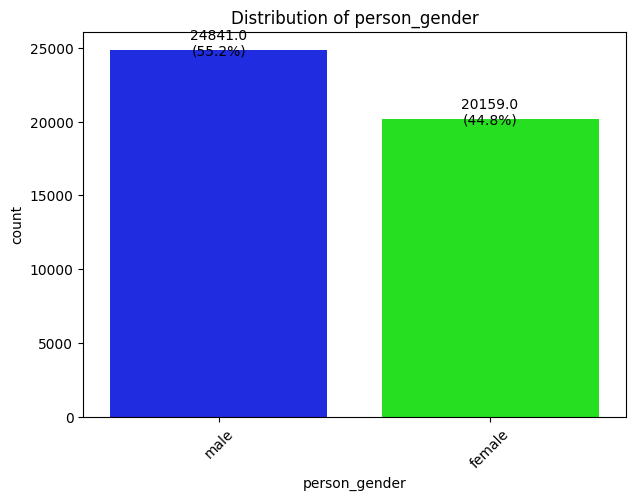

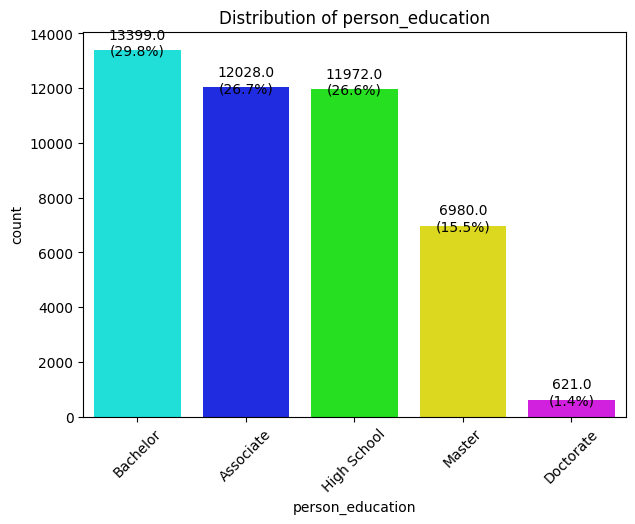

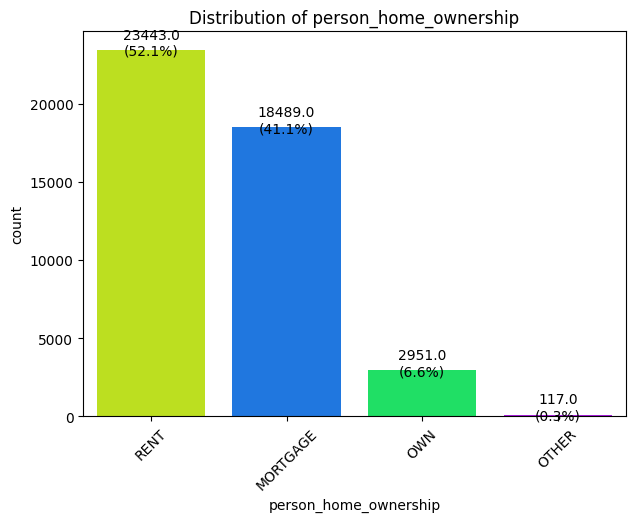

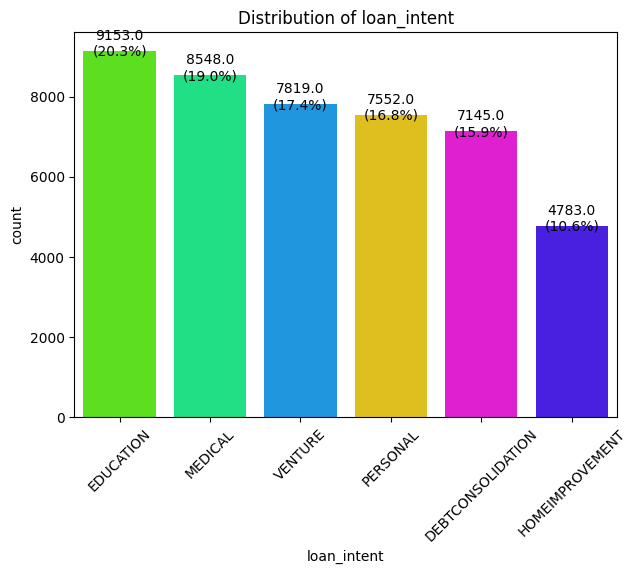

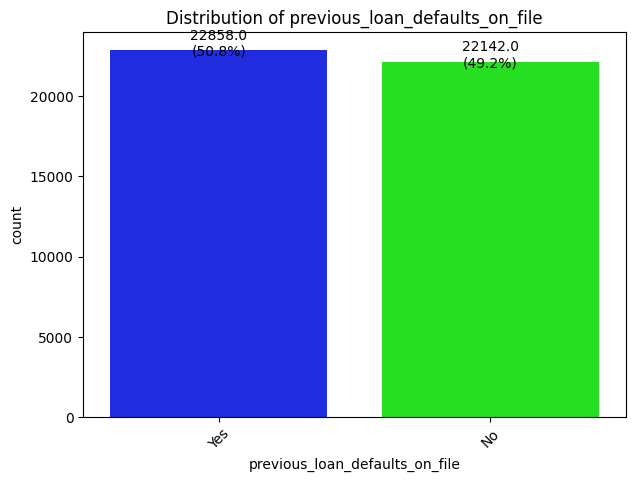

In [ ]:
# Univariate Analysis of Categorical Features with Different Colors
for col in cat_col:
    plt.figure(figsize=(7, 5))

    # Get unique categories
    unique_categories = df[col].value_counts().index

    # Generate a palette with as many colors as there are categories
    palette = sns.color_palette("hsv", len(unique_categories))

    # Create a countplot using 'hue' and suppress the legend
    ax = sns.countplot(
        data=df,
        x=col,
        order=unique_categories,
        hue=col,
        palette=palette,
        dodge=False,
        legend=False  # Suppresses automatic legend display
    )

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

    # Calculate the total count
    total = len(df)

    # Add numbers and percentages on top of the bars
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(
            f'{count}\n({percentage:.1f}%)',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            fontsize=10, color='black',
            xytext=(0, 5), textcoords='offset points'
        )
    plt.show()


**Key	Observation_2**-	Above	graphs	are	self	explanatory
 1.	52%	of	loan	applicants	are	renters.
 2.	30%	of	loan	applicants	have	a	Bachelor's	degree,	while	only	1.4%	hold	a	Doctorate.
 3.	20%	of	the	applicants	applied	for	education	loans,	and	19%	applied	for	medical	loans.

In [ ]:
num_col.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  
0                 0.49                         3.0           561            1  
1                 0.08                         2.0           504            0  
2                 0.44                         3.0           635            1  
3                 0.44                         2.0           675            1  
4                 0.53                         4.0           586            1

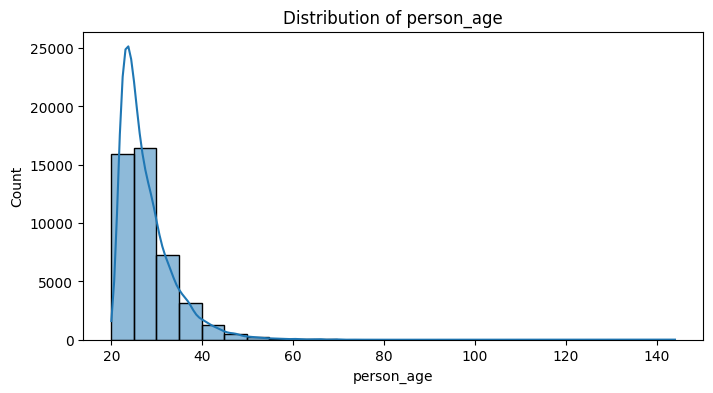

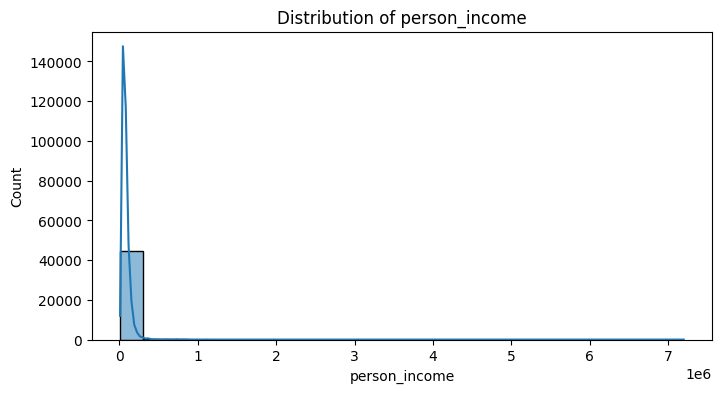

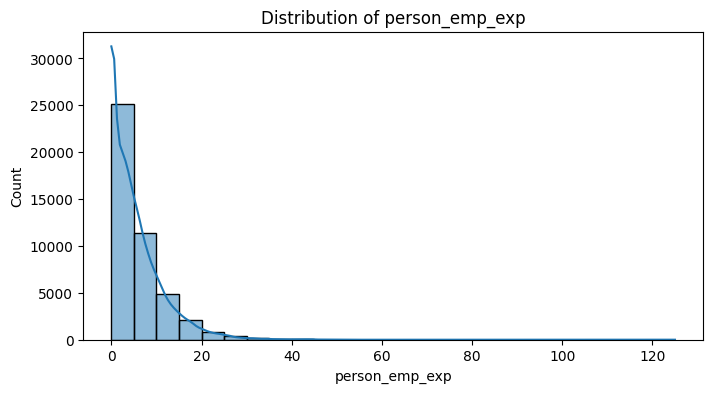

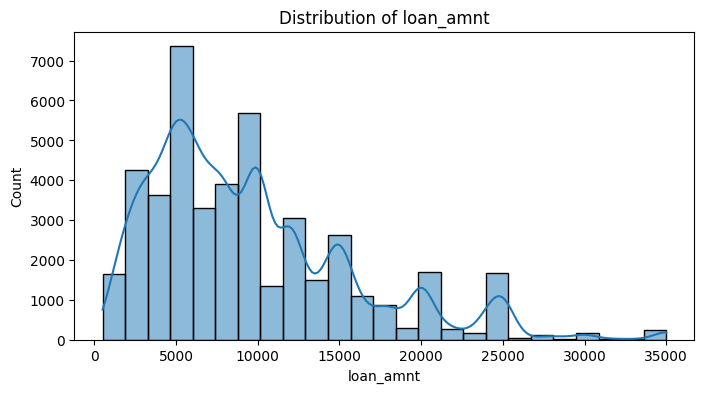

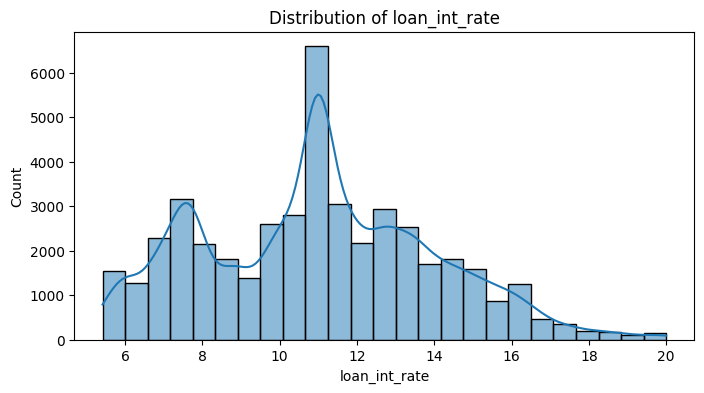

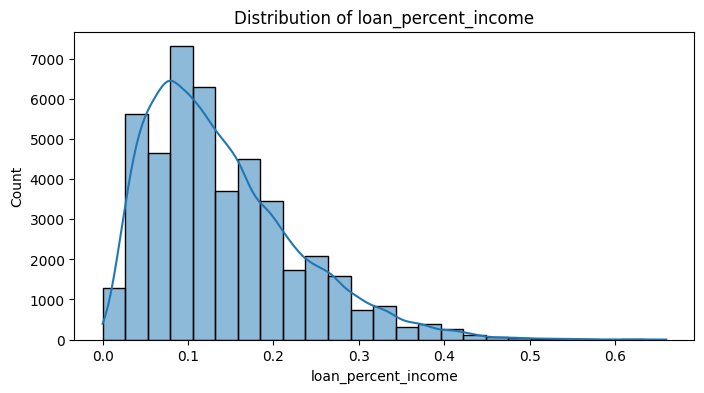

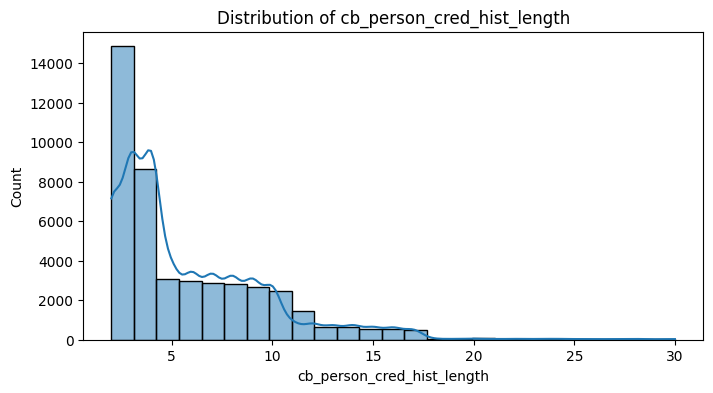

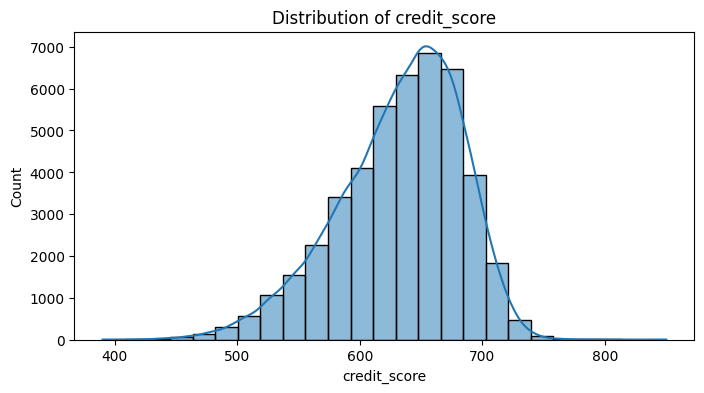

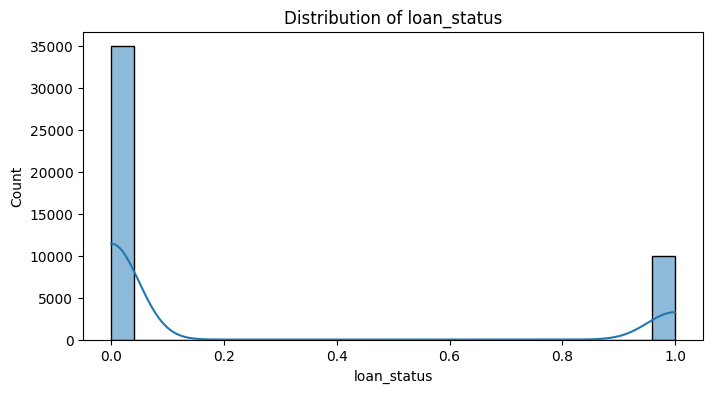

In [ ]:
# Plot histograms for numerical columns
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:
for i in num_col:
    print(i, "==", df[i].skew().round(2))


person_age == 2.55
person_income == 34.14
person_emp_exp == 2.59
loan_amnt == 1.18
loan_int_rate == 0.21
loan_percent_income == 1.03
cb_person_cred_hist_length == 1.63
credit_score == -0.61
loan_status == 1.34


 Key	Observation_3

 **1.	person_age	=	2.55**:

  *Positive	skew-	This	is	a	high	value,	which	suggests	that	the	data	is	right-skewed,	meaning	most	individuals	in	the	dataset	have	lower
  ages,	but	there	are	some	older	individuals	that	are	pulling	the	mean	to	the	right**

 **2.	person_income	=	34.14**:

  *Positive	skew-	A	skewness	of	34.14	suggests	that	most	people	in	the	 dataset	have	lower	incomes,	but	there	are	a	few	high-income
  individuals	creating	a	right	tail.**

 **3.person_emp_exp	=	2.59**:

 *Positive	skew-	This	value	suggests	that	the	employment	experience	is	also	right-skewed,	meaning	many	individuals	have	less
 experience,	but	a	few	have	more,	pulling	the	skew	to	the	right.*

 **4.loan_amnt	=	1.18:**

 Positive	skew-	This	indicates	that	most	of	the	loan	amounts	are	smaller,	with	a	few	larger	loans	pushing	the	mean	to	the	right.

 loan_int_rate	=	0.21:

 Near	normal	distribution-	A	skewness	value	near	0	suggests	that	the	interest	rates	are	fairly	evenly	distributed,	with	no	strong	skew	in
 either	direction.

 **loan_percent_income	=	1.03:**

 Positive	skew-	This	suggests	that	the	percentage	of	income	allocated	to	loan	repayments	is	slightly	positive	skew

 **Cb_person_cred_hist_length	=	1.63:**

 Positive	skew-	This	indicates	that	many	individuals	have	a	shorter	credit	history,	but	a	few	have	long	histories,	pushing	the	mean	to	the
 right.

**credit_score	=	-0.61**:

 Negative	skew-	This	is	somewhat	unusual.	It	suggests	that	most	of	the	credit	scores	in	the	dataset	are	higher,	with	a	few	low	scores
 dragging	the	average	to	the	left.

 However,	this	could	be	a	z-score,	indicating	a	transformation	of	the	data.

**Analysis	of	Numerical	features	using	Box	plot**

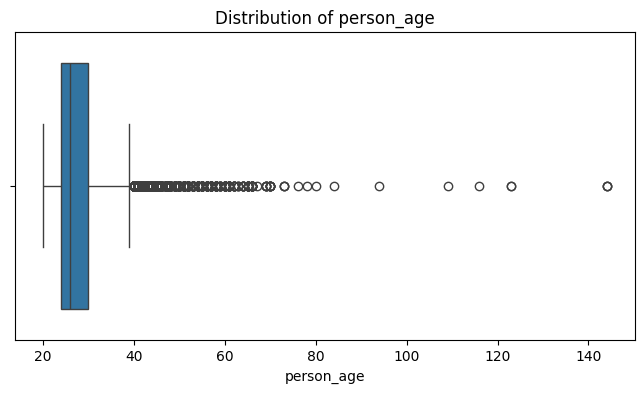

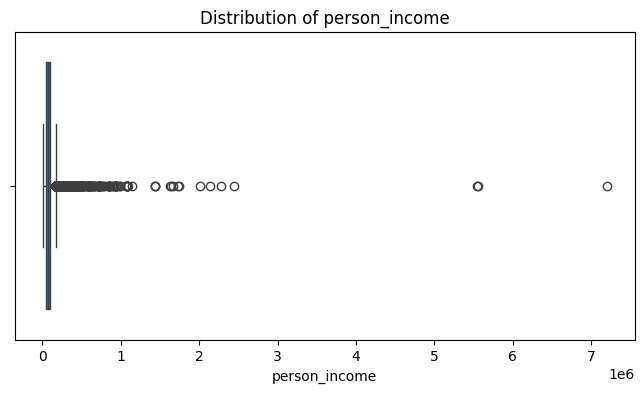

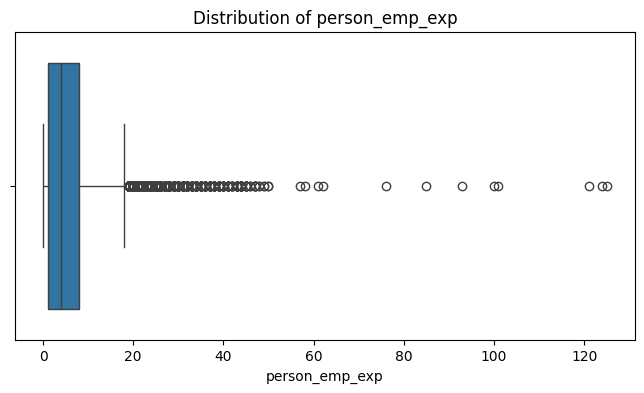

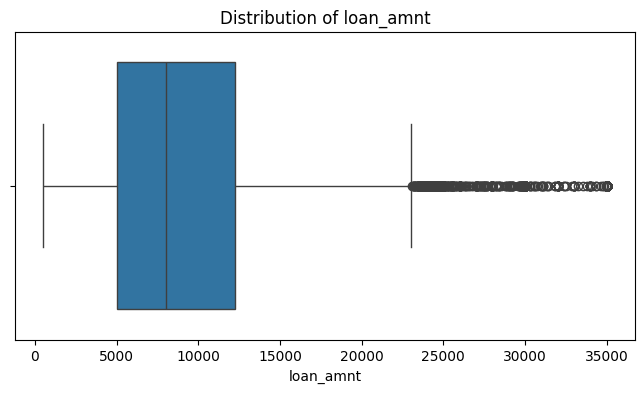

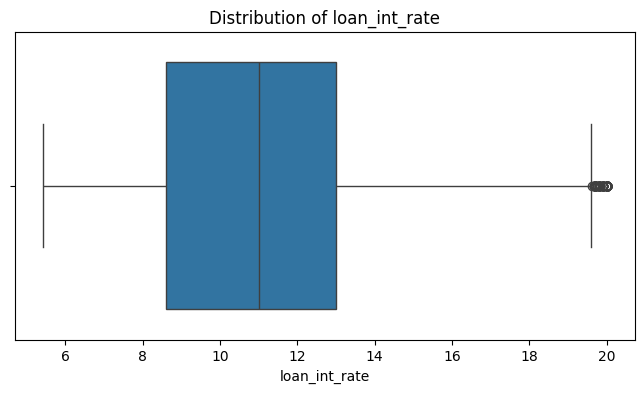

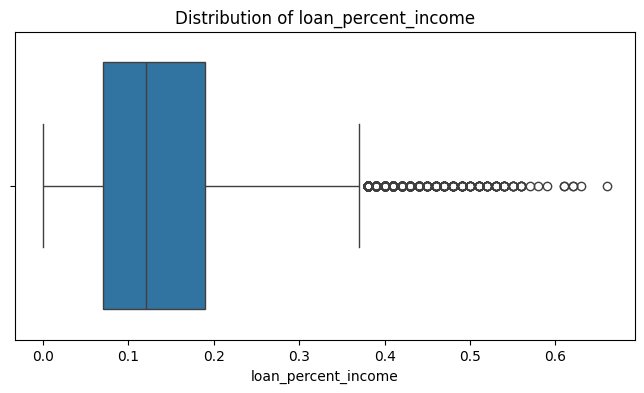

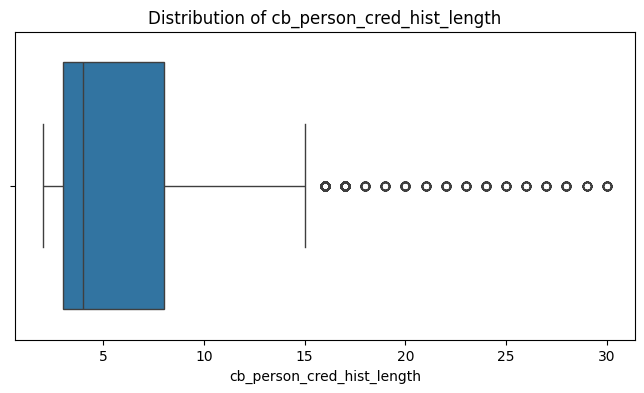

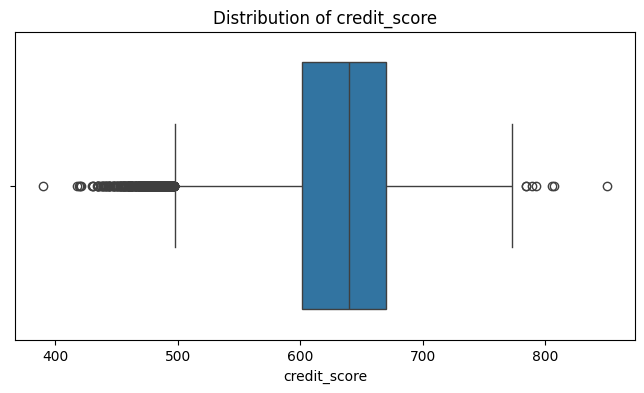

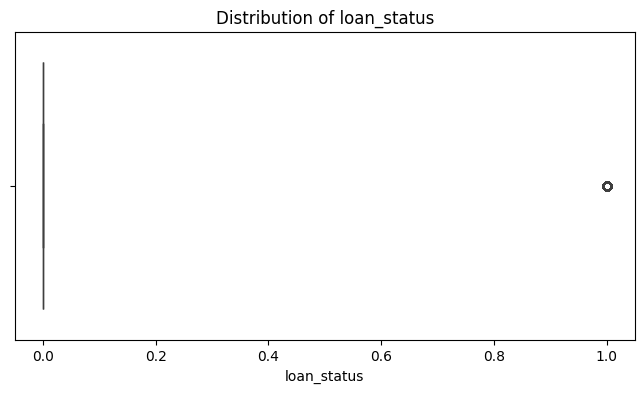

In [ ]:
# Boxplot for numerical columns
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])  # Specify the column for the boxplot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


**Key	Observation_4**:

Need	to	handle	outliers	in	age,income,experience,and	credit_score

**Bivariate	Analysis**

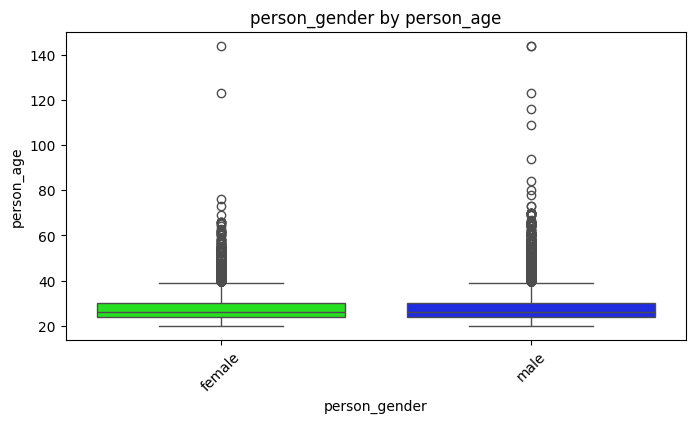

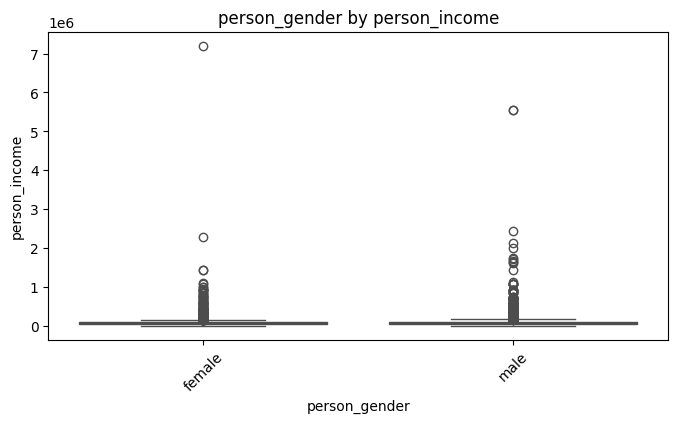

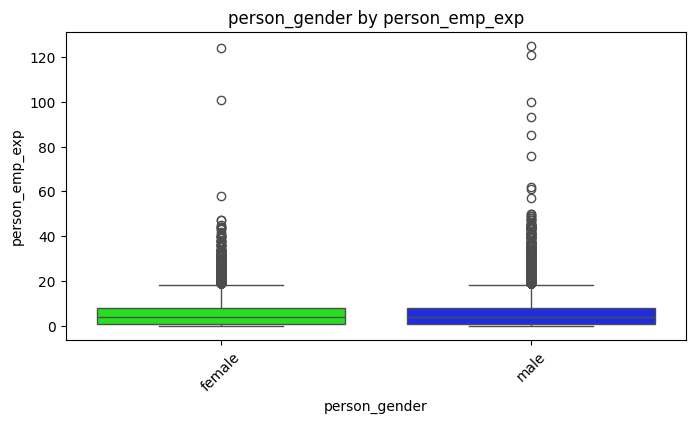

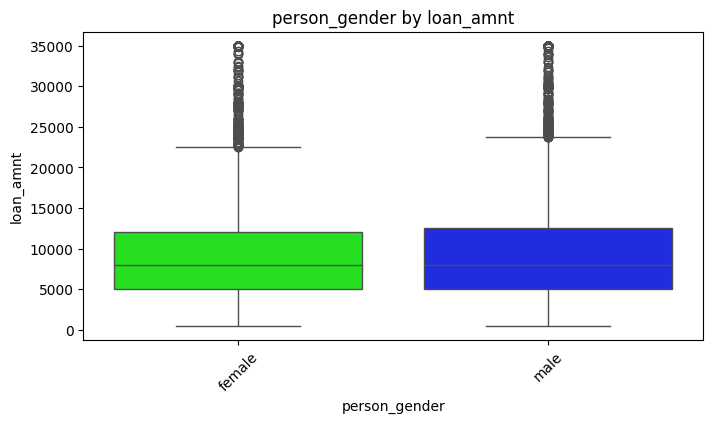

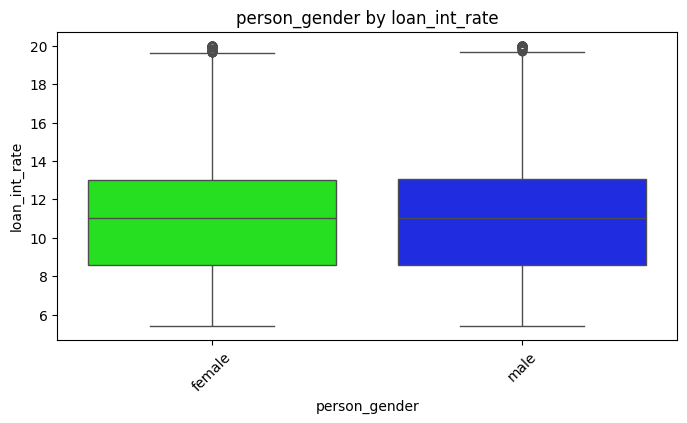

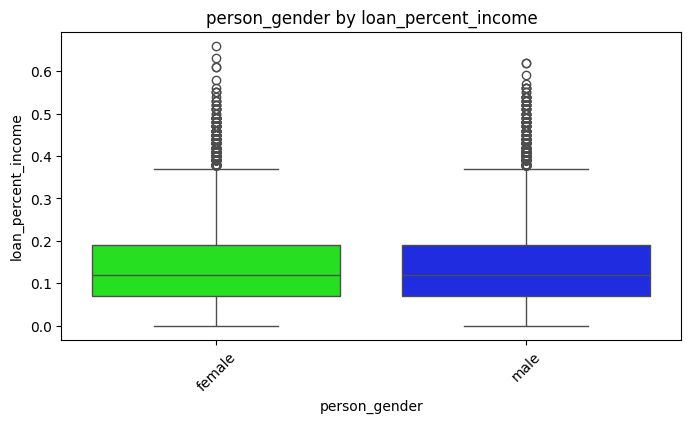

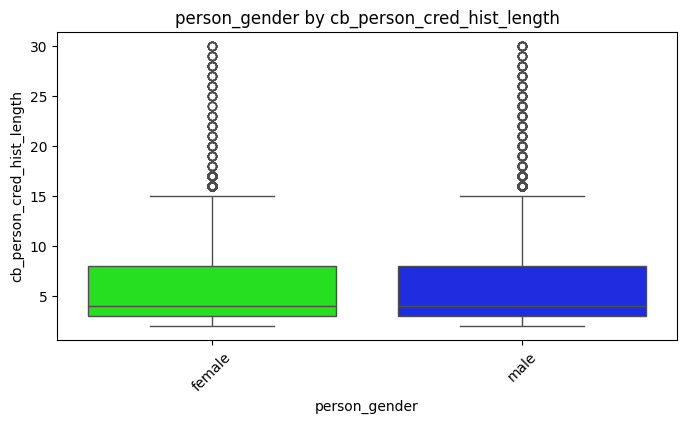

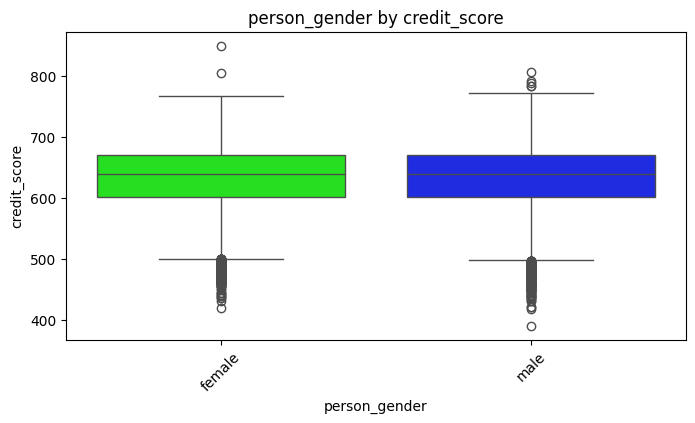

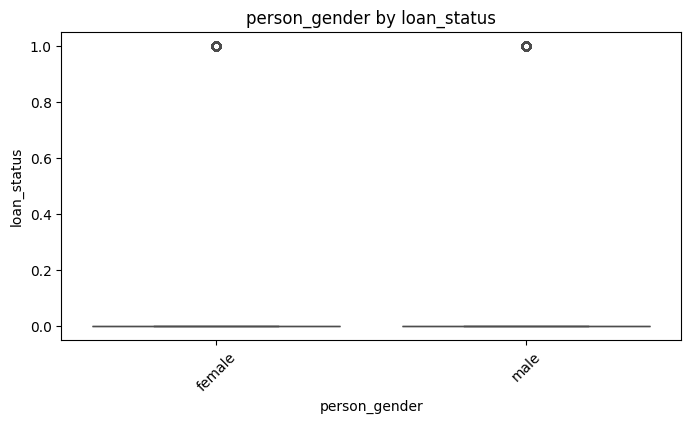

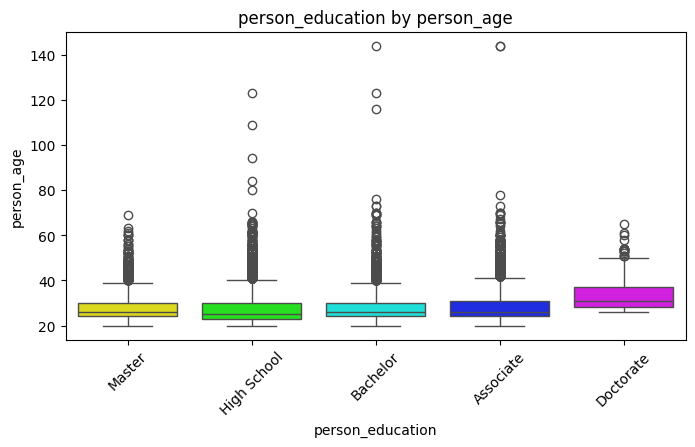

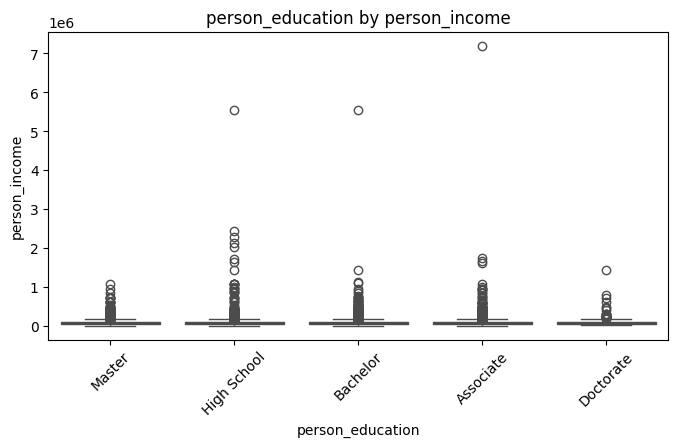

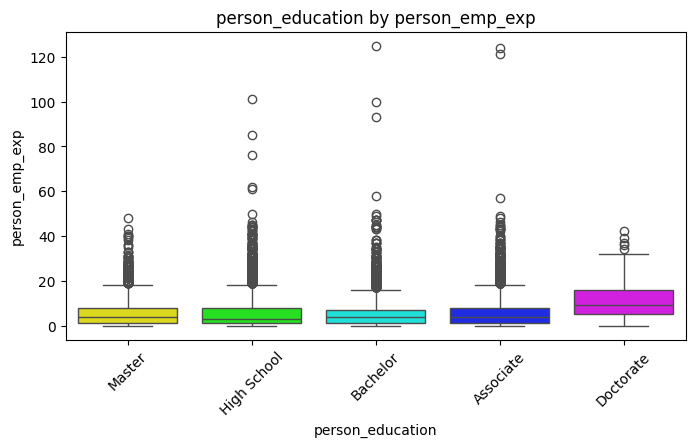

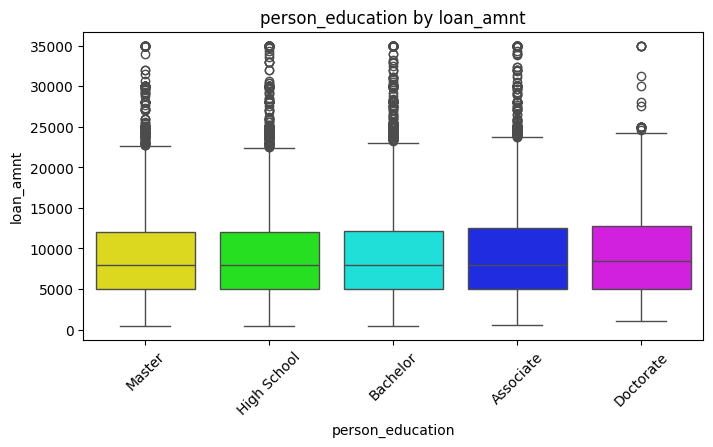

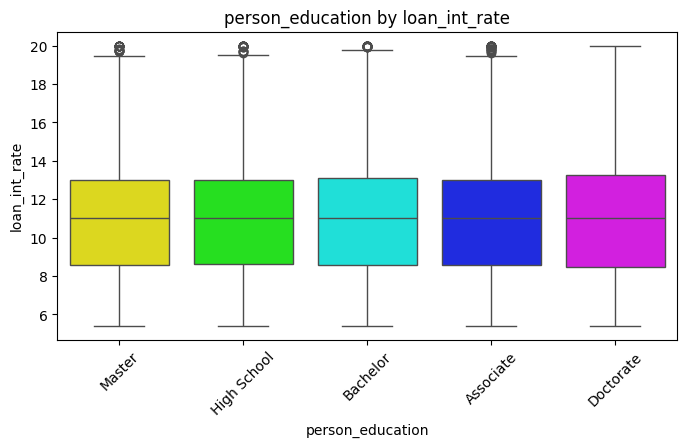

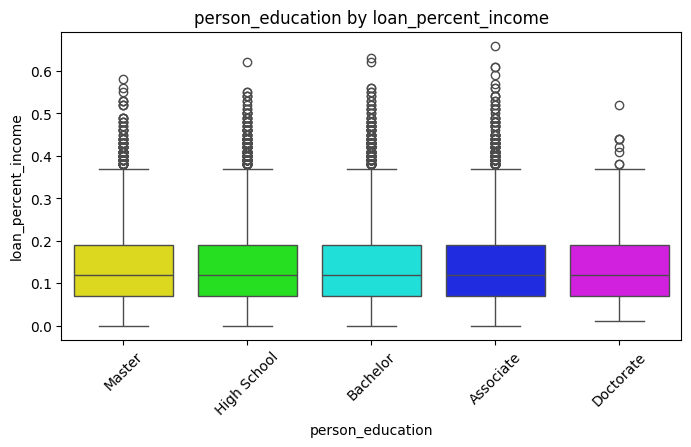

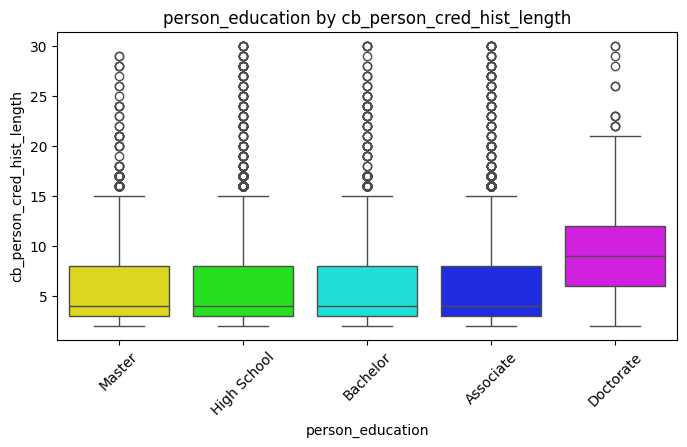

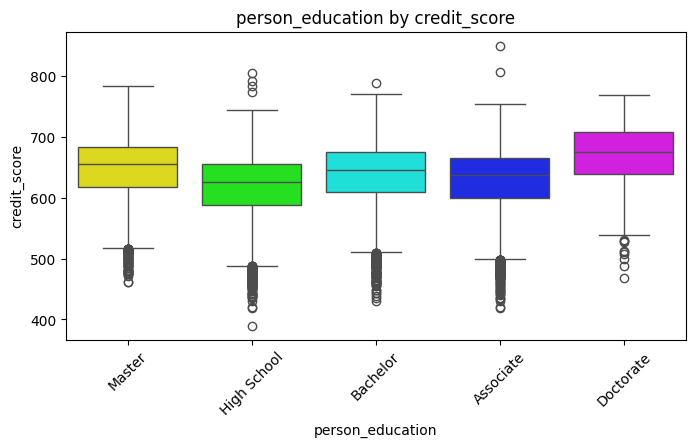

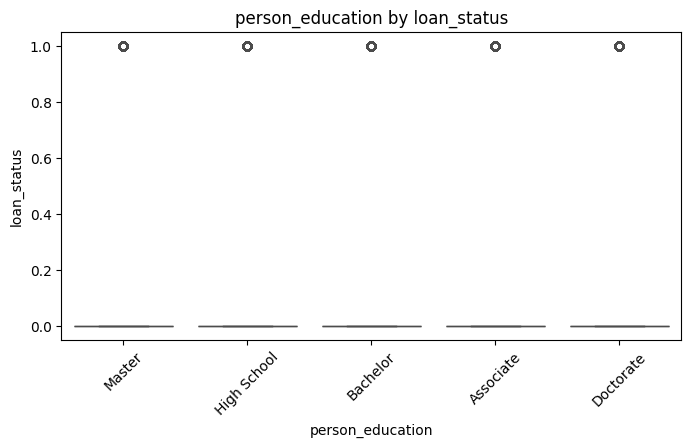

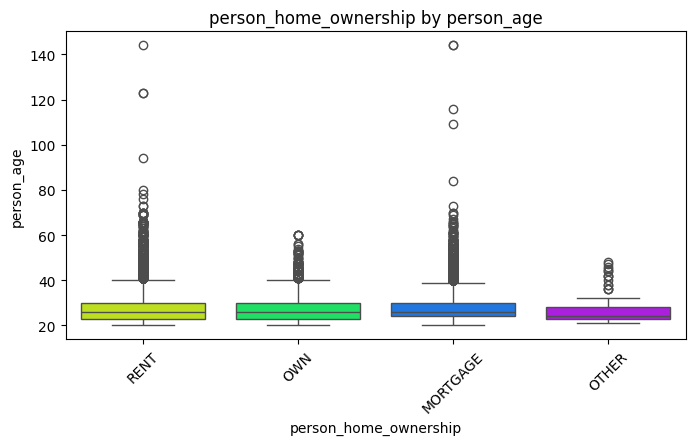

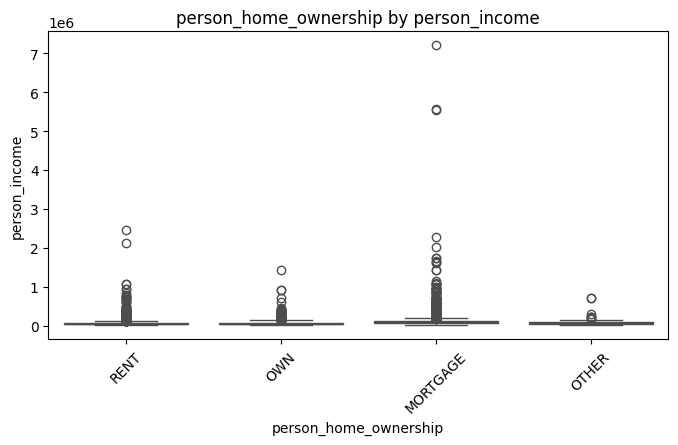

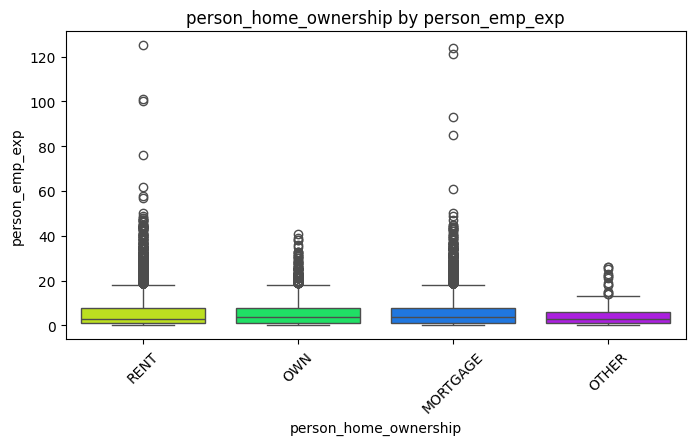

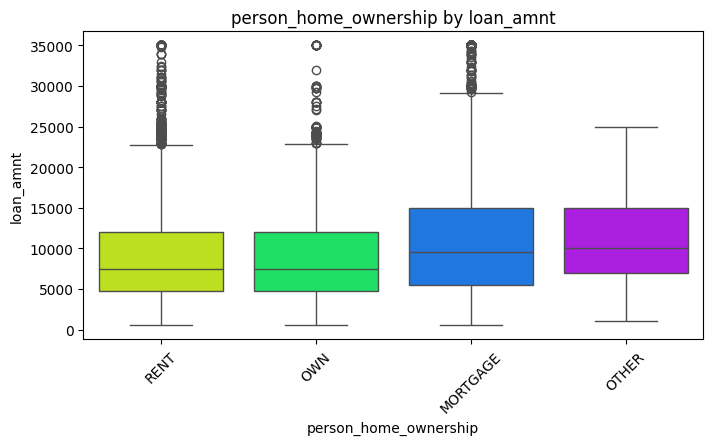

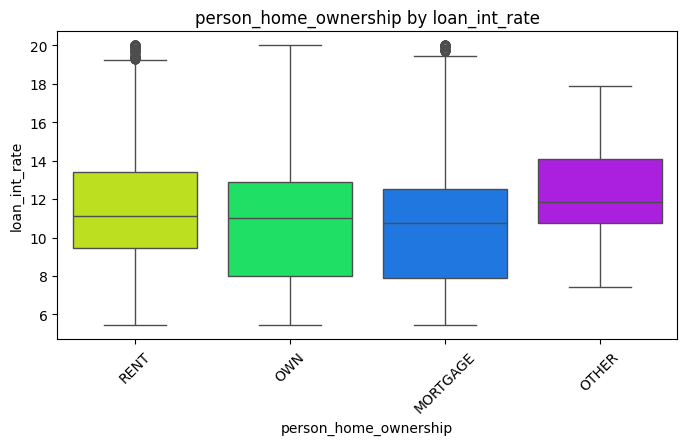

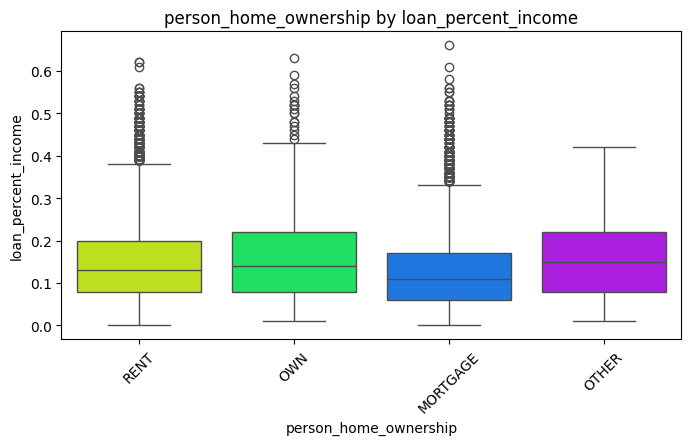

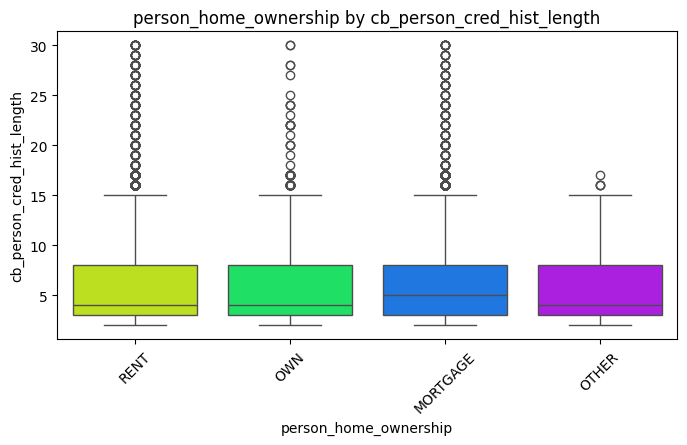

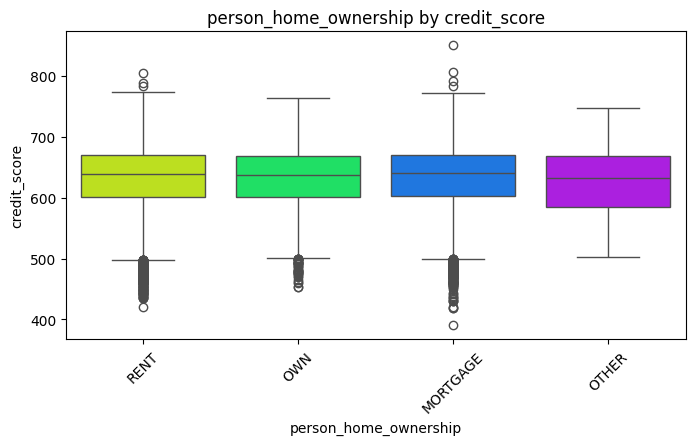

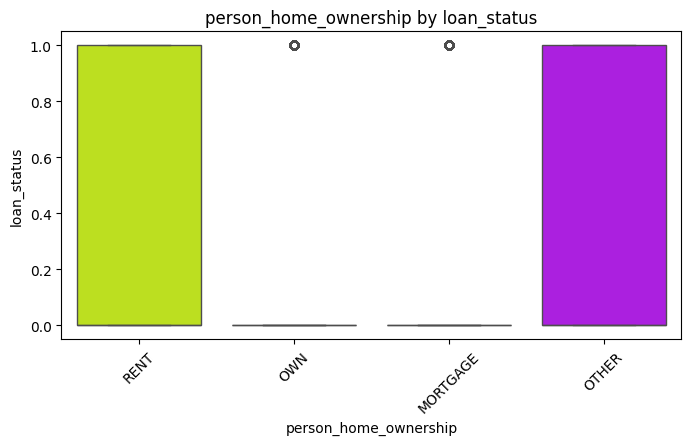

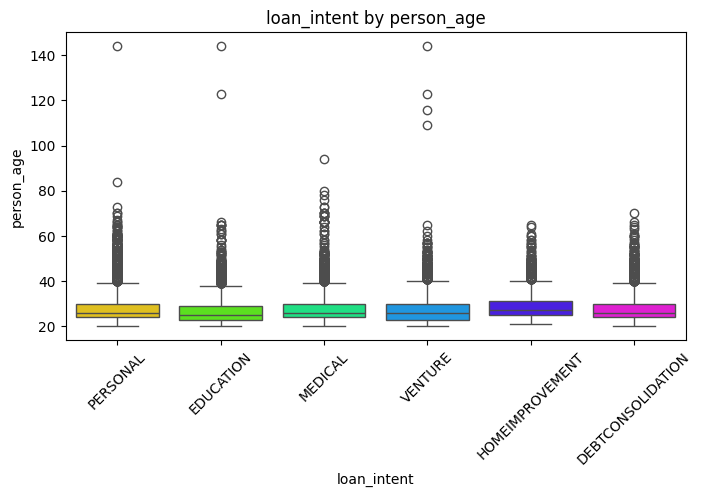

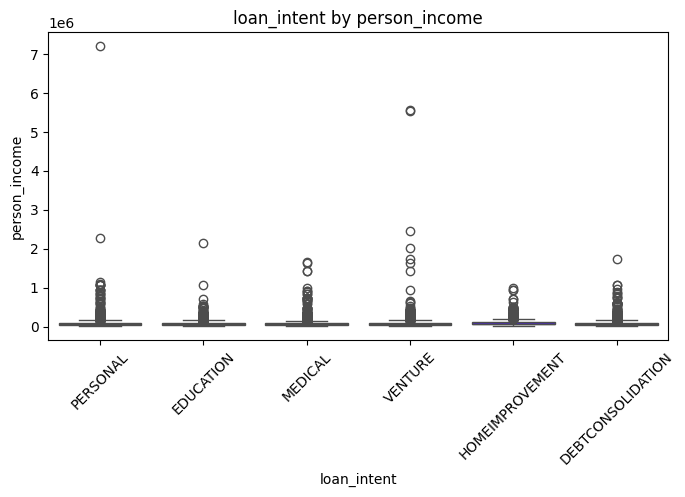

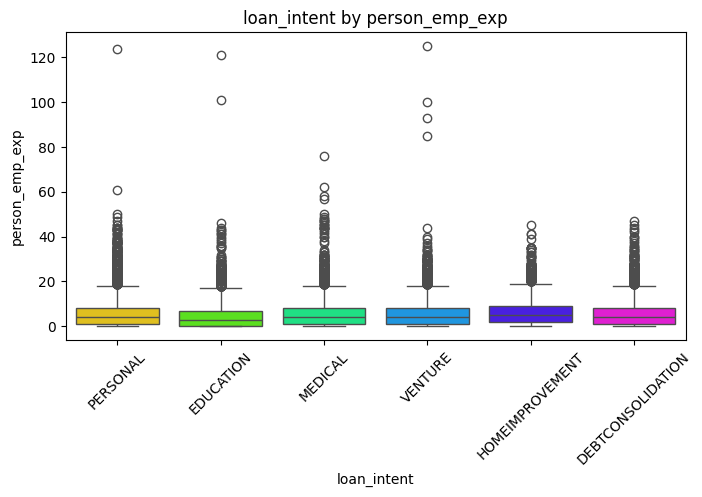

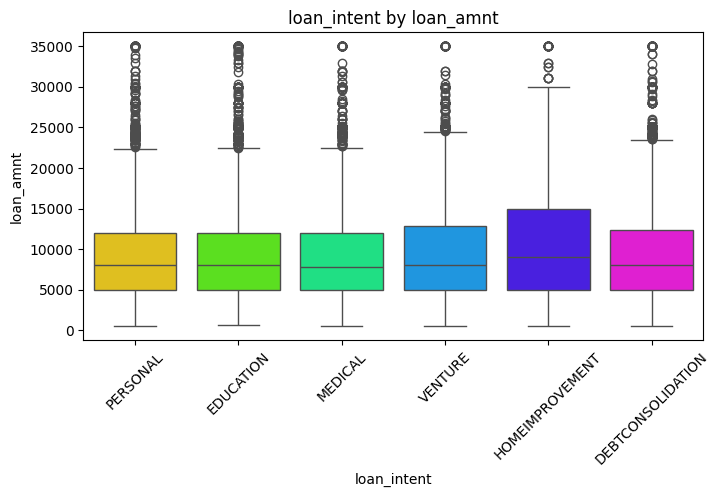

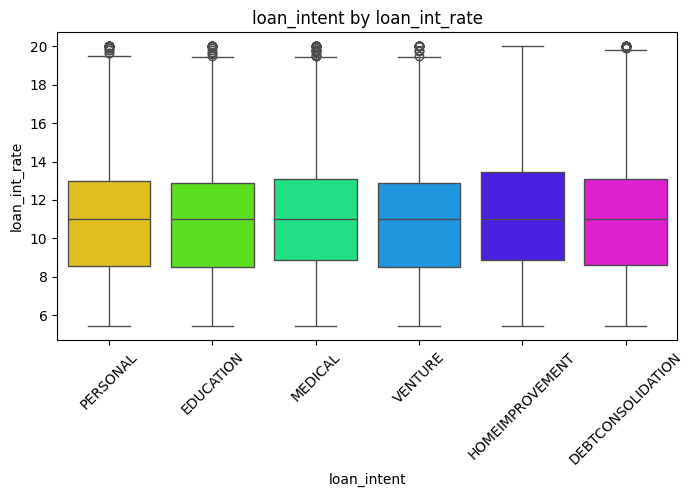

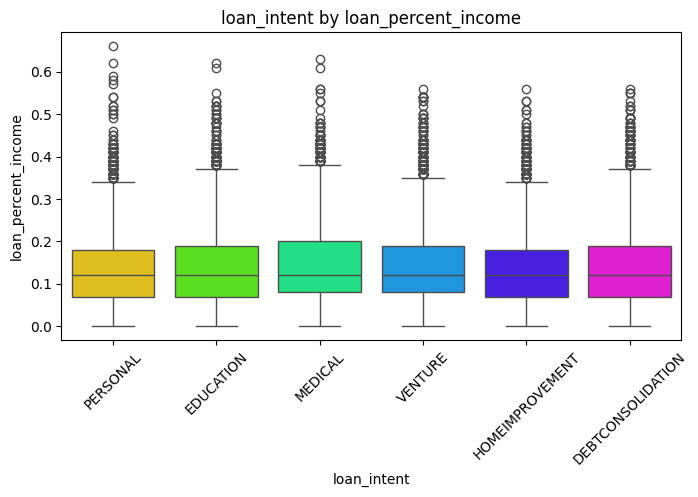

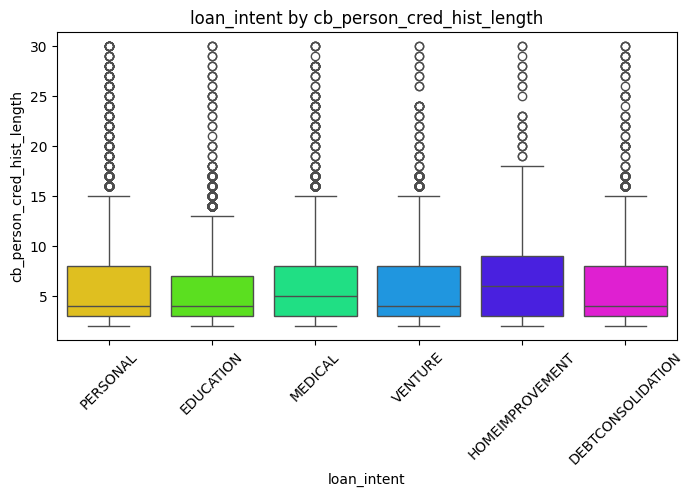

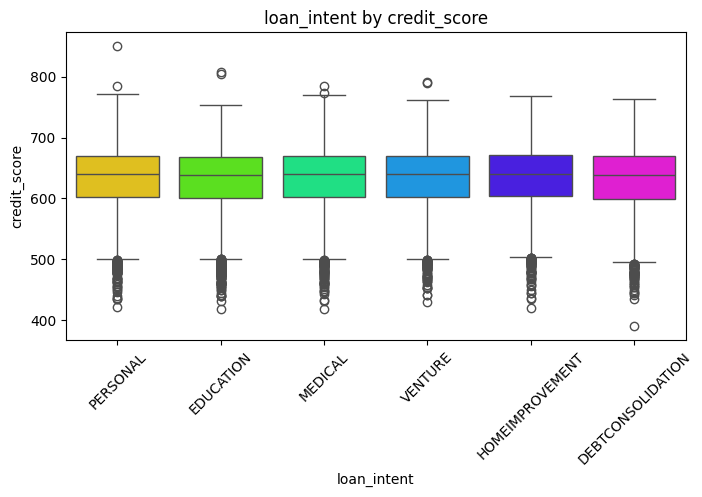

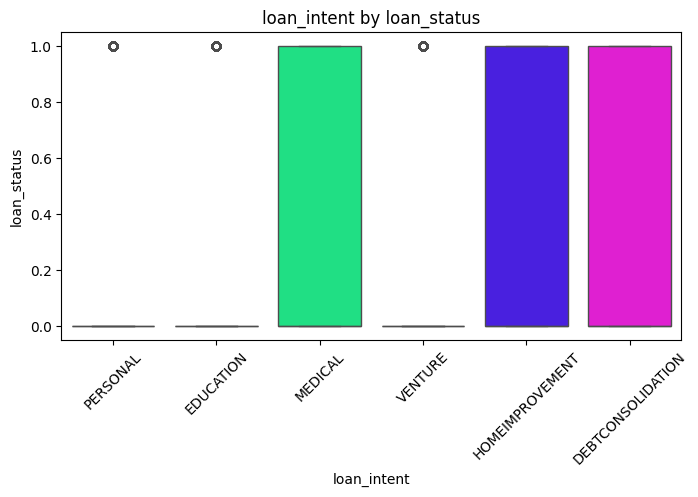

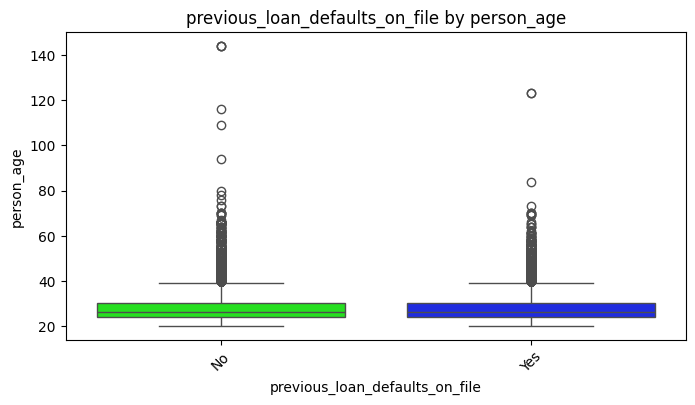

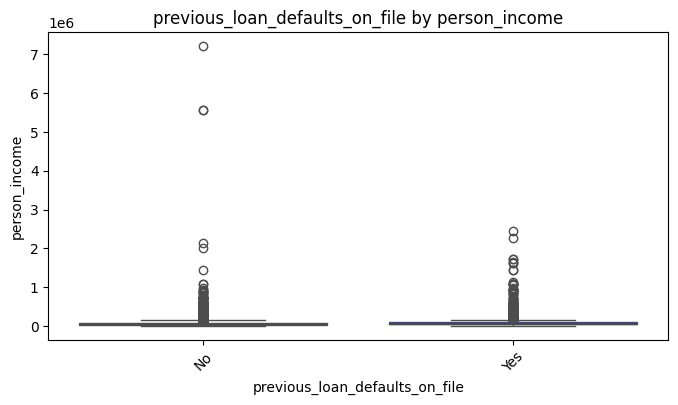

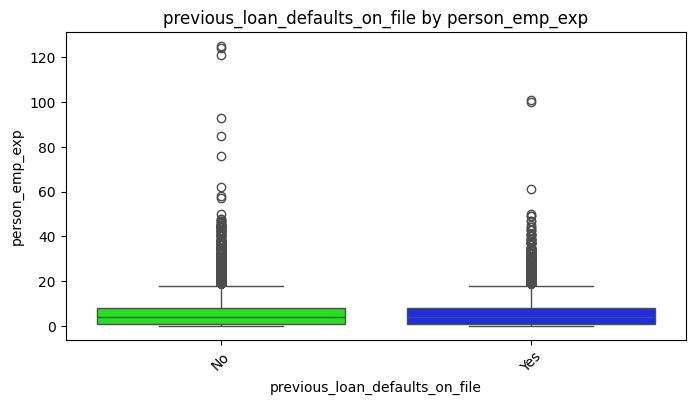

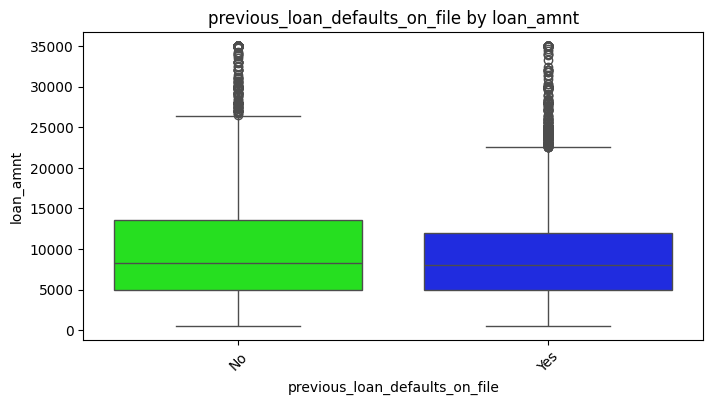

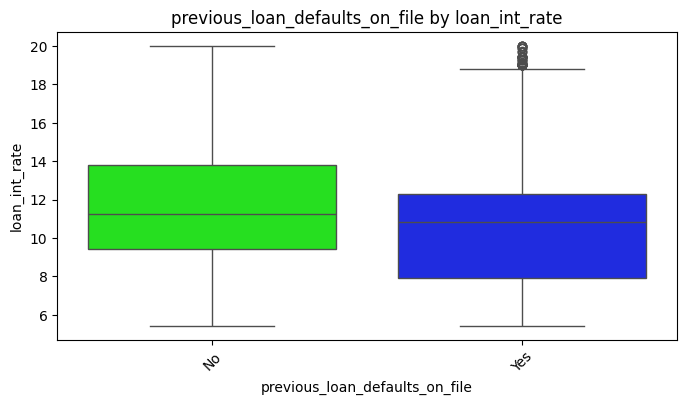

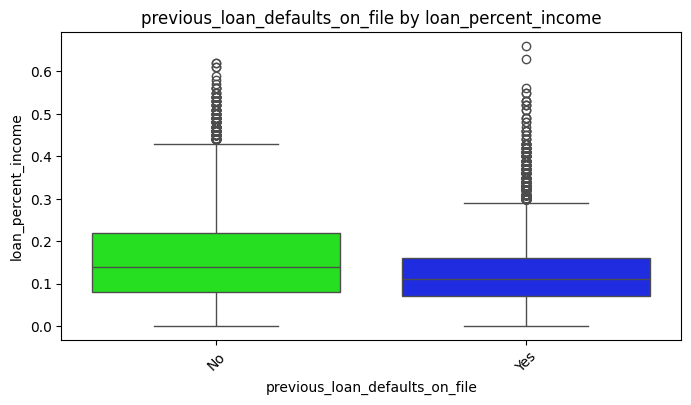

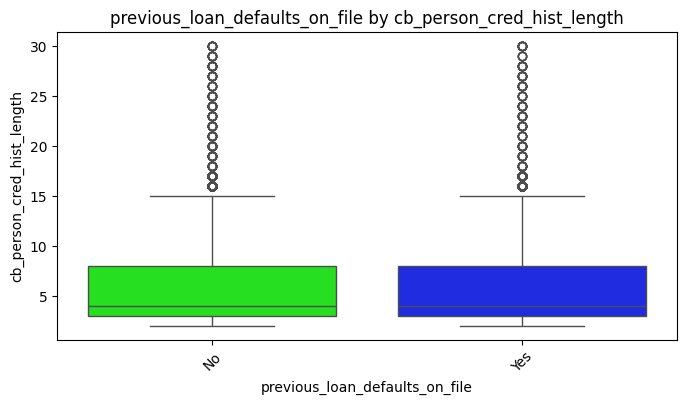

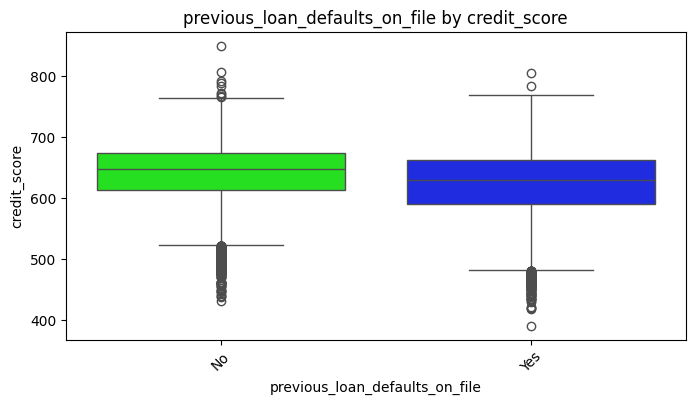

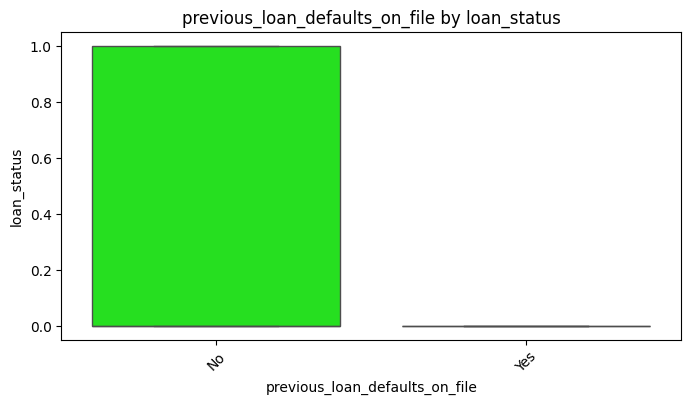

In [ ]:
# Boxplots for categorical vs numerical columns with different colors for categories
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))

        # Use a different color for each category with the hue parameter
        sns.boxplot(data=df, x=i, y=j, hue=i, palette="hsv", dodge=False, legend=False)

        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()


**Key	Observation_5**:

**1.Gender**
 1.	The	number	of	males	aged	80	and	above	is	higher	than	that	of	females.
 2.	Female	has	the	highest	income	among	the	applicants.
 3.	Female	has	the	highest	loan	percent	income	among	the	applicants.
 4.	Females	have	the	highest	credit	scores,	while	males	have	the	lowest.

**2.Person_education**

 1.	Individuals	aged	100	and	above	hold	either	a	Bachelor's,	Associate's,	or	High	School	degree.
 2.	The	top	three	highest-income	earners	hold	either	an	Associate's,	Bachelor's,	or	High	School	degree.
 3.	Individuals	with	a	Bachelor's	degree	have	the	highest	employment	experience.
 4.	The	person	with	the	highest	credit	score	holds	an	Associate's	degree,	while	the	person	with	the	lowest	credit	score	holds	a	High
 School	degree.

**3.Person_home_ownership**
 1.	The	person	with	the	highest	income	has	mortgaged	their	house.
 2.	Individuals	with	both	the	highest	and	lowest	credit	scores	are	from	the	mortgage	category.
 3.	Individuals	aged	100	and	above	have	taken	either	personal,	education,	or	venture	loans."
 4.	The	person	with	the	highest	income	has	a	mortgaged	home.

**4.Loan	intent**
 1.	Individuals	aged	100	and	above	applied	for	either	personal,	education,	or	venture	loans.
 2.	The	individual	with	the	highest	income	applied	for	a	personal	loan.
 3.	The	person	with	the	highest	credit	score	opted	for	a	personal	loan,	while	the	individual	with	the	lowest	credit	score	chose	a	debt
 consolidation	loan.

**5.Previous	loan	default**
 1.	The	top	two	individuals	with	the	highest	incomes	have	no	history	of	previous	loan	defaults.
 2.	The	individual	with	the	highest	credit	score	has	no	previous	loan	defaults.
 3.	The	individual	with	the	lowest	credit	score	has	a	history	of	previous	loan	defaults.
 4.	Applicants	who	defaulted	on	previous	loans	were	not	approved	for	a	loan	this	time

**Categorical	vs	Numerical	using	Scatter	plot**

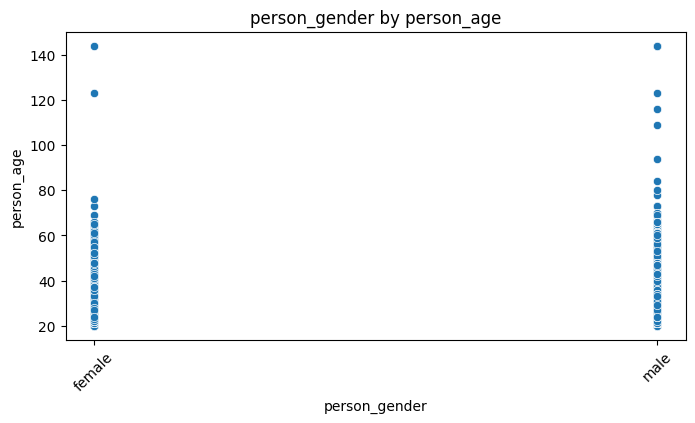

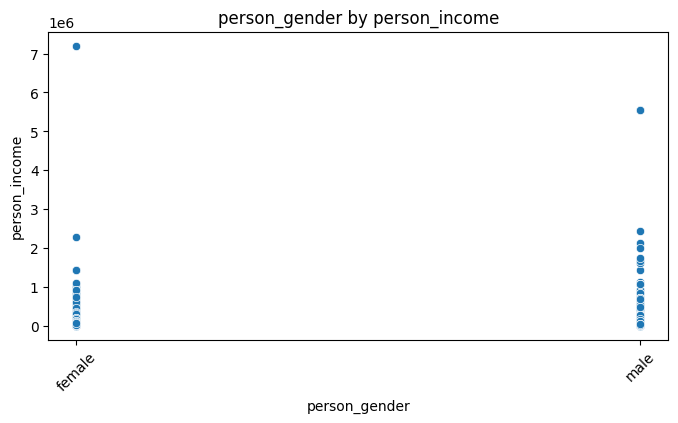

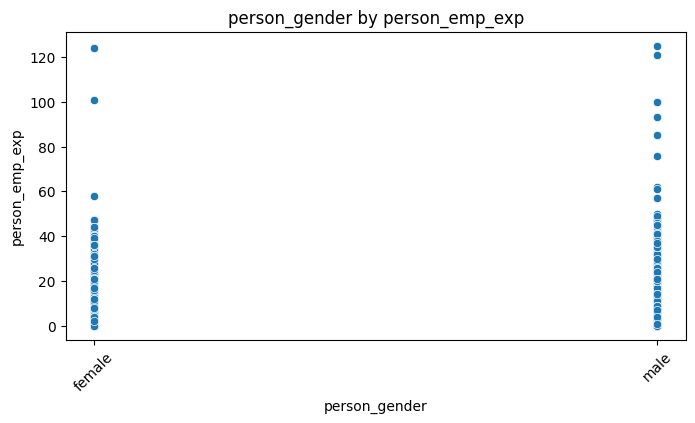

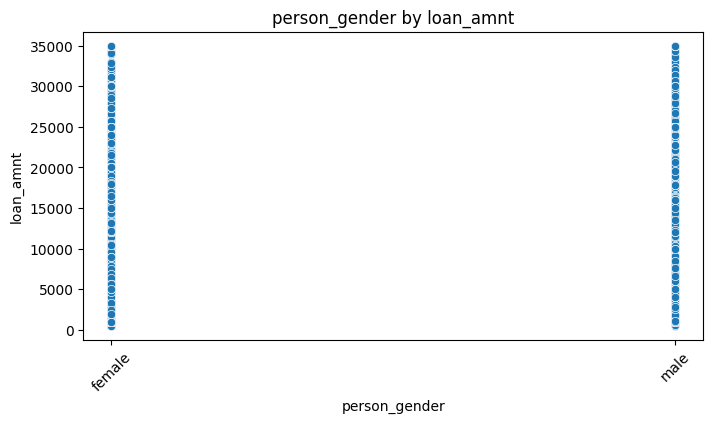

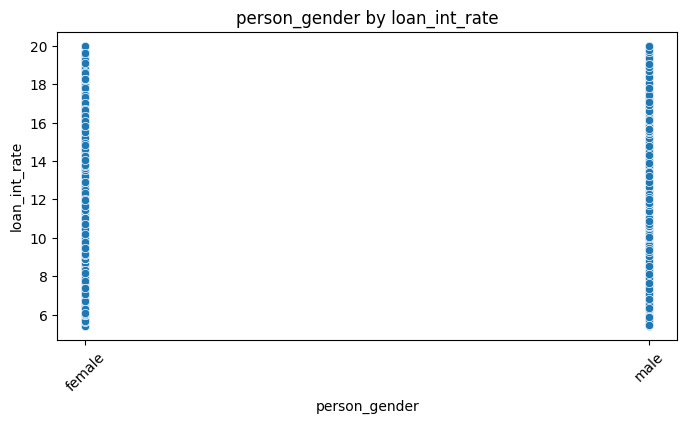

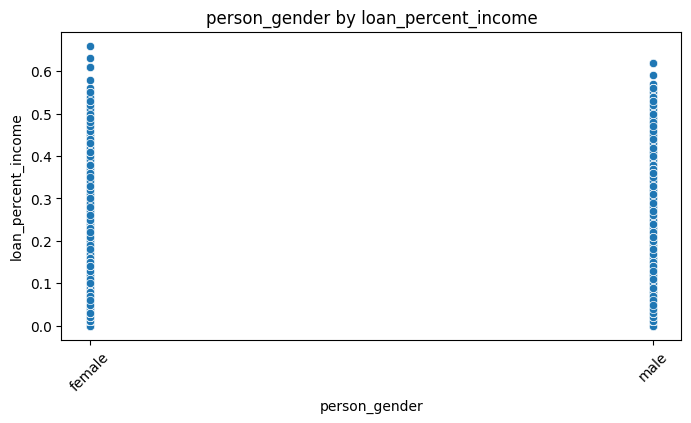

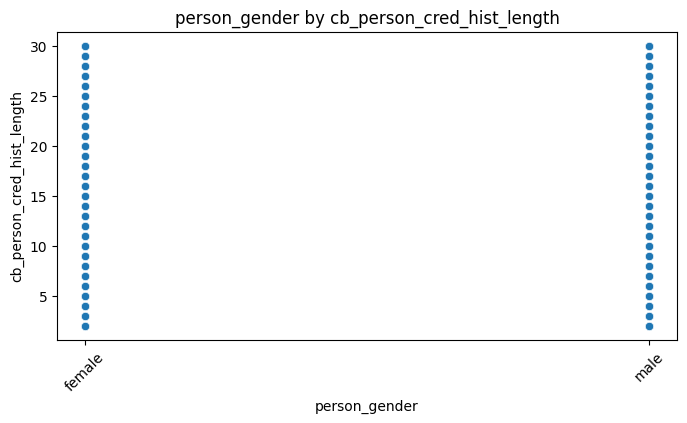

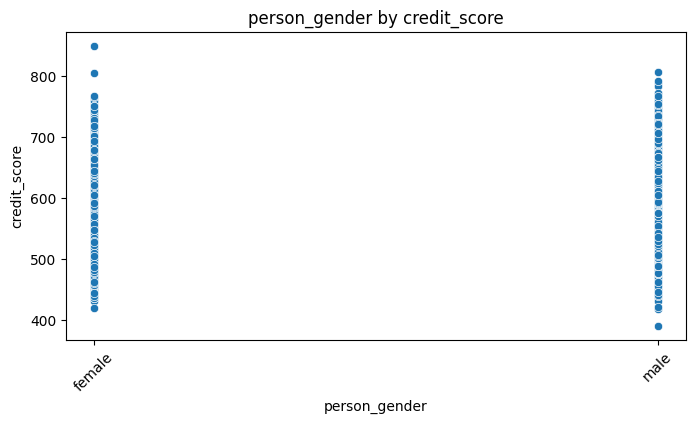

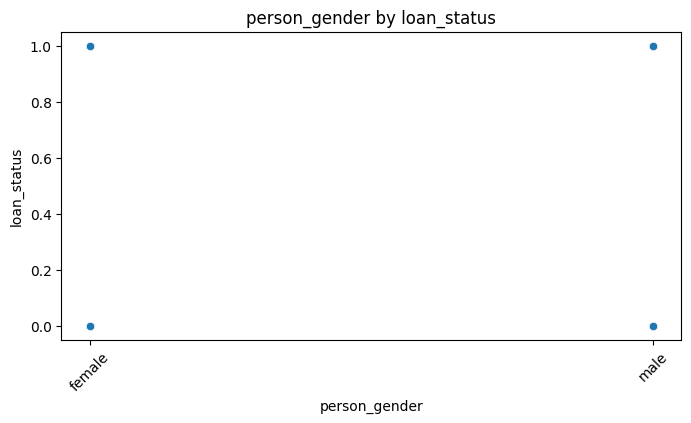

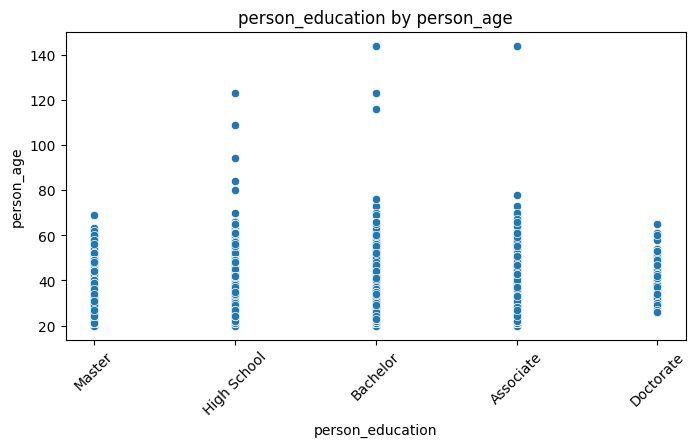

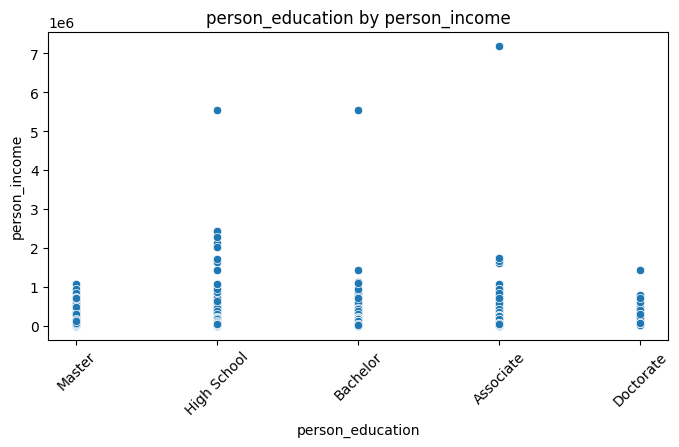

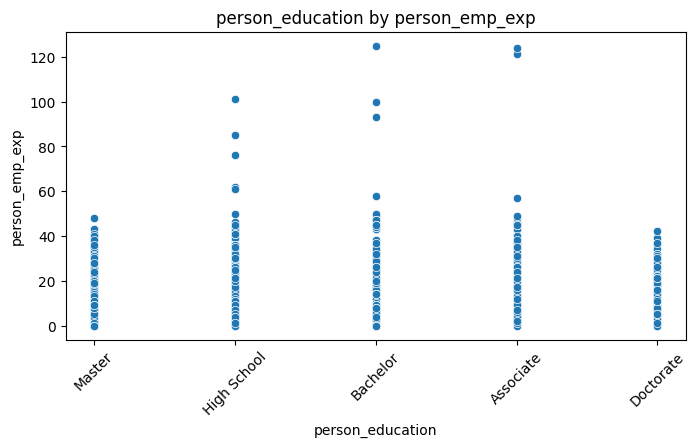

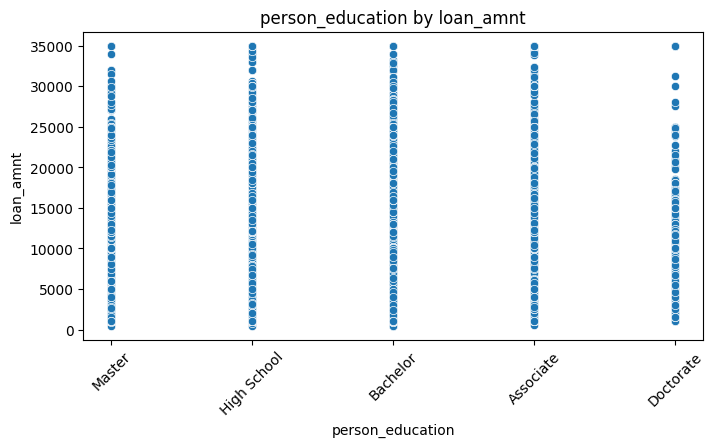

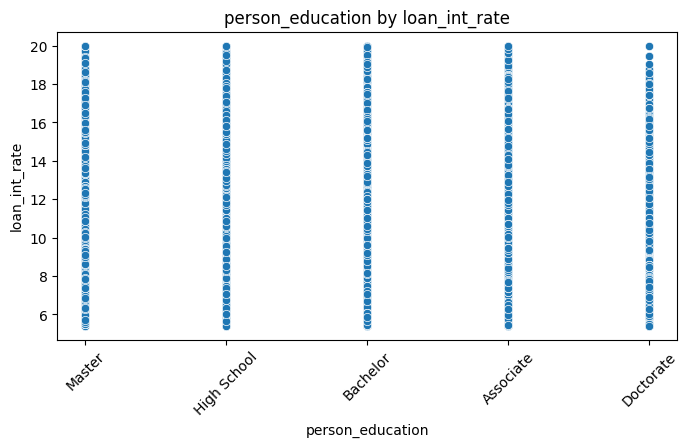

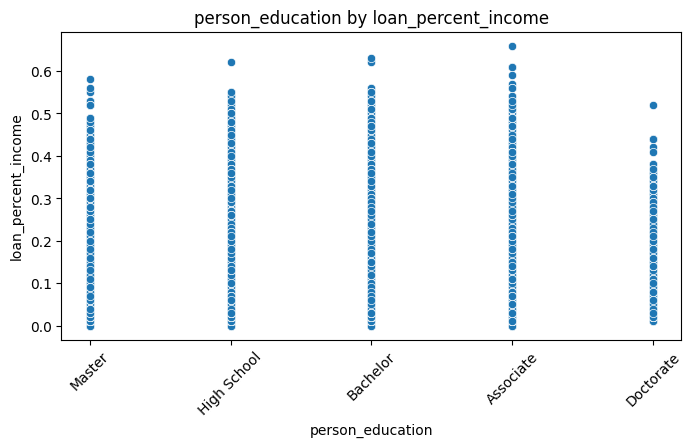

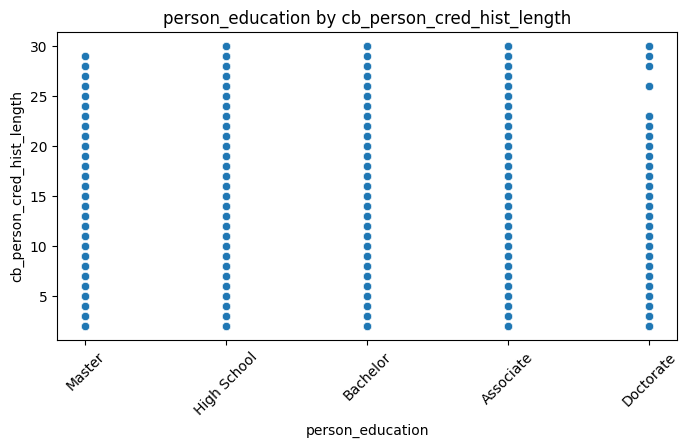

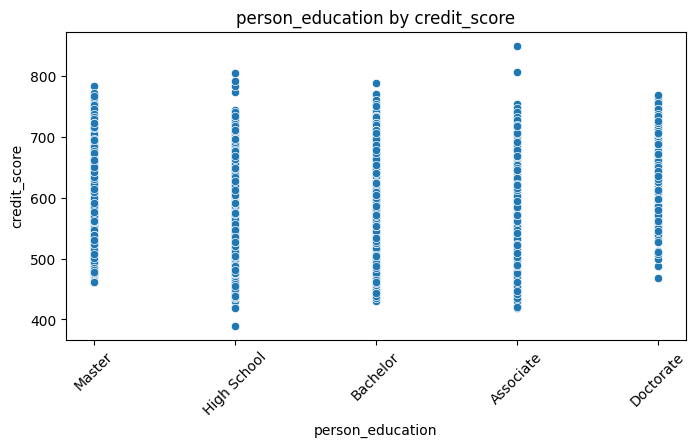

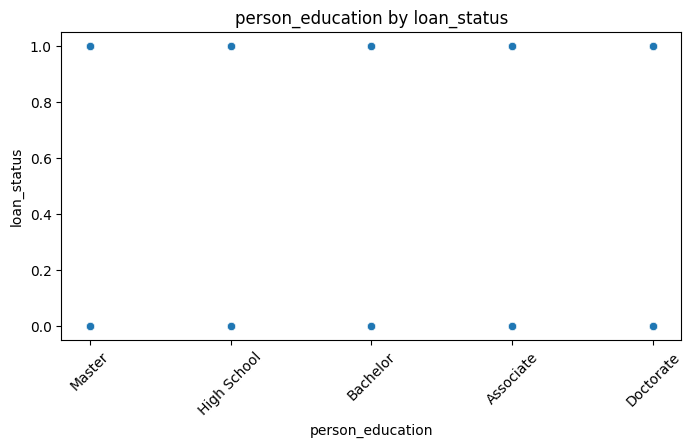

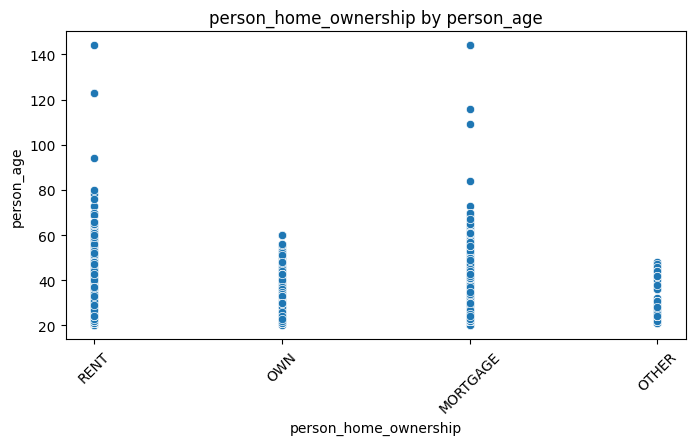

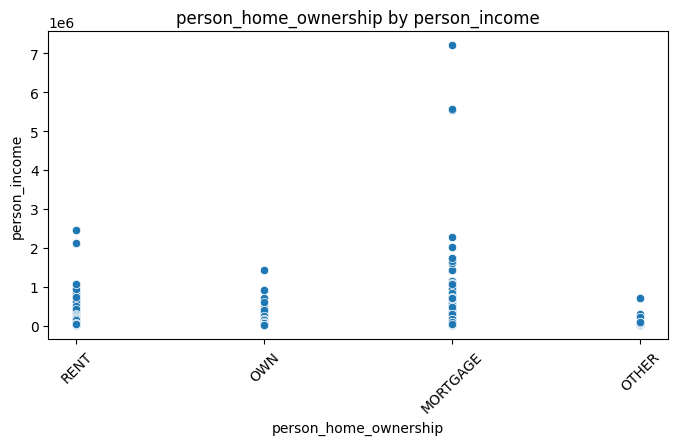

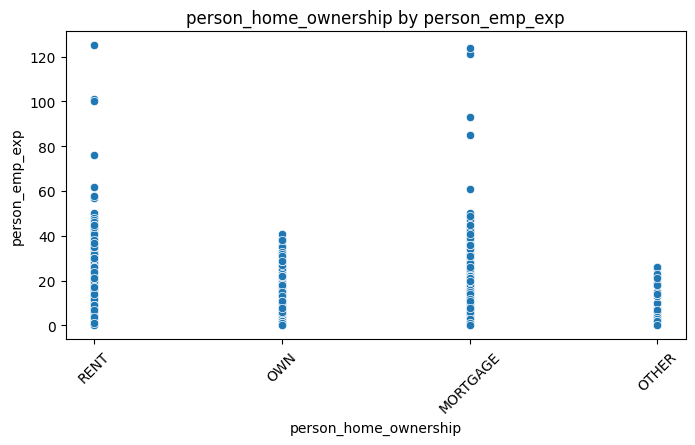

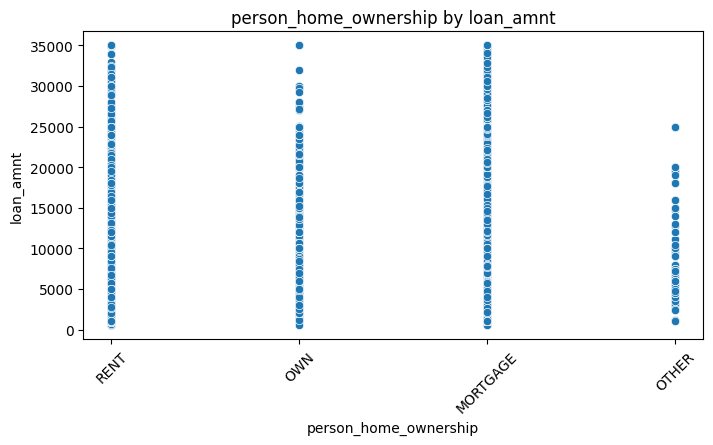

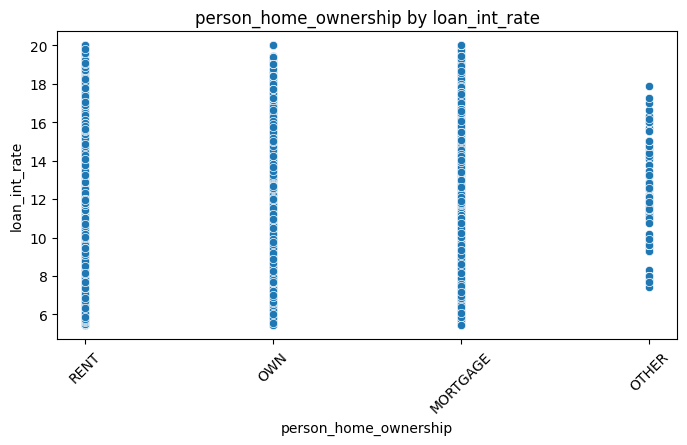

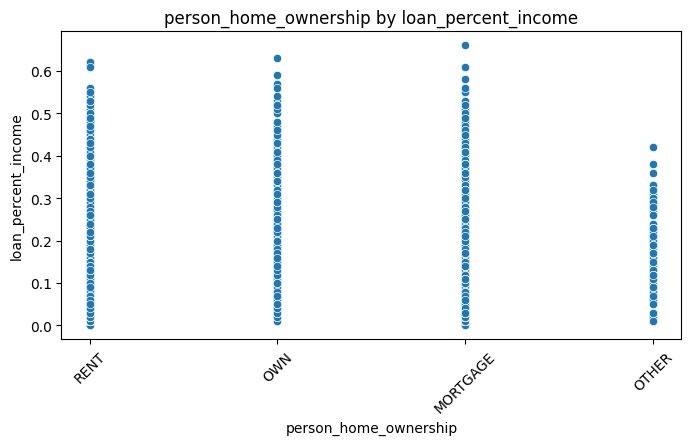

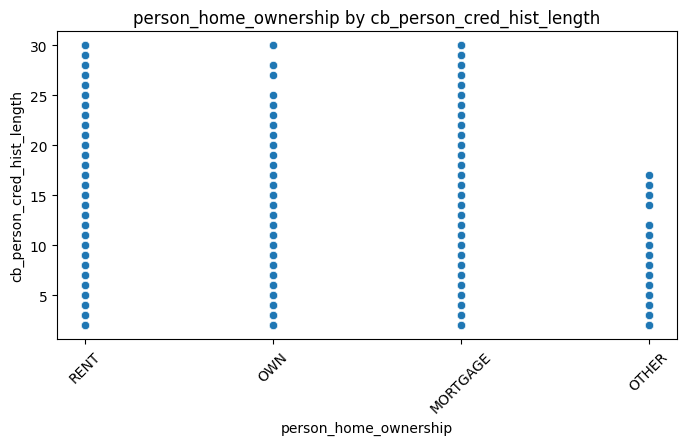

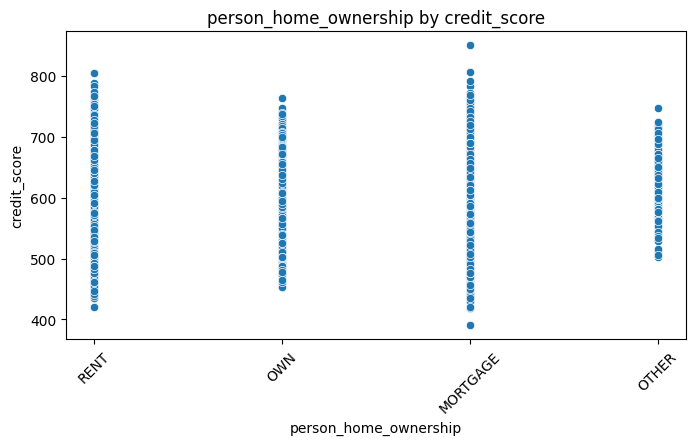

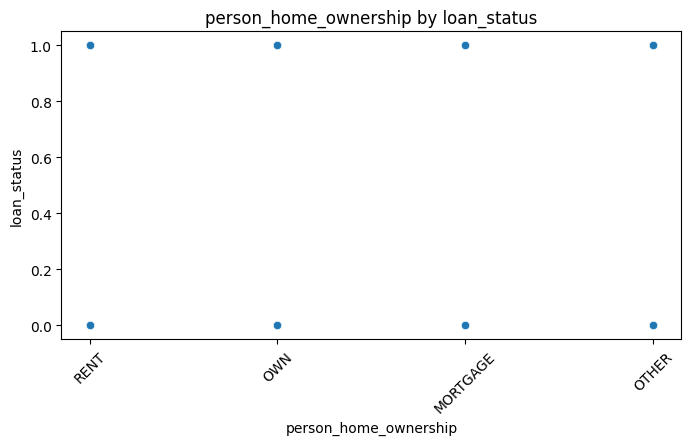

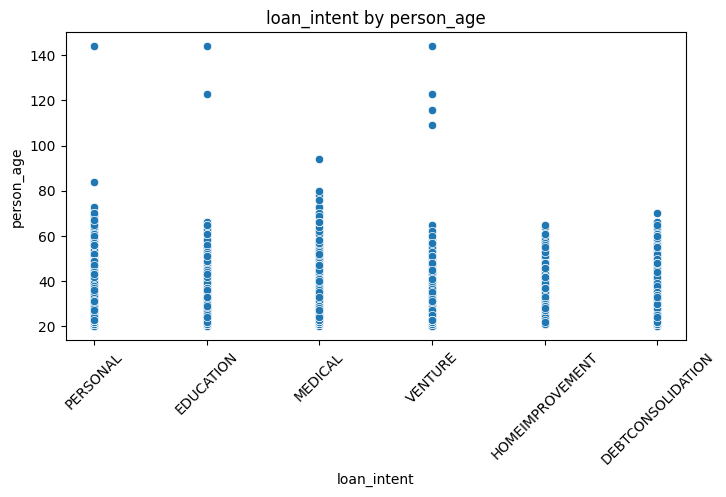

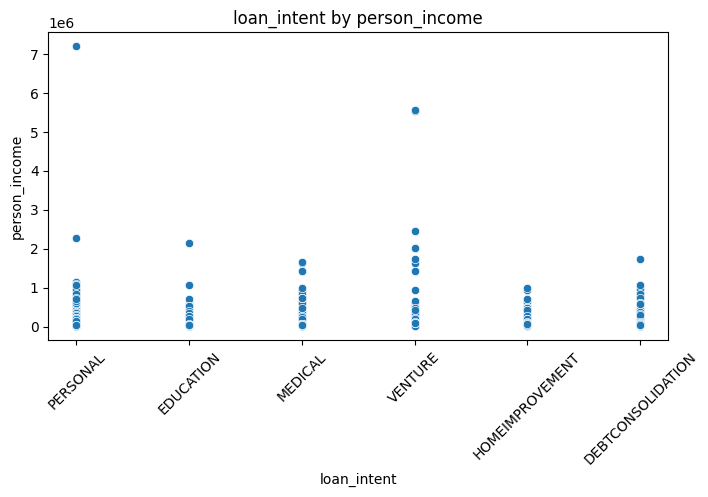

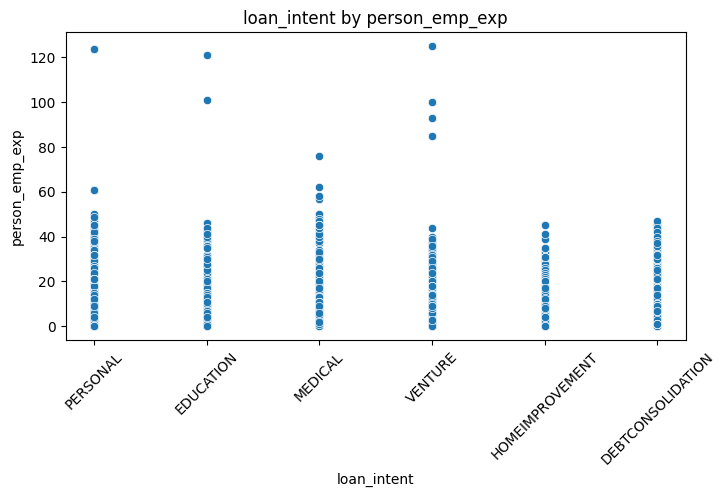

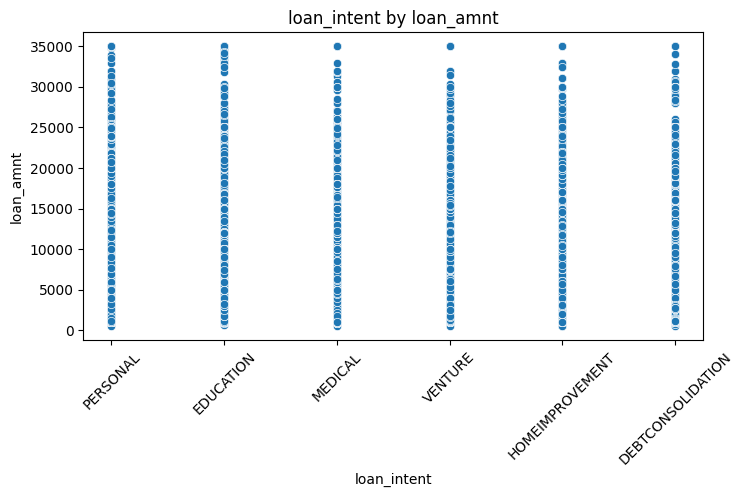

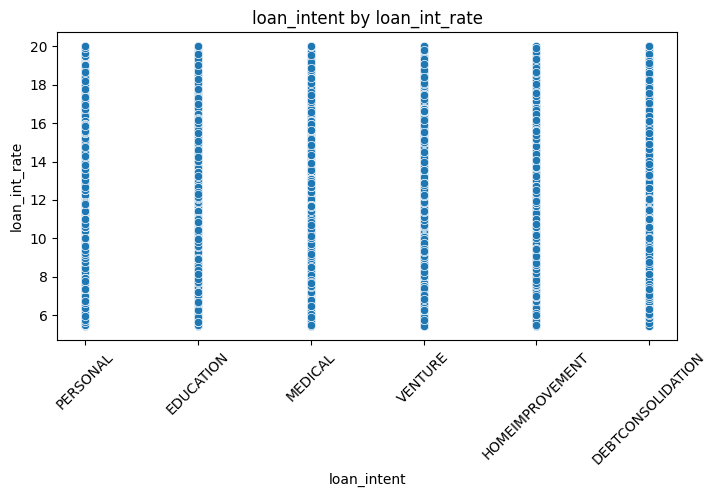

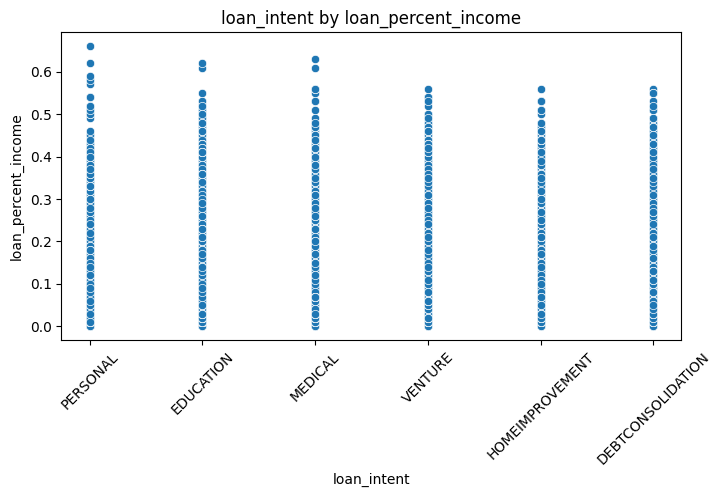

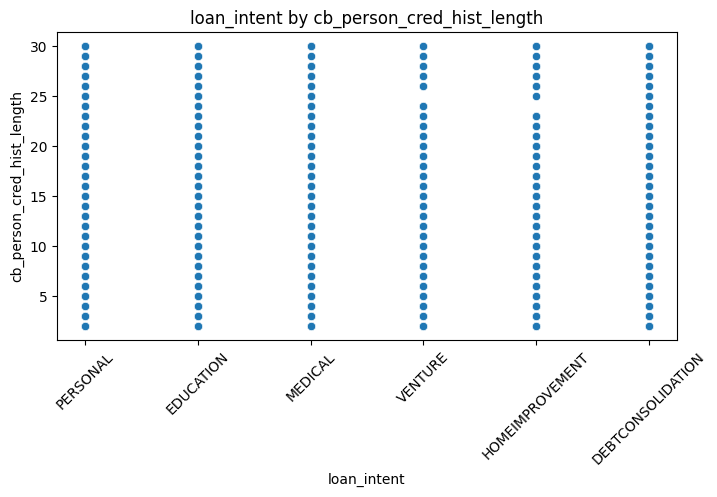

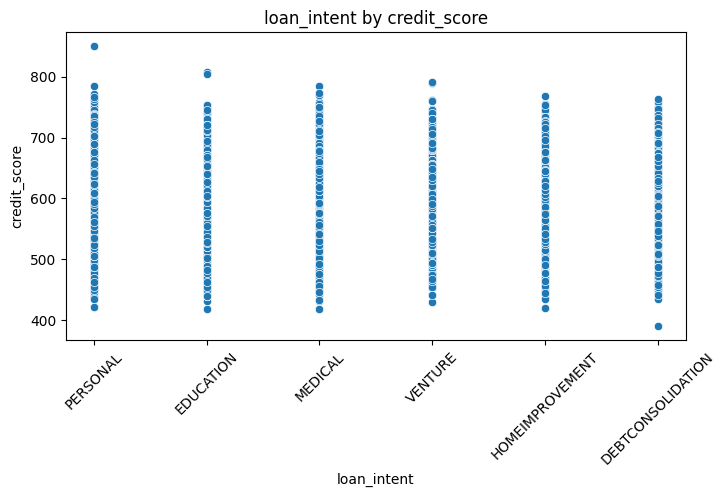

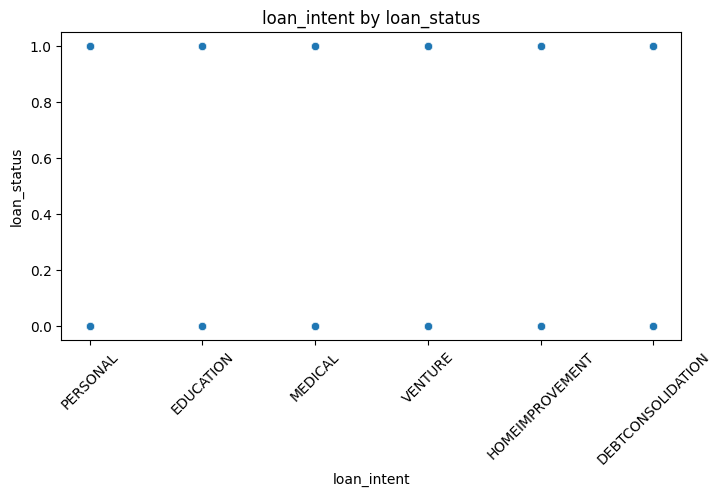

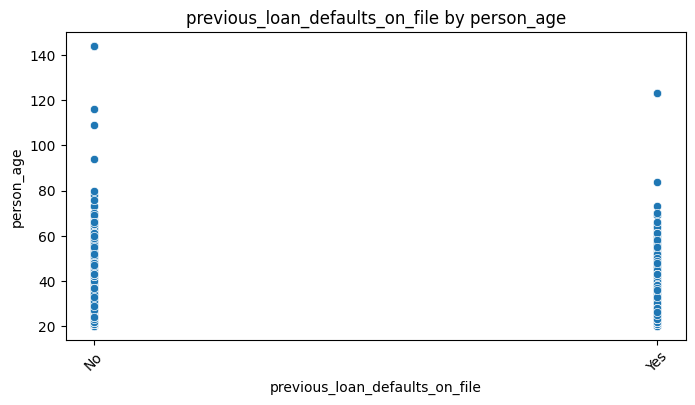

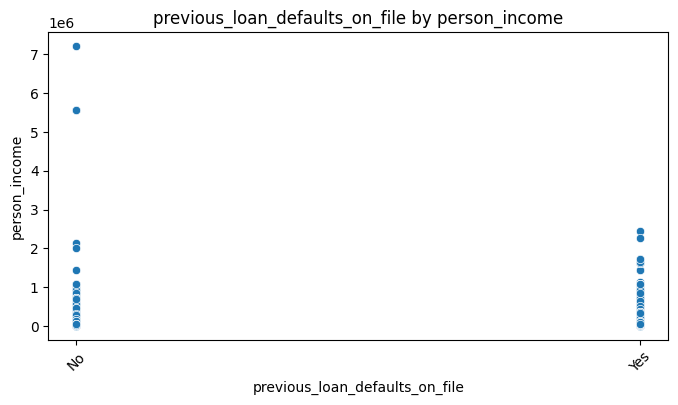

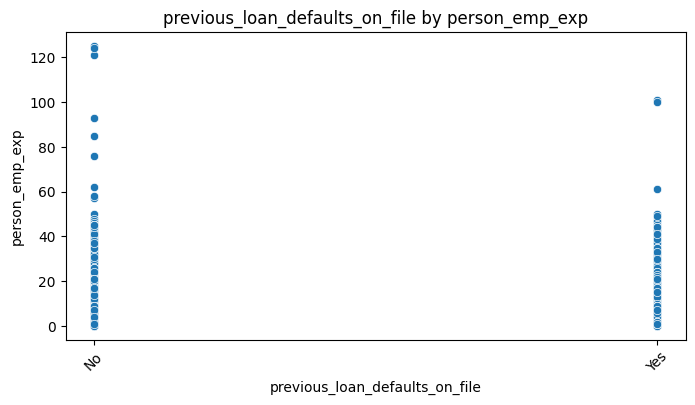

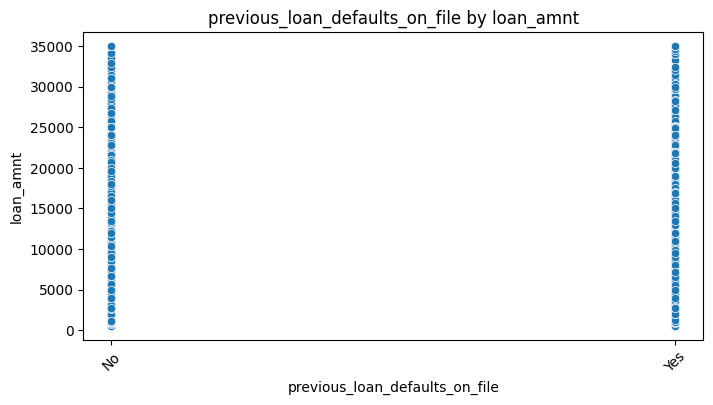

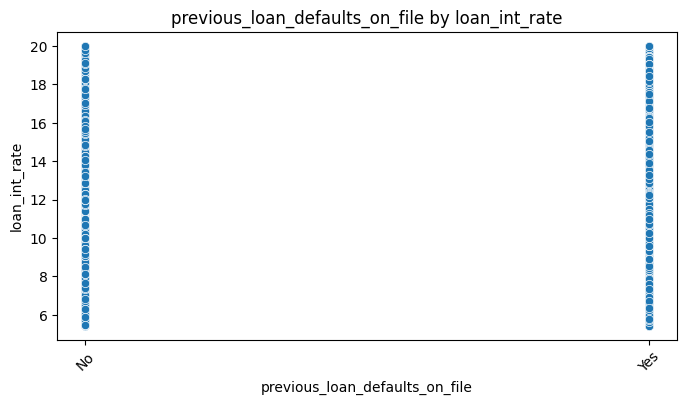

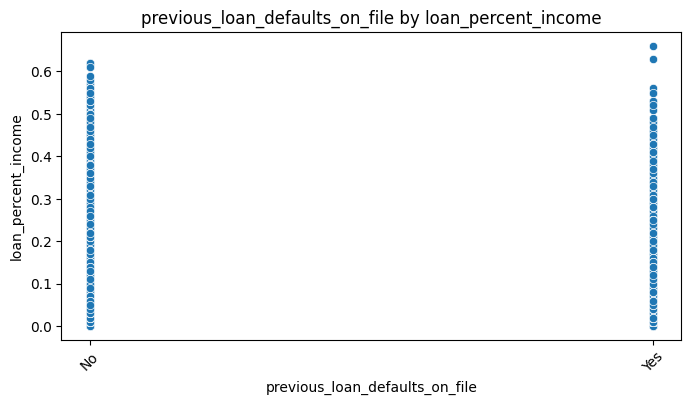

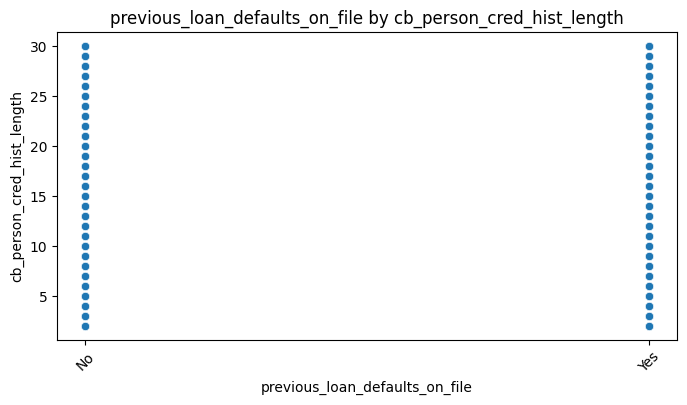

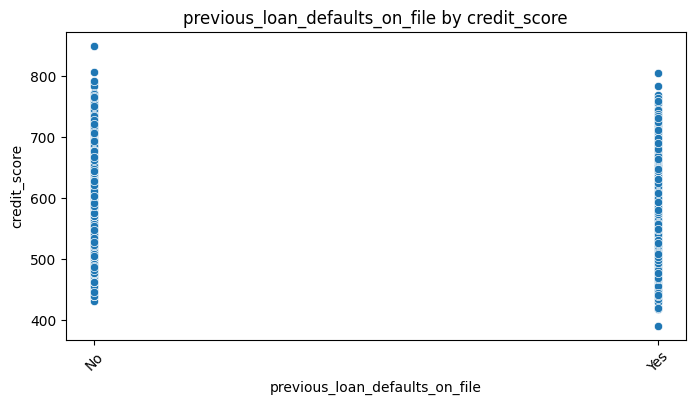

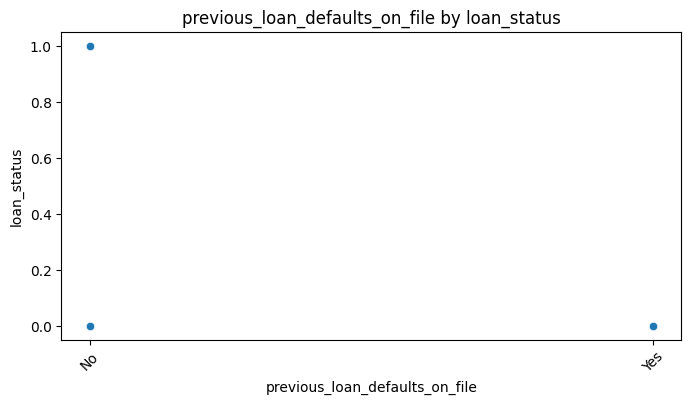

In [ ]:
# Scatter plots for categorical vs numerical columns
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=i, y=j)
        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
# Generate and display pivot tables for categorical and numerical columns
for i in cat_col:
    for j in num_col:
        # Create a pivot table for the categorical and numerical columns
        pivot_table = df.pivot_table(values=j, index=i, aggfunc=['mean', 'median', 'std', 'count'])

        # Display the pivot table
        print(f"Pivot Table for {i} by {j}:\n")
        print(pivot_table)
        print("\n" + "="*50 + "\n")


Pivot Table for person_gender by person_age:

                    mean     median        std      count
              person_age person_age person_age person_age
person_gender                                            
female         27.646560       26.0   5.731260      20159
male           27.859627       26.0   6.286797      24841


Pivot Table for person_gender by person_income:

                       mean        median           std         count
              person_income person_income person_income person_income
person_gender                                                        
female         79410.904856       66958.0   77759.52192         20159
male           81056.034942       67134.0   82514.63011         24841


Pivot Table for person_gender by person_emp_exp:

                        mean         median            std          count
              person_emp_exp person_emp_exp person_emp_exp person_emp_exp
person_gender                                                  

In [ ]:
num_col_1=num_col.columns.to_list()
num_col_1

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [ ]:
cat_col_1=cat_col.columns.to_list()
cat_col_1

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

	Numerical vs Numerical

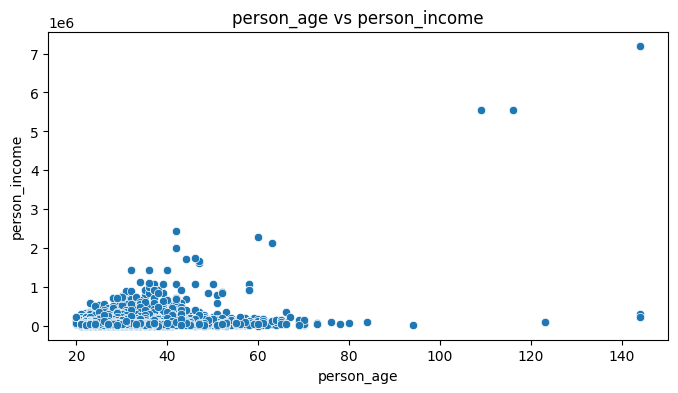

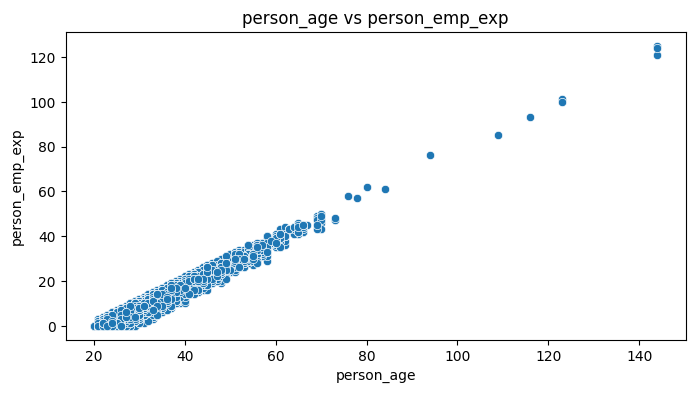

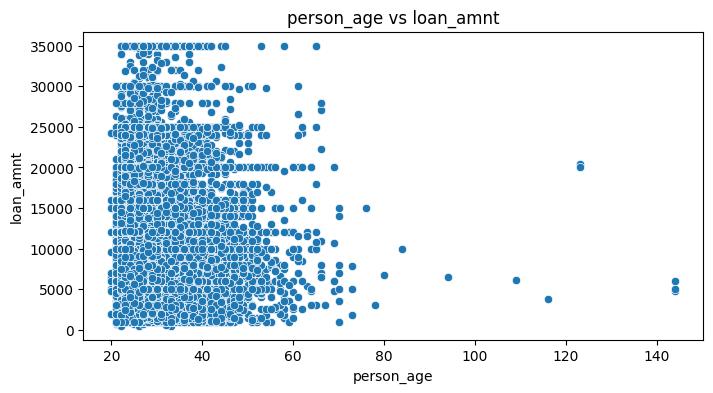

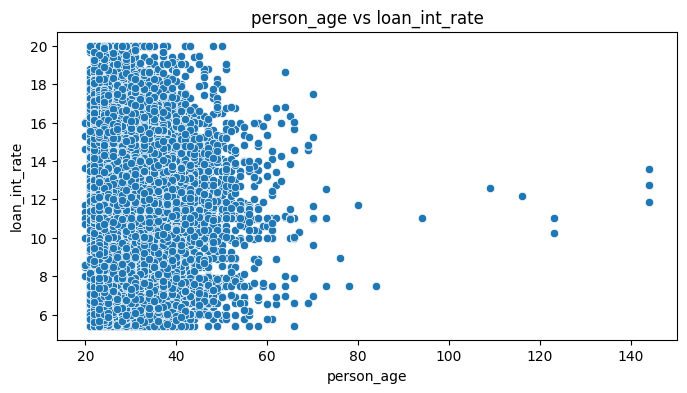

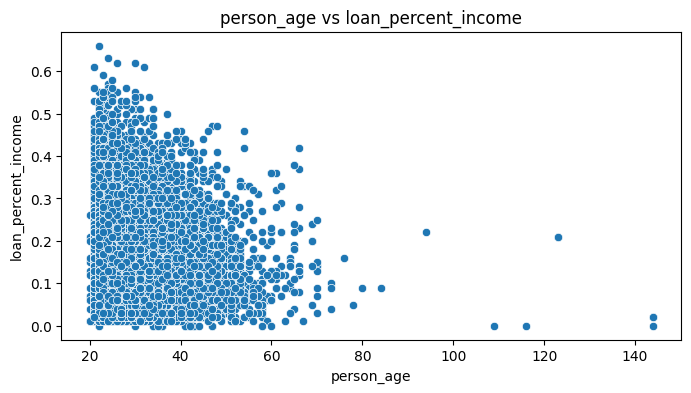

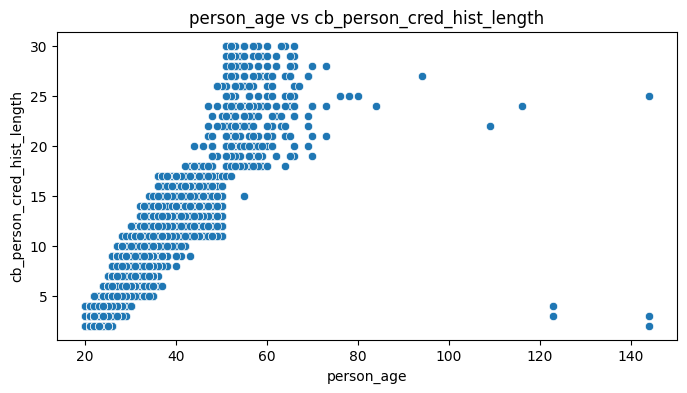

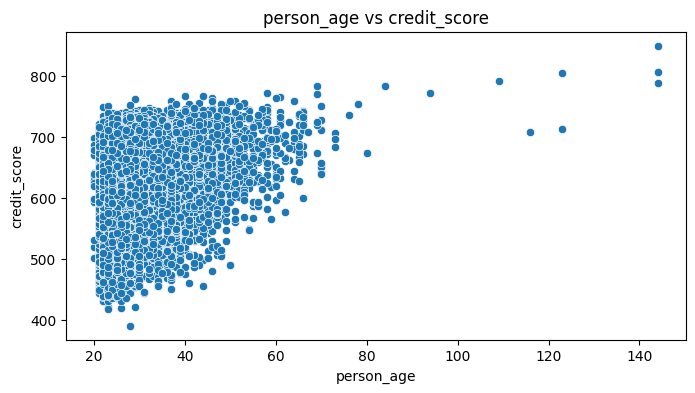

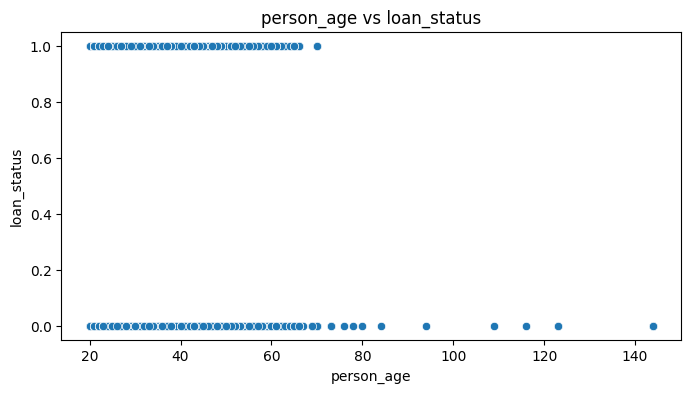

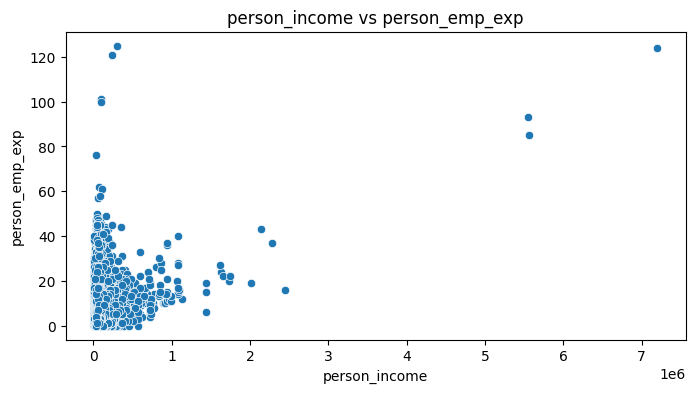

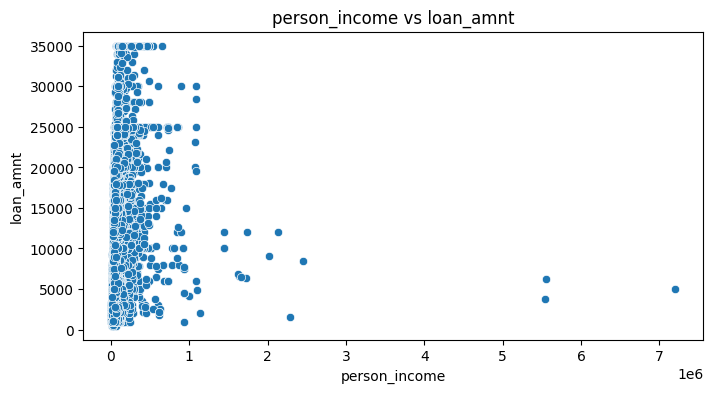

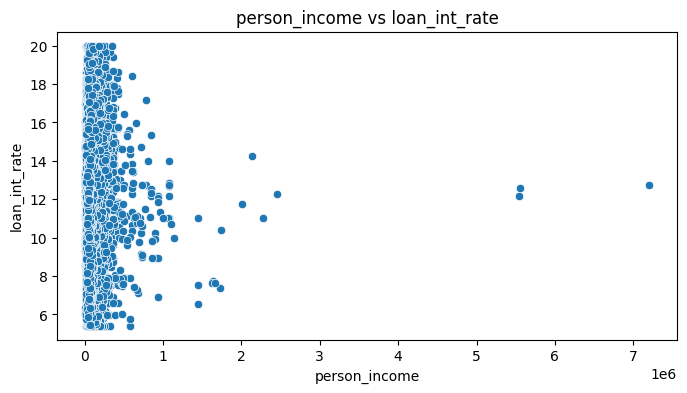

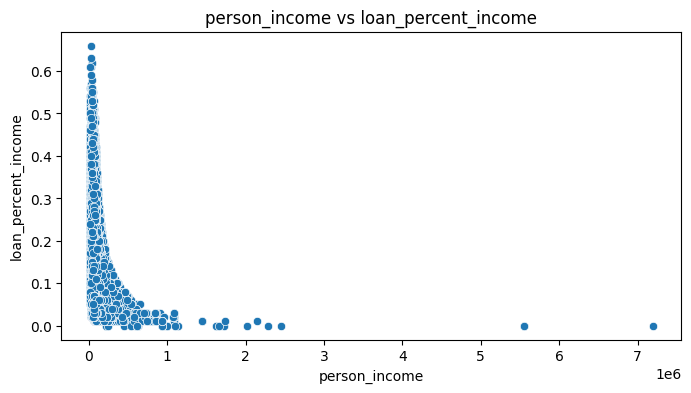

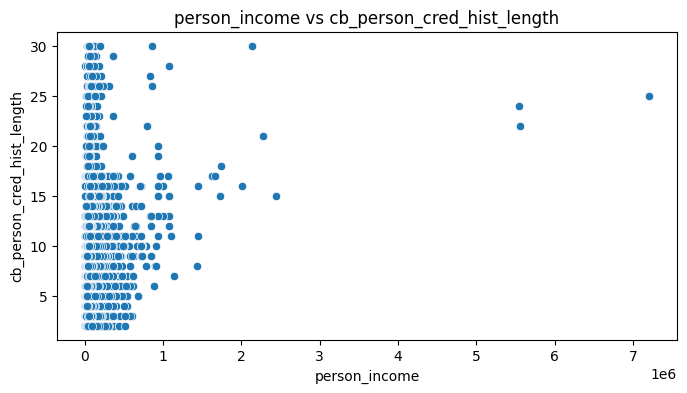

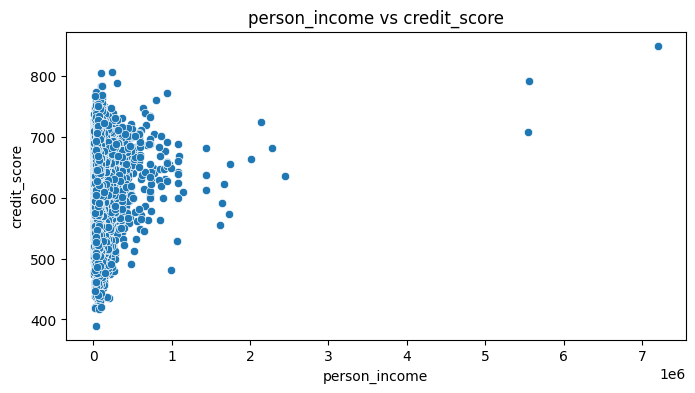

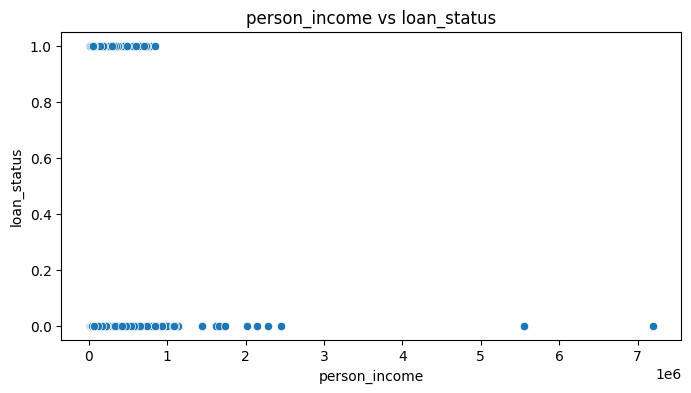

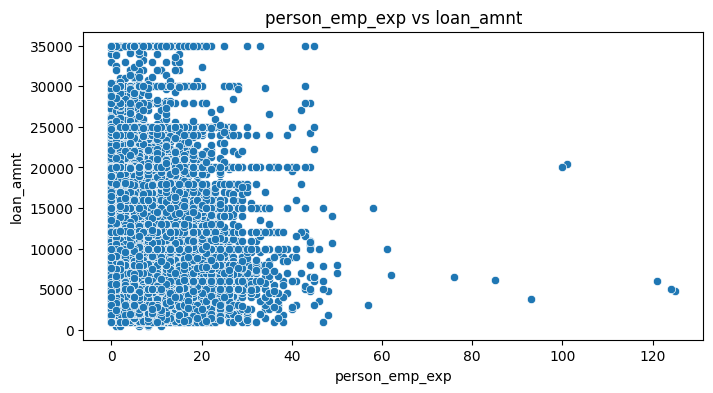

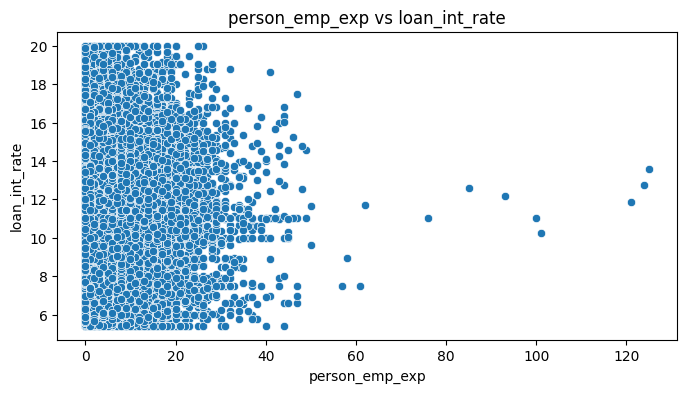

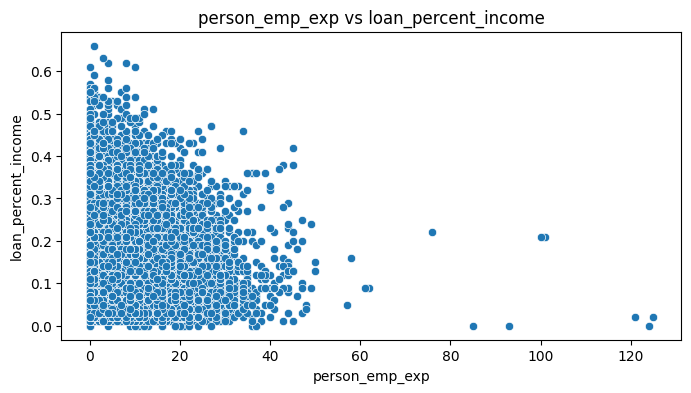

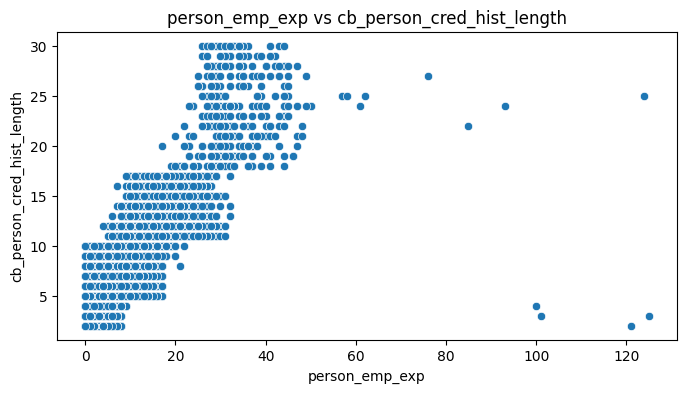

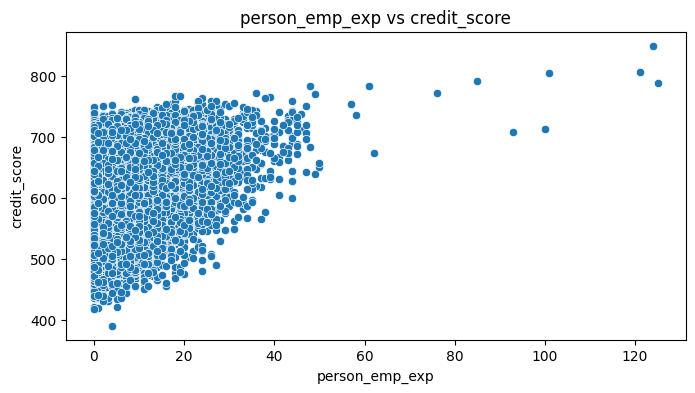

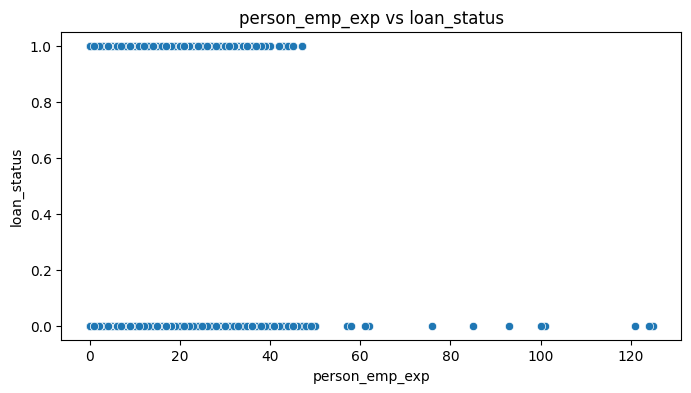

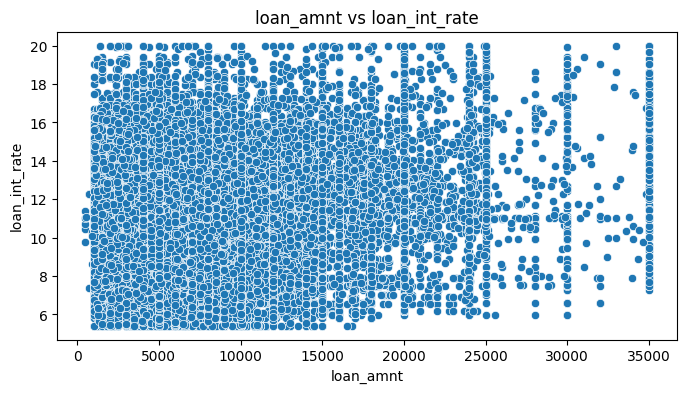

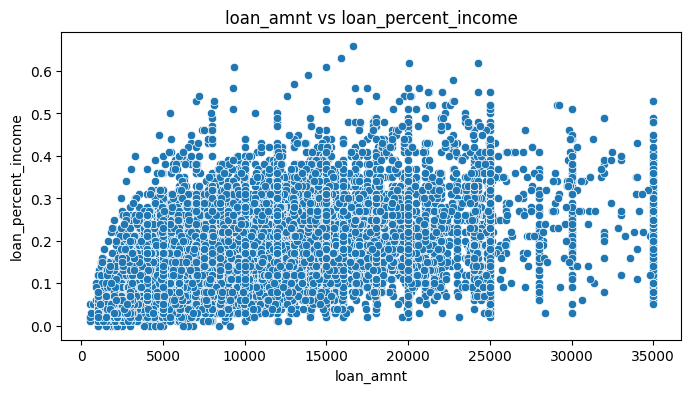

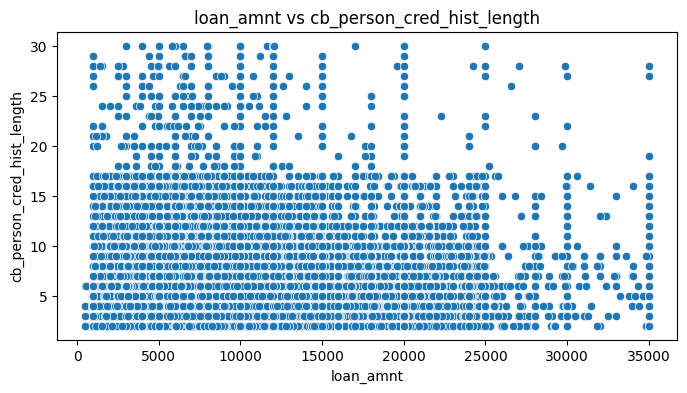

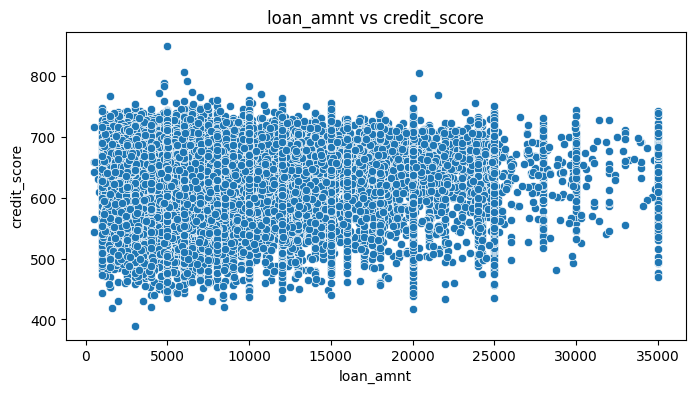

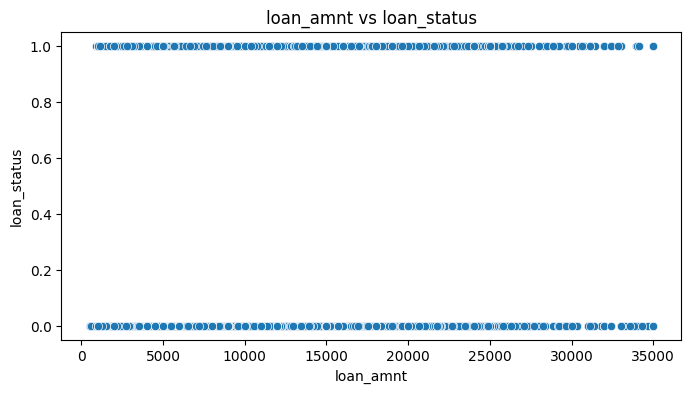

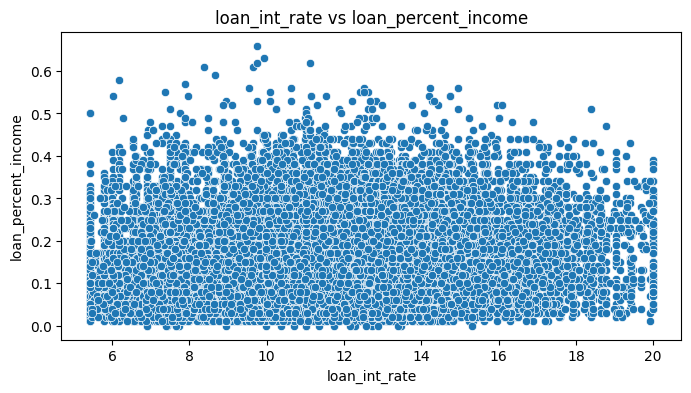

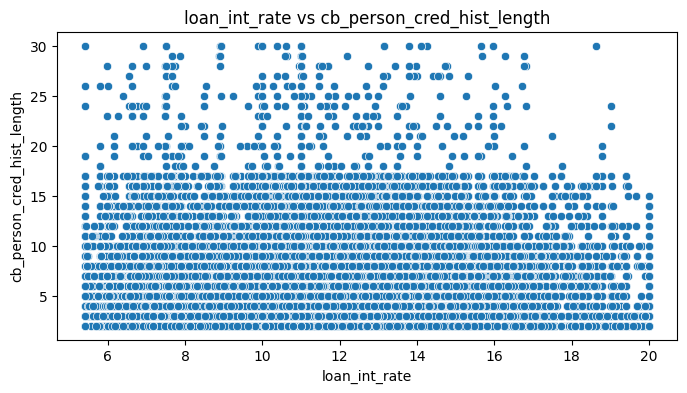

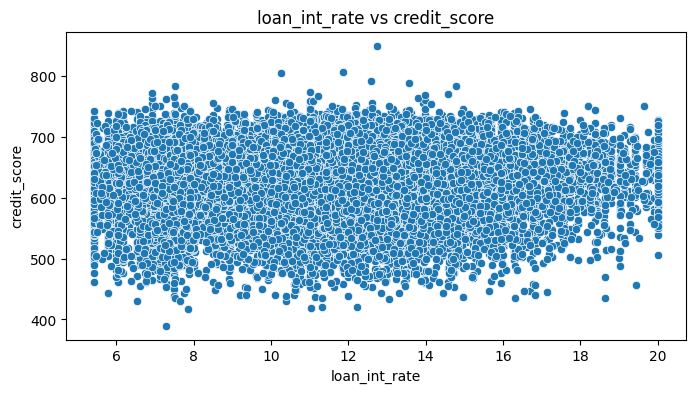

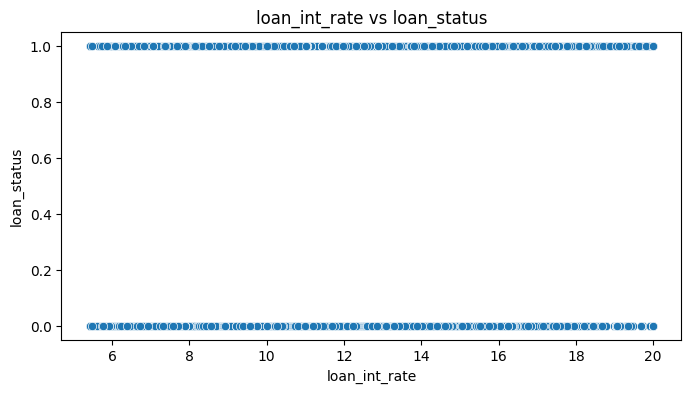

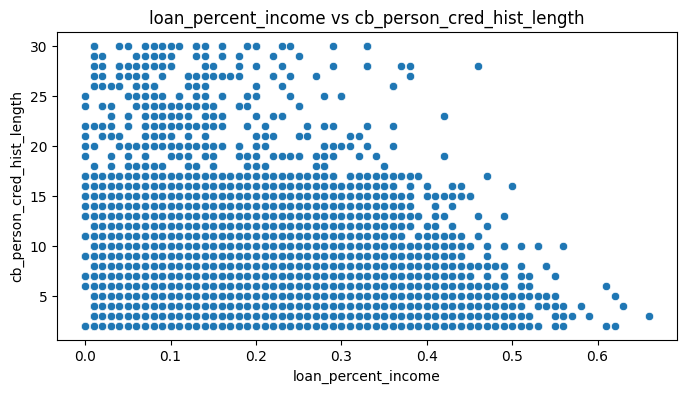

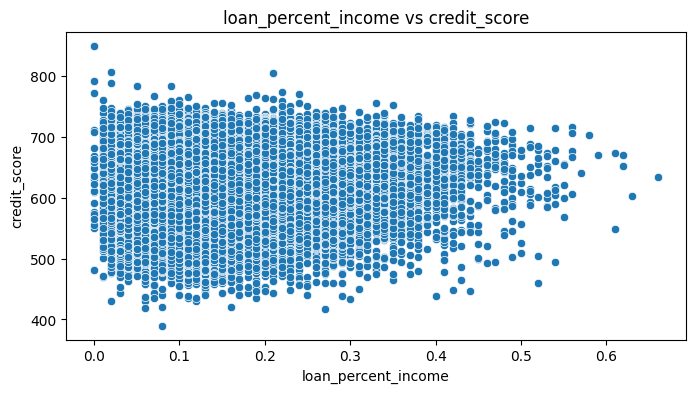

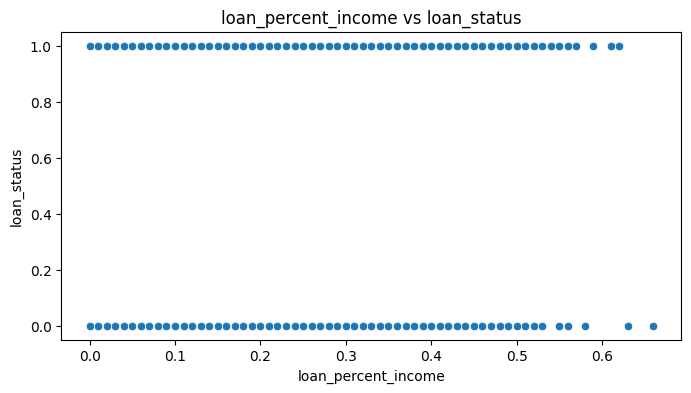

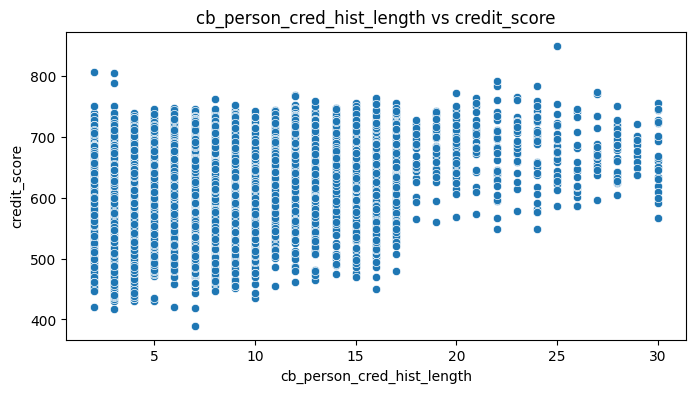

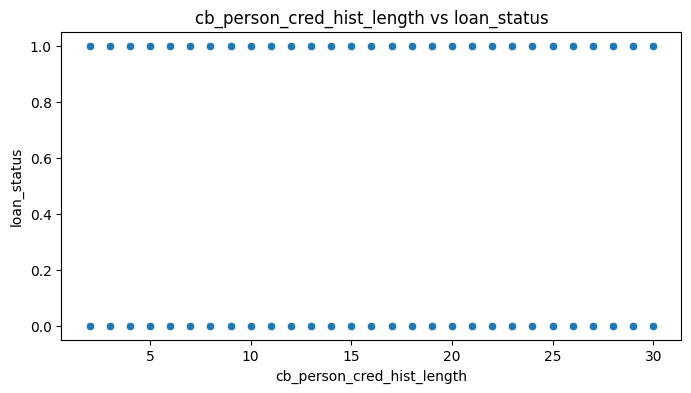

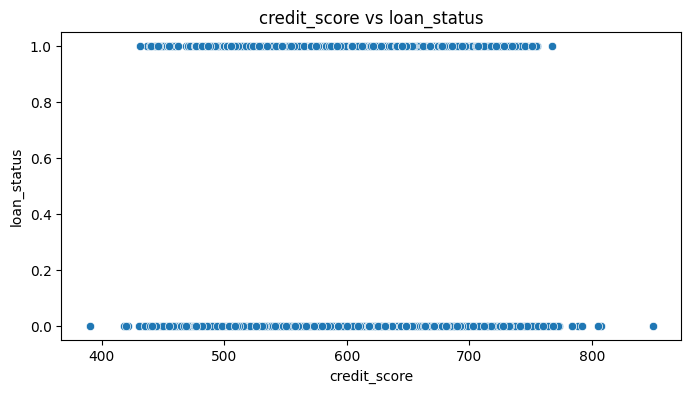

In [ ]:
# Scatter plots for all pairs of numerical columns
for i in range(len(num_col_1)):
    for j in range(i + 1, len(num_col_1)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=num_col_1[i], y=num_col_1[j])
        plt.title(f'{num_col_1[i]} vs {num_col_1[j]}')
        plt.show()


**Key	observation_7**
 1.	The	person	with	the	highest	age	has	the	highest	income	but	did	not	receive	a	loan.
 2.	The	person	with	the	highest	age	also	has	the	highest	credit	score.
 3.	Individuals	aged	80	and	above	did	not	receive	a	loan.
 4.	The	person	with	the	highest	income	also	has	the	highest	credit	score.
 5.	Individuals	earning	more	than	3,000,000	did	not	receive	a	loan.

**4.Categorical	vs	Categorical**

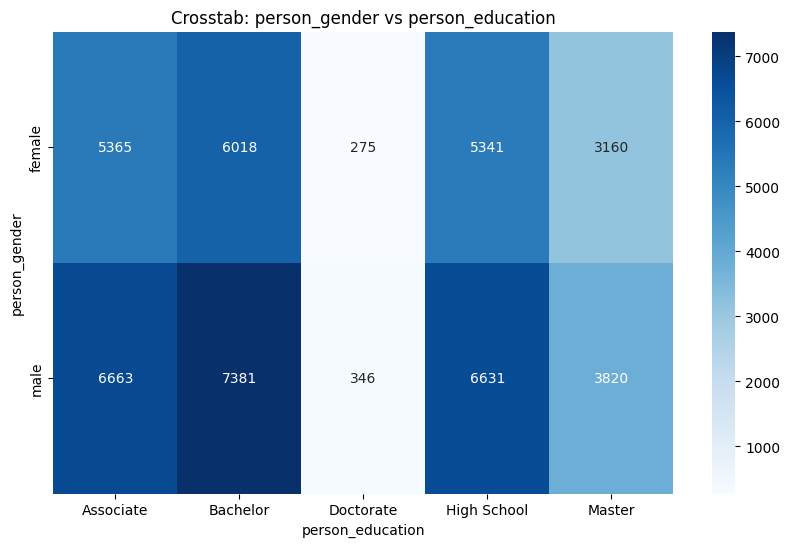

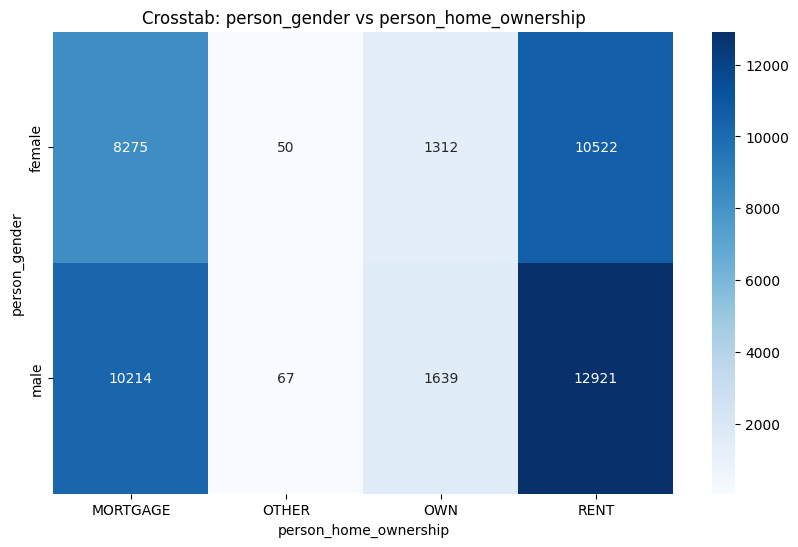

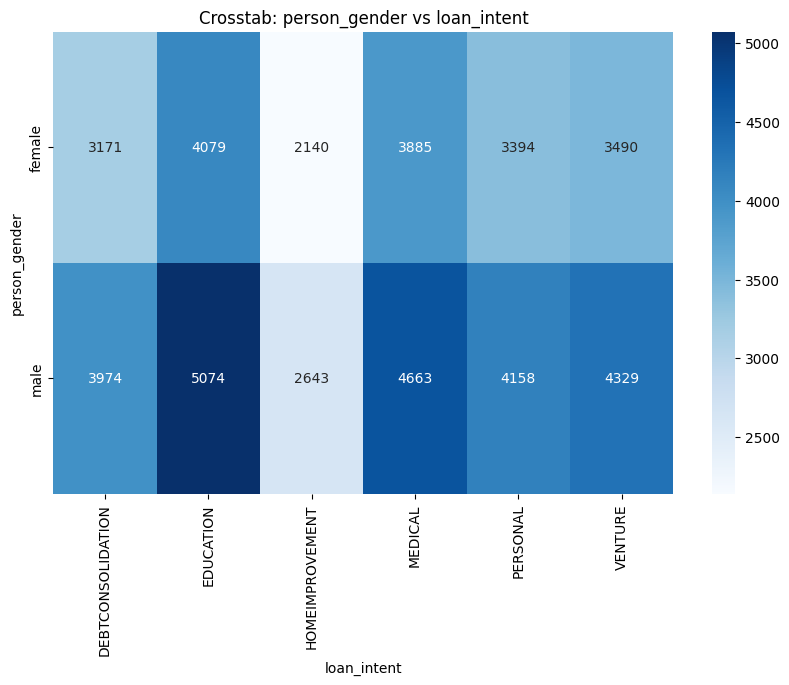

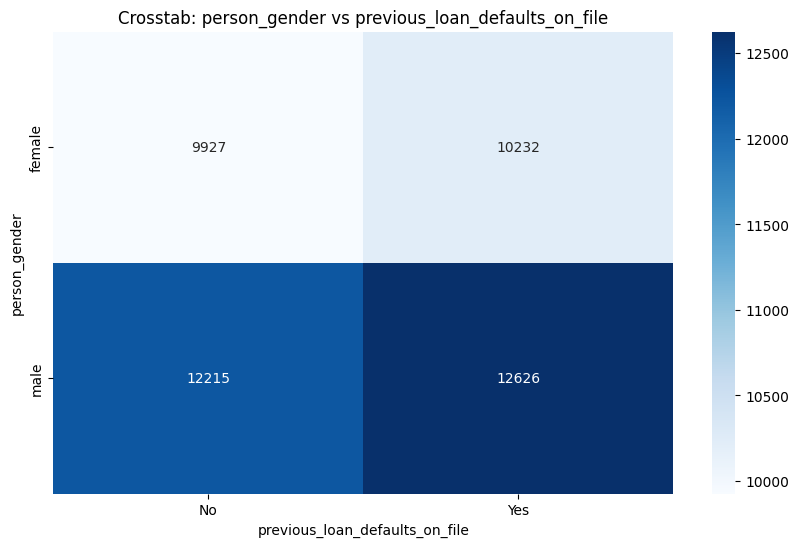

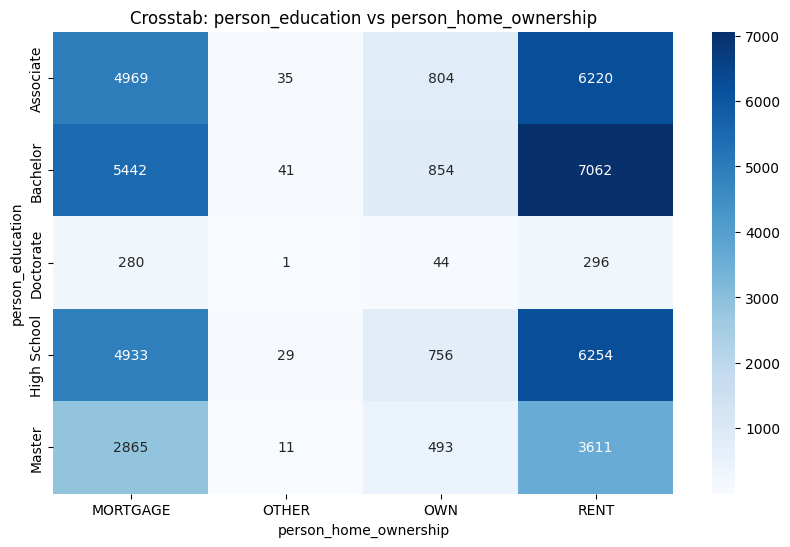

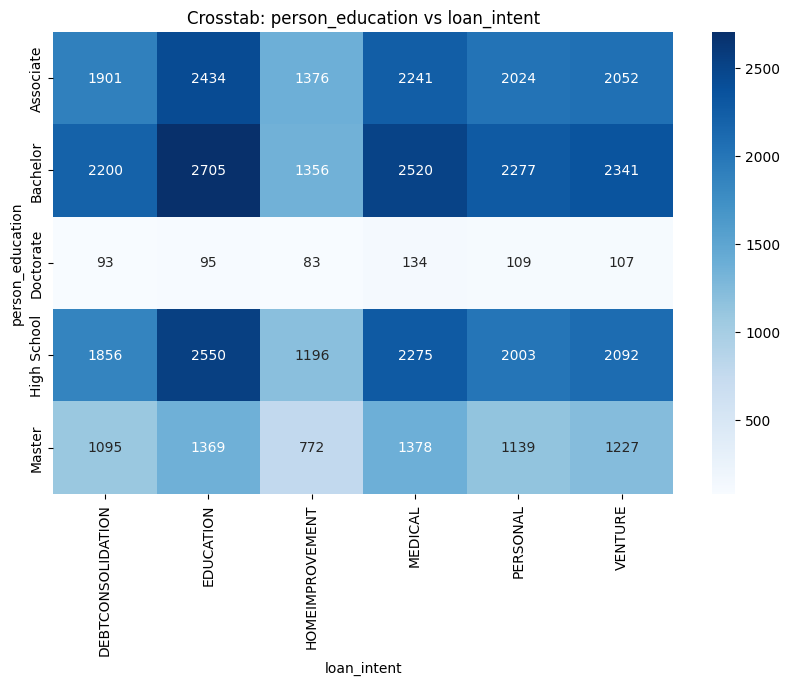

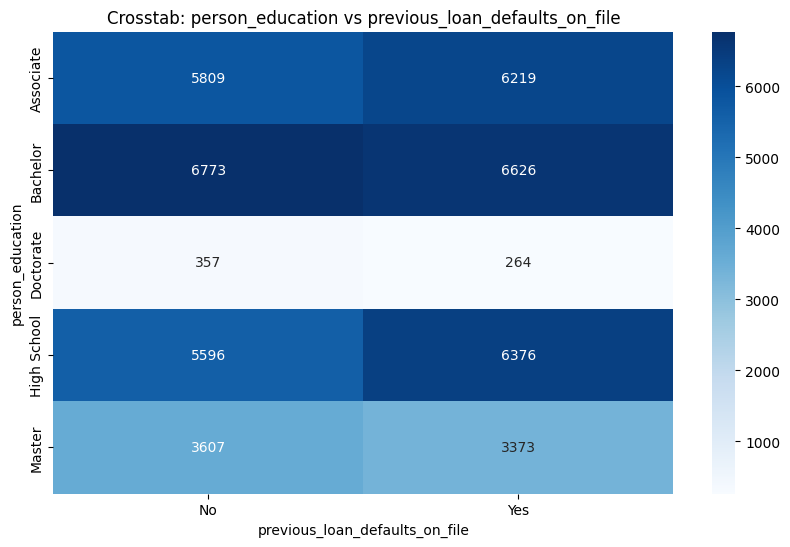

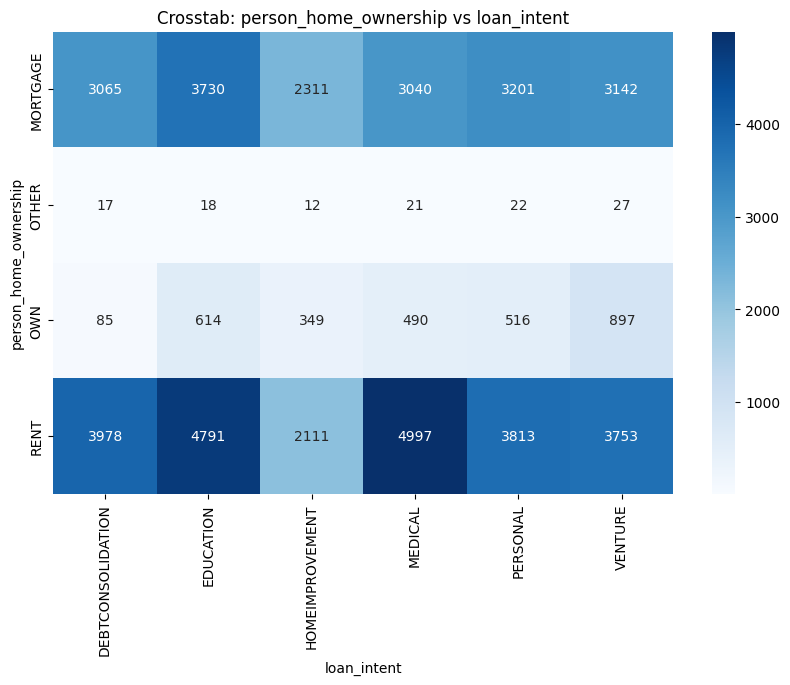

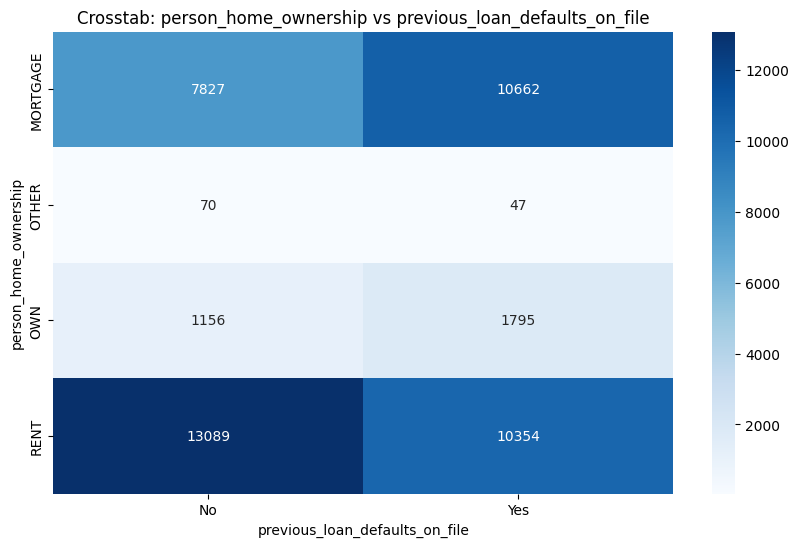

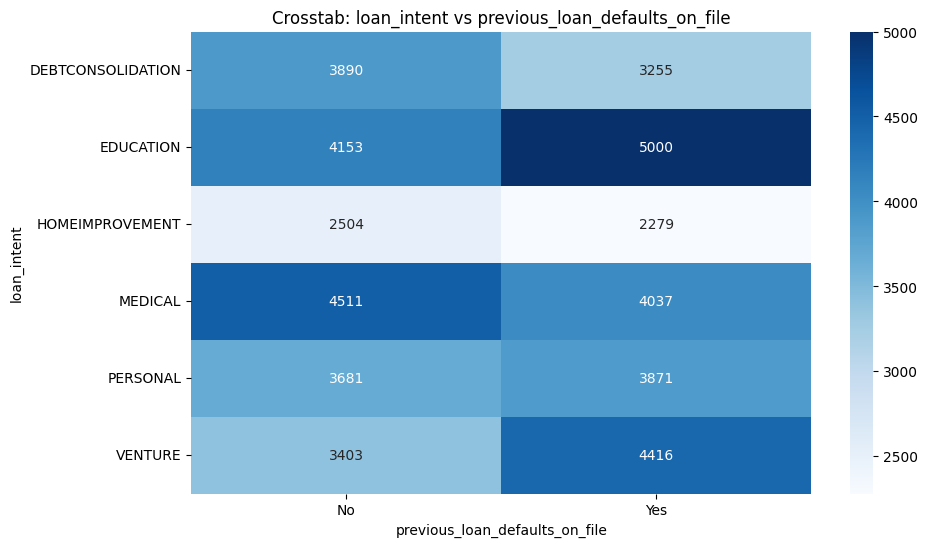

In [ ]:
# Heatmap of crosstabs for all pairs of categorical columns
for i in range(len(cat_col_1)):
    for j in range(i + 1, len(cat_col_1)):
        # Create a crosstab for the two categorical columns
        crosstab = pd.crosstab(df[cat_col_1[i]], df[cat_col_1[j]])

        # Plot the heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Crosstab: {cat_col_1[i]} vs {cat_col_1[j]}')
        plt.show()


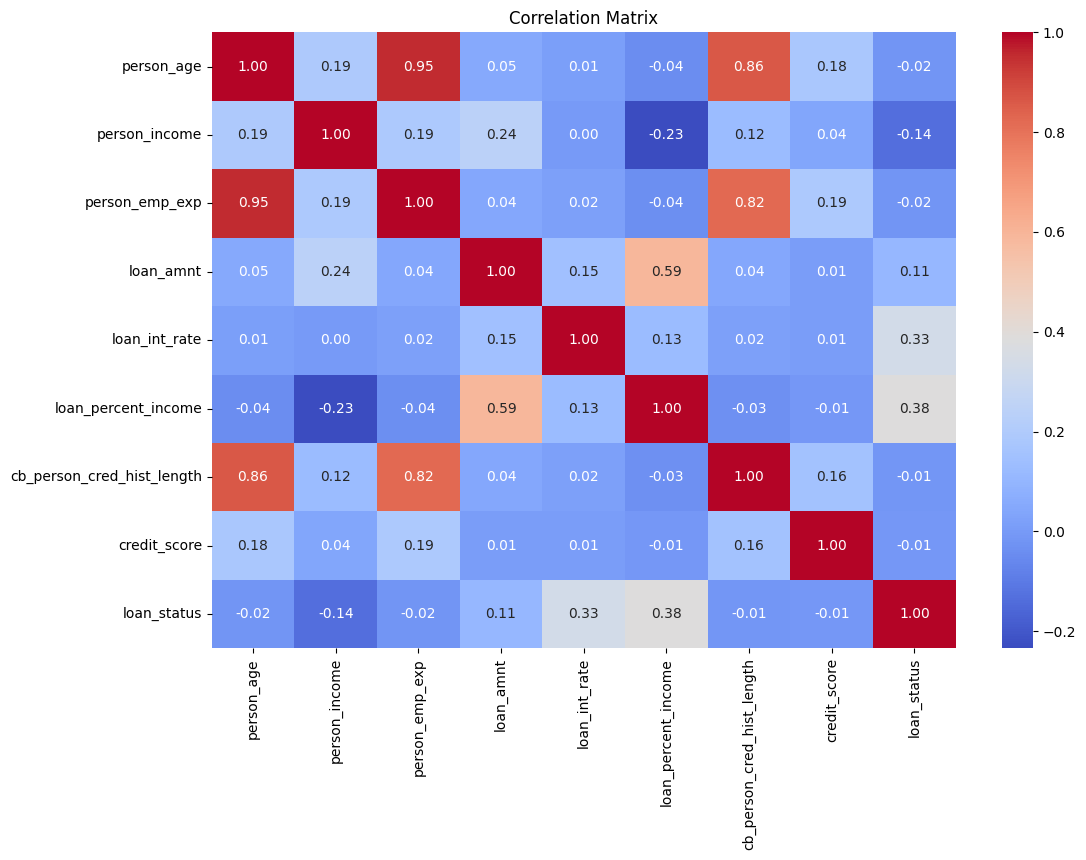

In [ ]:
# Correlation matrix heatmap for numerical columns
corr = df[num_col_1].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Key	Observation_9**
1.	Person	age	&	exp	has	very	high	corelation	(0.95)
2.	Person	age	&	credit	hist	length	has	very	high	corelation	(0.86)

In [ ]:
df1=df.copy()
df1

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

<Axes: xlabel='person_age'>

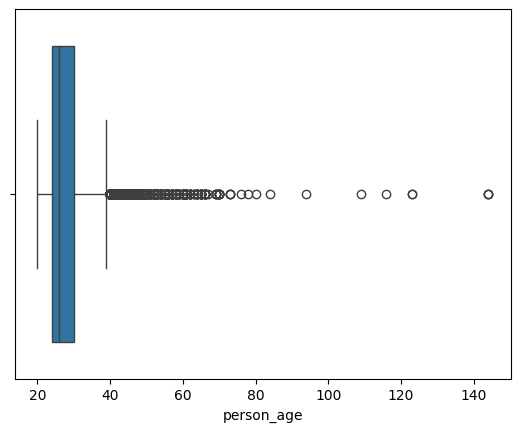

In [ ]:
sns.boxplot(x=df['person_age'])


**Handling Outlier**

In [ ]:
# Finding the IQR
percentile25 = df['person_age'].quantile(0.25)  # 25th percentile (Q1)
percentile75 = df['person_age'].quantile(0.75)  # 75th percentile (Q3)


In [ ]:
iqr	=	percentile75	-	percentile25

In [ ]:
upper_limit	=	percentile75	+	1.5	*	iqr
lower_limit	=	percentile25	-	1.5	*	iqr

In [ ]:
upper_limit # Upper Limit Value

39.0

In [ ]:
# Lower limit Value
lower_limit

15.0

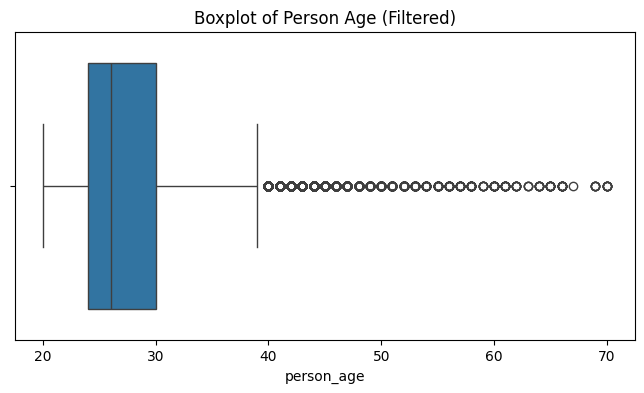

In [ ]:
# Filter the DataFrame
df1 = df1[df1['person_age'] <= 70]

# Create a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['person_age'])
plt.title('Boxplot of Person Age (Filtered)')
plt.show()


In [ ]:
# Finding the IQR
percentile25 = df['person_income'].quantile(0.25)  # 25th percentile (Q1)
percentile75 = df['person_income'].quantile(0.75)  # 75th percentile (Q3)


In [ ]:
iqr	=	percentile75	-	percentile25
upper_limit_1	=	percentile75	+	1.5	*	iqr
lower_limit_1	=	percentile25	-	1.5	*	iqr


In [ ]:
upper_limit_1


168667.125

In [ ]:
lower_limit_1

-25673.875

In [ ]:
df1[df1['person_income'] > 1200000]


person_age person_gender person_education  person_income  \
17833        32.0        female      High School      1440746.0   
29119        36.0          male        Doctorate      1440982.0   
29120        40.0        female         Bachelor      1440915.0   
30049        42.0          male      High School      2448661.0   
31922        47.0          male      High School      1635757.0   
31924        44.0          male      High School      1728974.0   
32497        63.0          male      High School      2139143.0   
32546        60.0        female      High School      2280980.0   
33132        47.0          male        Associate      1621992.0   
35850        47.0          male        Associate      1661567.0   
37175        42.0          male      High School      2012954.0   
41288        46.0          male        Associate      1741243.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
17833               6              MORTGAGE    12000.0            VENTURE   
29119              15                   OWN    10000.0            MEDICAL   
29120              19              MORTGAGE    10000.0            MEDICAL   
30049              16                  RENT     8450.0            VENTURE   
31922              24              MORTGAGE     6600.0            VENTURE   
31924              20              MORTGAGE     6400.0  DEBTCONSOLIDATION   
32497              43                  RENT    12025.0          EDUCATION   
32546              37              MORTGAGE     1500.0           PERSONAL   
33132              27              MORTGAGE     6835.0            MEDICAL   
35850              22              MORTGAGE     6545.0            MEDICAL   
37175              19              MORTGAGE     9121.0            VENTURE   
41288              22              MORTGAGE    12011.0            VENTURE   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
17833           7.51                 0.01                         8.0   
29119           6.54                 0.01                        11.0   
29120          11.01                 0.01                        16.0   
30049          12.29                 0.00                        15.0   
31922           7.74                 0.00                        17.0   
31924           7.40                 0.00                        15.0   
32497          14.27                 0.01                        30.0   
32546          11.01                 0.00                        21.0   
33132           7.66                 0.00                        17.0   
35850           7.65                 0.00                        17.0   
37175          11.74                 0.00                        16.0   
41288          10.42                 0.01                        18.0   

       credit_score previous_loan_defaults_on_file  loan_status  
17833           613                             No            0  
29119           682                            Yes            0  
29120           637                            Yes            0  
30049           635                            Yes            0  
31922           591                            Yes            0  
31924           573                            Yes            0  
32497           724                             No            0  
32546           682                            Yes            0  
33132           555                            Yes            0  
35850           622                            Yes            0  
37175           664                             No            0  
41288           655                            Yes            0

In [ ]:
df1	=	df1[df1['person_income']	<=1200000]	#	Considering	1200000	is	upper	limit

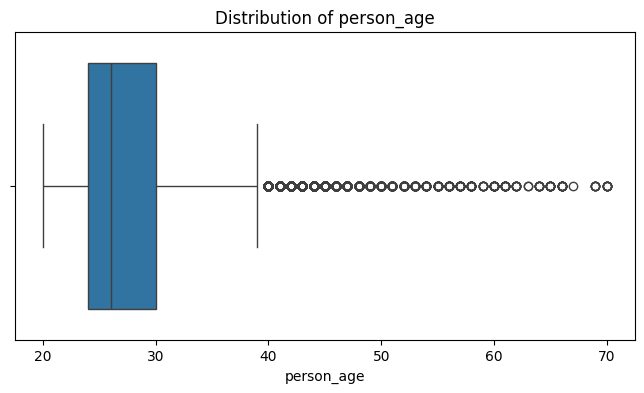

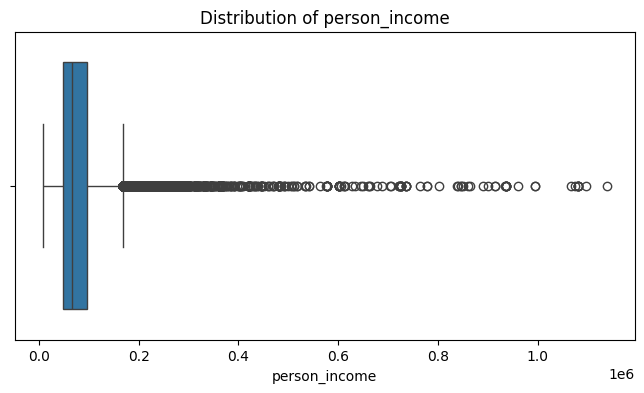

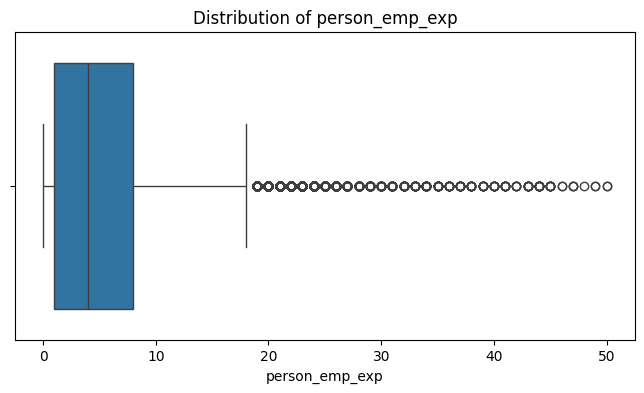

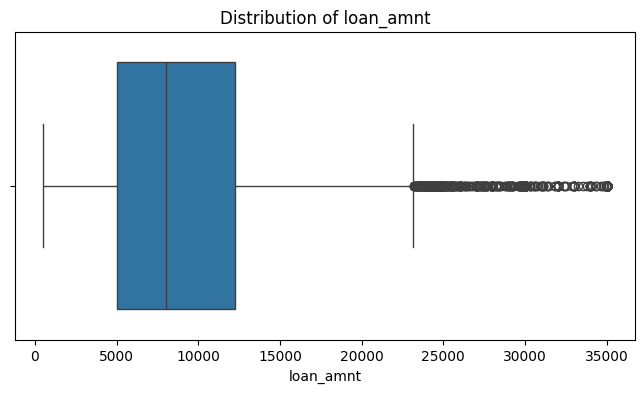

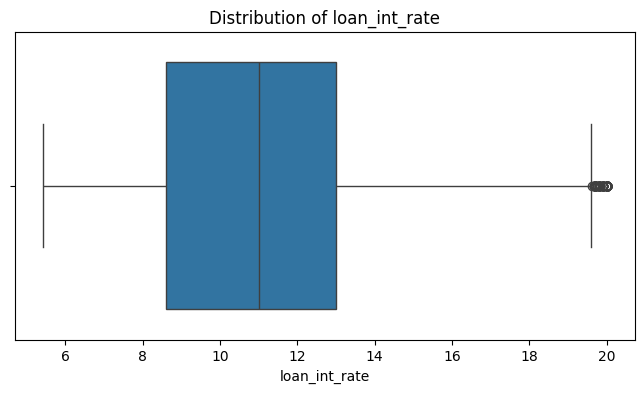

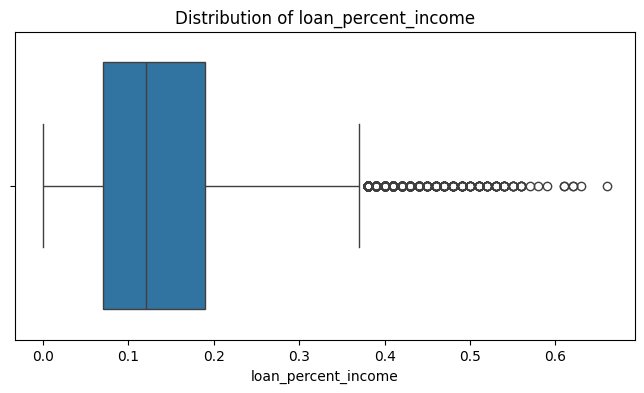

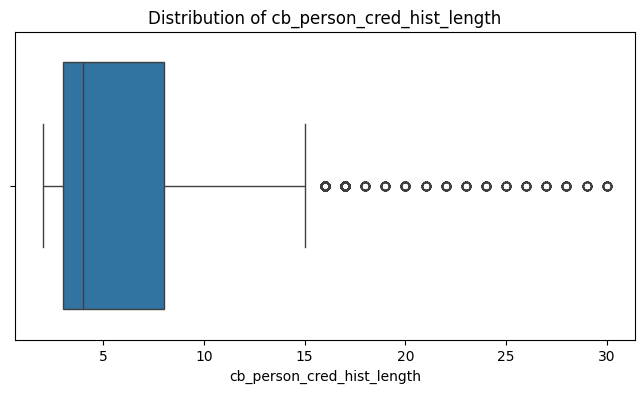

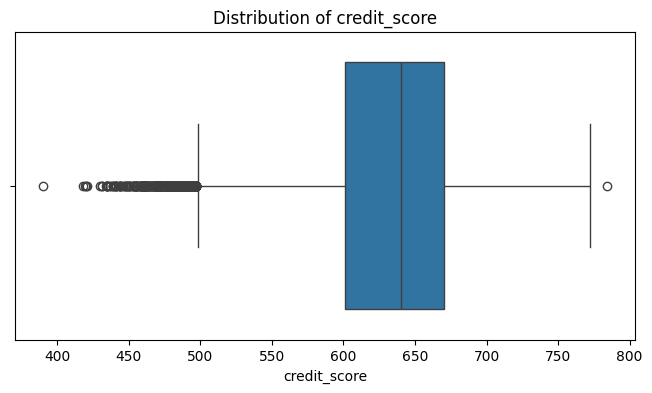

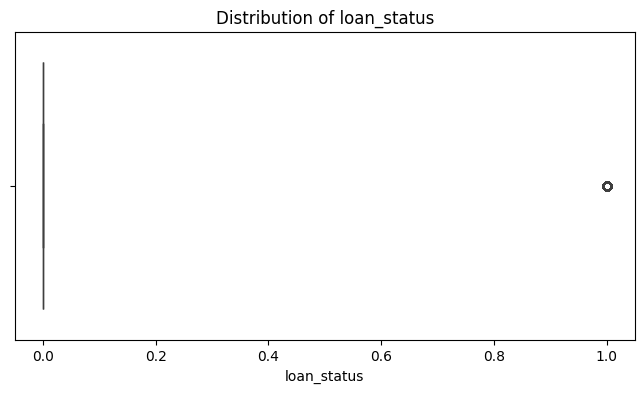

In [ ]:
# Univariate analysis for numerical columns
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])  # Use x= for single variable boxplots
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:
df1

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[44973 rows x 14 columns]

**Splitting	data	into	X	&	y**

In [ ]:
X = df.drop(columns='loan_status')
y=df['loan_status']

In [ ]:
# Check class distribution
print(y.value_counts())


loan_status
0    35000
1    10000
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


In [ ]:
# Applying log transformation to avoid log(0)
X_train['age_new'] = np.log(X_train['person_age'] + 0.01)  # Adding 0.01 to avoid log(0)
X_train['person_income_new'] = np.log(X_train['person_income'] + 0.01)
X_train['exp_new'] = np.log(X_train['person_emp_exp'] + 0.01)
X_train['loan_amt_new'] = np.log(X_train['loan_amnt'] + 0.01)
X_train['loan_per_new'] = np.log(X_train['loan_percent_income'] + 0.01)


In [ ]:
X_train.head()

person_age person_gender person_education  person_income  \
16888        23.0          male        Associate        56268.0   
26234        33.0        female        Associate       119465.0   
14962        22.0          male      High School       145016.0   
17503        25.0          male      High School        34368.0   
32005        38.0        female      High School       241072.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
16888               3                  RENT    12800.0    PERSONAL   
26234              12              MORTGAGE    24000.0     MEDICAL   
14962               0              MORTGAGE    22000.0     MEDICAL   
17503               1                   OWN    14125.0   EDUCATION   
32005              19              MORTGAGE    20000.0     MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16888          19.41                 0.23                         2.0   
26234          11.36                 0.20                         7.0   
14962           7.49                 0.15                         3.0   
17503           6.99                 0.41                         2.0   
32005          11.48                 0.08                        11.0   

       credit_score previous_loan_defaults_on_file   age_new  \
16888           602                             No  3.135929   
26234           653                            Yes  3.496811   
14962           572                            Yes  3.091497   
17503           536                             No  3.219276   
32005           487                            Yes  3.637849   

       person_income_new   exp_new  loan_amt_new  loan_per_new  
16888          10.937881  1.101940      9.457201     -1.427116  
26234          11.690779  2.485740     10.085810     -1.560648  
14962          11.884599 -4.605170      9.998798     -1.832581  
17503          10.444881  0.009950      9.555702     -0.867501  
32005          12.392851  2.944965      9.903488     -2.407946

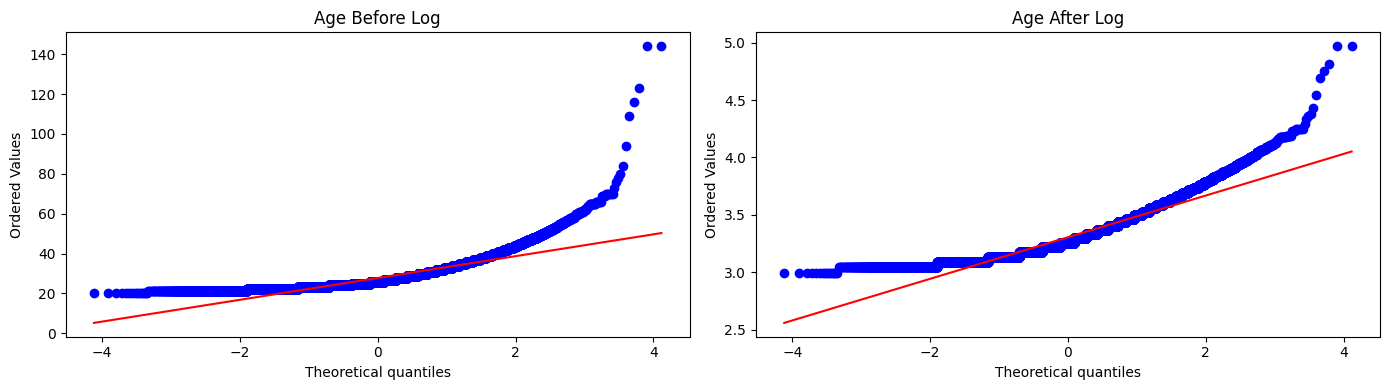

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(1, 2, 1)
stats.probplot(X_train['person_age'], dist="norm", plot=plt)
plt.title('Age Before Log')

# Q-Q plot after log transformation
plt.subplot(1, 2, 2)
stats.probplot(X_train['age_new'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.tight_layout()
plt.show()


In [ ]:
X_train['person_age'].skew()

2.4607418991773025

In [ ]:
X_train['age_new'].skew()

1.1970132074279902

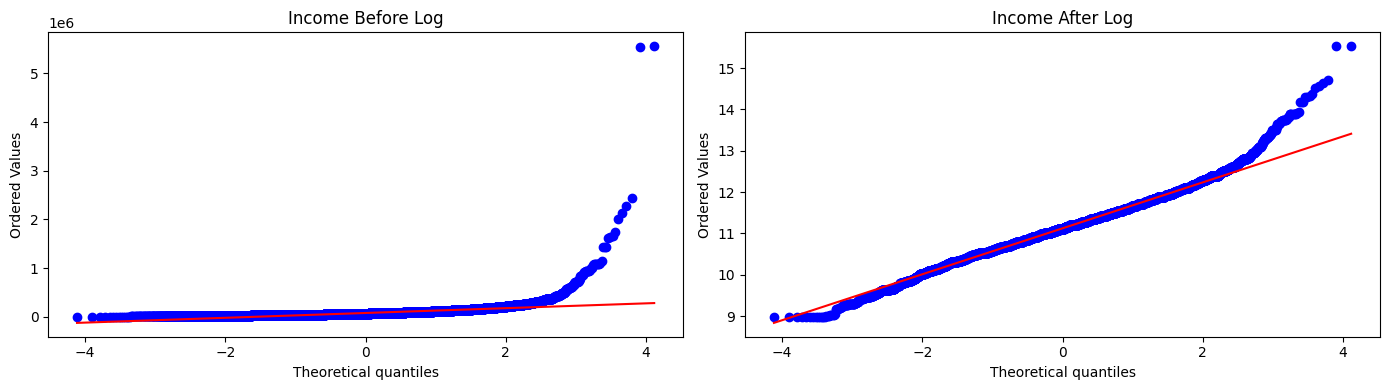

In [ ]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(1, 2, 1)
stats.probplot(X_train['person_income'], dist="norm", plot=plt)
plt.title('Income Before Log')

# Q-Q plot after log transformation
plt.subplot(1, 2, 2)
stats.probplot(X_train['person_income_new'], dist="norm", plot=plt)
plt.title('Income After Log')

plt.tight_layout()
plt.show()


In [ ]:
X_train['person_income'].skew()

26.612178656883675

In [ ]:
X_train['person_income_new'].skew()

0.21050758697387603

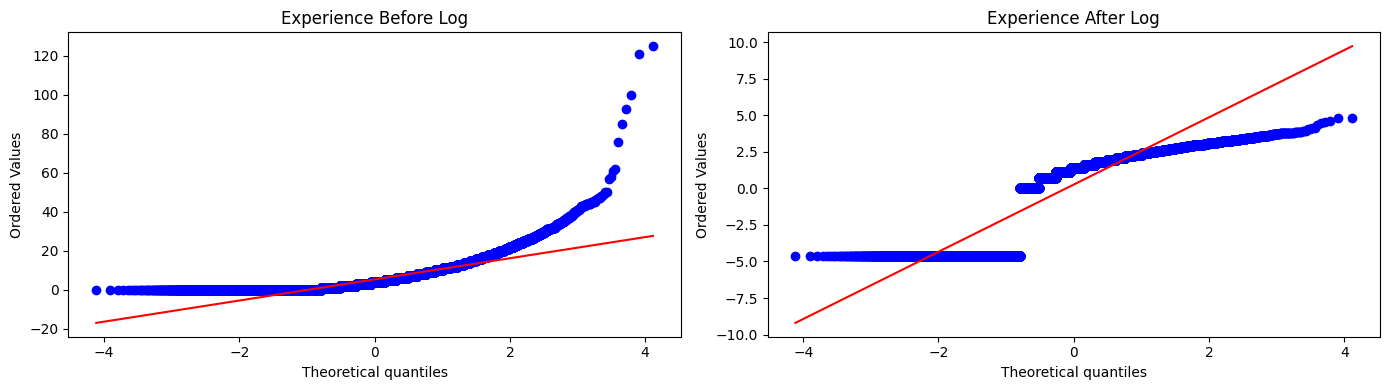

In [ ]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(1, 2, 1)
stats.probplot(X_train['person_emp_exp'], dist="norm", plot=plt)
plt.title('Experience Before Log')

# Q-Q plot after log transformation
plt.subplot(1, 2, 2)
stats.probplot(X_train['exp_new'], dist="norm", plot=plt)
plt.title('Experience After Log')

plt.tight_layout()
plt.show()


In [ ]:
X_train['person_emp_exp'].skew()

2.5082432736510634

In [ ]:
X_train['exp_new'].skew()

-1.105422784175146

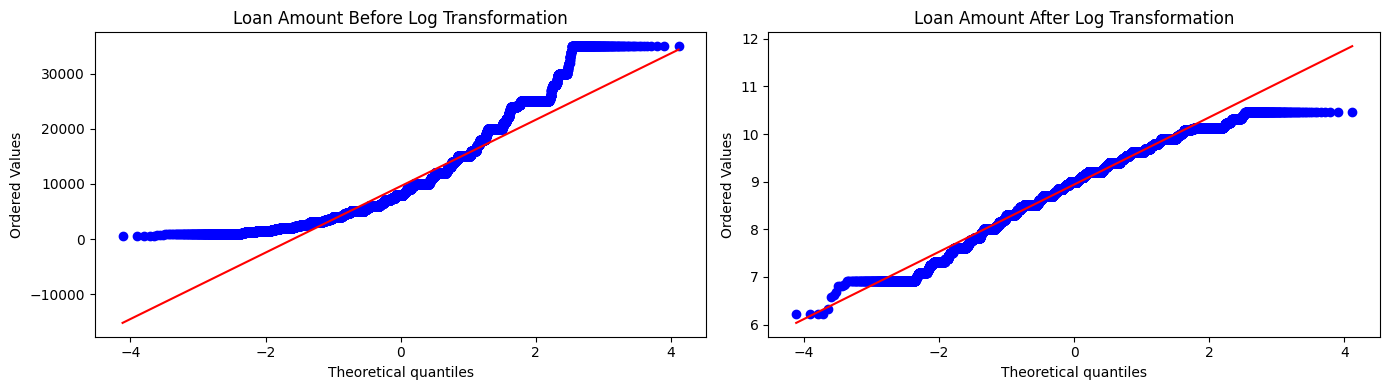

In [ ]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(1, 2, 1)
stats.probplot(X_train['loan_amnt'], dist="norm", plot=plt)
plt.title('Loan Amount Before Log Transformation')

# Q-Q plot after log transformation
plt.subplot(1, 2, 2)
stats.probplot(X_train['loan_amt_new'], dist="norm", plot=plt)  # Fixed typo in 'laon_amt_new'
plt.title('Loan Amount After Log Transformation')

plt.tight_layout()
plt.show()


In [ ]:
X_train['loan_amnt'].skew()

1.1940634507104615

In [ ]:
X_train['loan_amt_new'].skew()

-0.4361175114377548

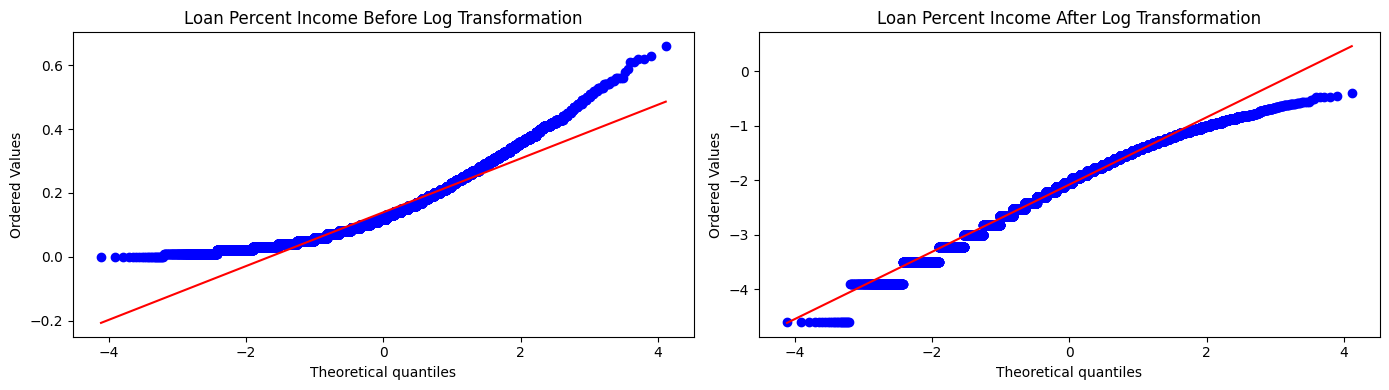

In [ ]:
plt.figure(figsize=(14, 4))

# Q-Q plot before log transformation
plt.subplot(1, 2, 1)
stats.probplot(X_train['loan_percent_income'], dist="norm", plot=plt)
plt.title('Loan Percent Income Before Log Transformation')

# Q-Q plot after log transformation
plt.subplot(1, 2, 2)
stats.probplot(X_train['loan_per_new'], dist="norm", plot=plt)  # Fixed typo in 'laon_per_new'
plt.title('Loan Percent Income After Log Transformation')

plt.tight_layout()
plt.show()


In [ ]:
X_train['loan_percent_income'].skew()

1.041047923248509

In [ ]:
X_train['loan_per_new'].skew()

-0.3914376417731791

 As	per	above	graph	we	saw	that	most	of	teh	columns	which	are	right	skewed	were	transformed	into	near	normal

In [ ]:
X_train2=X_train.copy()
X_train2

person_age person_gender person_education  person_income  \
16888        23.0          male        Associate        56268.0   
26234        33.0        female        Associate       119465.0   
14962        22.0          male      High School       145016.0   
17503        25.0          male      High School        34368.0   
32005        38.0        female      High School       241072.0   
...           ...           ...              ...            ...   
25233        33.0        female         Bachelor        54838.0   
18448        30.0          male         Bachelor        27467.0   
40753        23.0        female      High School        15110.0   
19776        28.0          male        Doctorate        43937.0   
14148        24.0          male      High School       120708.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
16888               3                  RENT    12800.0           PERSONAL   
26234              12              MORTGAGE    24000.0            MEDICAL   
14962               0              MORTGAGE    22000.0            MEDICAL   
17503               1                   OWN    14125.0          EDUCATION   
32005              19              MORTGAGE    20000.0            MEDICAL   
...               ...                   ...        ...                ...   
25233              10                  RENT    12000.0            MEDICAL   
18448               4                   OWN     2000.0            VENTURE   
40753               1                  RENT     1000.0  DEBTCONSOLIDATION   
19776               5              MORTGAGE     1925.0            MEDICAL   
14148               0              MORTGAGE    13000.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16888          19.41                 0.23                         2.0   
26234          11.36                 0.20                         7.0   
14962           7.49                 0.15                         3.0   
17503           6.99                 0.41                         2.0   
32005          11.48                 0.08                        11.0   
...              ...                  ...                         ...   
25233           7.88                 0.22                         6.0   
18448          13.57                 0.07                         9.0   
40753          14.50                 0.07                         4.0   
19776          15.23                 0.04                         8.0   
14148          11.48                 0.11                         4.0   

       credit_score previous_loan_defaults_on_file   age_new  \
16888           602                             No  3.135929   
26234           653                            Yes  3.496811   
14962           572                            Yes  3.091497   
17503           536                             No  3.219276   
32005           487                            Yes  3.637849   
...             ...                            ...       ...   
25233           501                            Yes  3.496811   
18448           691                             No  3.401531   
40753           632                            Yes  3.135929   
19776           657                            Yes  3.332562   
14148           620                             No  3.178470   

       person_income_new   exp_new  loan_amt_new  loan_per_new  
16888          10.937881  1.101940      9.457201     -1.427116  
26234          11.690779  2.485740     10.085810     -1.560648  
14962          11.884599 -4.605170      9.998798     -1.832581  
17503          10.444881  0.009950      9.555702     -0.867501  
32005          12.392851  2.944965      9.903488     -2.407946  
...                  ...       ...           ...           ...  
25233          10.912139  2.303585      9.392663     -1.469676  
18448          10.220741  1.388791      7.600907     -2.525729  
40753           9.623113  0.009950      6.9077

In [ ]:
# Dropping columns as transformed data has already incorporated the original data
X_train2 = X_train2.drop(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income'], axis=1)
X_train2

person_gender person_education person_home_ownership        loan_intent  \
16888          male        Associate                  RENT           PERSONAL   
26234        female        Associate              MORTGAGE            MEDICAL   
14962          male      High School              MORTGAGE            MEDICAL   
17503          male      High School                   OWN          EDUCATION   
32005        female      High School              MORTGAGE            MEDICAL   
...             ...              ...                   ...                ...   
25233        female         Bachelor                  RENT            MEDICAL   
18448          male         Bachelor                   OWN            VENTURE   
40753        female      High School                  RENT  DEBTCONSOLIDATION   
19776          male        Doctorate              MORTGAGE            MEDICAL   
14148          male      High School              MORTGAGE  DEBTCONSOLIDATION   

       loan_int_rate  cb_person_cred_hist_length  credit_score  \
16888          19.41                         2.0           602   
26234          11.36                         7.0           653   
14962           7.49                         3.0           572   
17503           6.99                         2.0           536   
32005          11.48                        11.0           487   
...              ...                         ...           ...   
25233           7.88                         6.0           501   
18448          13.57                         9.0           691   
40753          14.50                         4.0           632   
19776          15.23                         8.0           657   
14148          11.48                         4.0           620   

      previous_loan_defaults_on_file   age_new  person_income_new   exp_new  \
16888                             No  3.135929          10.937881  1.101940   
26234                            Yes  3.496811          11.690779  2.485740   
14962                            Yes  3.091497          11.884599 -4.605170   
17503                             No  3.219276          10.444881  0.009950   
32005                            Yes  3.637849          12.392851  2.944965   
...                              ...       ...                ...       ...   
25233                            Yes  3.496811          10.912139  2.303585   
18448                             No  3.401531          10.220741  1.388791   
40753                            Yes  3.135929           9.623113  0.009950   
19776                            Yes  3.332562          10.690512  1.611436   
14148                             No  3.178470          11.701130 -4.605170   

       loan_amt_new  loan_per_new  
16888      9.457201     -1.427116  
26234     10.085810     -1.560648  
14962      9.998798     -1.832581  
17503      9.555702     -0.867501  
32005      9.903488     -2.407946  
...             ...           ...  
25233      9.392663     -1.469676  
18448      7.600907     -2.525729  
40753      6.907765     -2.525729  
19776      7.562686     -2.995732  
14148      9.472705     -2.120264  

[36000 rows x 13 columns]

Application	of	Ordinal	Encoder,	one	hot	encoder	&	Standard	Scalar	to	be	done	through	column	transformer.
 1.	Ordinal	encoding	is	done	when	some	order	is	present	in	feature
 2.	One	hot	encoder	is	done	to	convert	categorical	feature	into	numercial	faeture
 3.	Scaling	of	numeriacl	columns	is	done

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

transformer2 = ColumnTransformer(
    transformers=[
        ('tnf4', OrdinalEncoder(categories=[['Associate', 'High School', 'Bachelor', 'Master', 'Doctorate']]), ['person_education']),  # Corrected column name
        ('tnf5', OneHotEncoder(sparse_output=False, drop='first'), ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']),
        ('tnf6', StandardScaler(), ['age_new', 'person_income_new', 'exp_new', 'loan_amt_new', 'loan_int_rate', 'loan_per_new'])
    ],
    remainder='passthrough'
)


In [ ]:
# Applying log transformation to avoid log(0)
X_test['age_new'] = np.log(X_test['person_age'] + 0.01)  # Adding 0.01 to avoid log(0)
X_test['person_income_new'] = np.log(X_test['person_income'] + 0.01)
X_test['exp_new'] = np.log(X_test['person_emp_exp'] + 0.01)
X_test['loan_amt_new'] = np.log(X_test['loan_amnt'] + 0.01)  # Fixed typo in column name
X_test['loan_per_new'] = np.log(X_test['loan_percent_income'] + 0.01)  # Fixed typo in column name


In [ ]:
# Dropping columns as transformed data has already incorporated the original data
X_test2 = X_test.drop(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income'], axis=1)


In [ ]:
X_test2

person_gender person_education person_home_ownership        loan_intent  \
14265          male        Associate              MORTGAGE            MEDICAL   
5337           male         Bachelor              MORTGAGE    HOMEIMPROVEMENT   
9287           male           Master                  RENT           PERSONAL   
12571        female        Associate              MORTGAGE            VENTURE   
29628          male         Bachelor                  RENT          EDUCATION   
...             ...              ...                   ...                ...   
44198          male           Master                  RENT            MEDICAL   
37644          male      High School                  RENT          EDUCATION   
44550          male      High School                  RENT  DEBTCONSOLIDATION   
2148         female        Associate              MORTGAGE            VENTURE   
15087        female      High School                  RENT    HOMEIMPROVEMENT   

       loan_int_rate  cb_person_cred_hist_length  credit_score  \
14265           7.74                         3.0           596   
5337            5.99                         4.0           687   
9287           11.99                         2.0           694   
12571          14.54                         4.0           587   
29628          11.99                        14.0           651   
...              ...                         ...           ...   
44198           6.80                         6.0           644   
37644           8.32                         4.0           636   
44550          16.87                         4.0           600   
2148            9.32                         4.0           615   
15087          15.27                         2.0           646   

      previous_loan_defaults_on_file   age_new  person_income_new   exp_new  \
14265                            Yes  3.091497          11.732719 -4.605170   
5337                              No  3.091497          10.772980 -4.605170   
9287                             Yes  3.091497          10.384060 -4.605170   
12571                            Yes  3.135929          11.522906 -4.605170   
29628                             No  3.850360          11.055483  3.178470   
...                              ...       ...                ...       ...   
44198                             No  3.466048          10.883316  2.080691   
37644                            Yes  3.135929          11.351582  1.388791   
44550                             No  3.178470          10.874873  0.009950   
2148                             Yes  3.091497          10.523419 -4.605170   
15087                             No  3.219276           9.710753  0.698135   

       loan_amt_new  loan_per_new  
14265      8.987198     -2.659260  
5337       8.612505     -2.040221  
9287       8.517195     -1.832581  
12571      9.903488     -1.560648  
29628      9.392663     -1.609438  
...             ...           ...  
44198      9.615806     -1.237874  
37644      9.392663     -1.897120  
44550      9.210341     -1.609438  
2148       8.846498     -1.609438  
15087      7.346017     -2.302585  

[9000 rows x 13 columns]

In [ ]:
print(X_train2.columns)


Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'loan_int_rate', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'age_new',
       'person_income_new', 'exp_new', 'loan_amt_new', 'loan_per_new'],
      dtype='object')


In [ ]:
# Applying the ColumnTransformer function
X_train_transformed = transformer2.fit_transform(X_train2)
X_train_transformed


array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.04506654e+00,  2.00000000e+00,  6.02000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.30324355e-01,  7.00000000e+00,  6.53000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         3.93006670e-01,  3.00000000e+00,  5.72000000e+02],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.21697035e-01,  4.00000000e+00,  6.32000000e+02],
       [ 4.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.47754630e+00,  8.00000000e+00,  6.57000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -6.96371680e-02,  4.00000000e+00,  6.20000000e+02]])

In [ ]:
X_test_transformed=transformer2.transform(X_test2)			#	tranforming	X_test	data

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: loan_status
0    27958
1     8042
Name: count, dtype: int64
After SMOTE: loan_status
1    27958
0    27958
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on resampled data and transform
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Transform the test data (use the same scaler to ensure consistency)
X_test_scaled = scaler.transform(X_test_transformed)


**Assessing	Result	with	multiple	ML	models**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=500, random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=10, class_weight='balanced', random_state=57),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, max_iter=2000, random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=3.5, learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42),


}


Training and evaluating: Logistic Regression
------------------------------


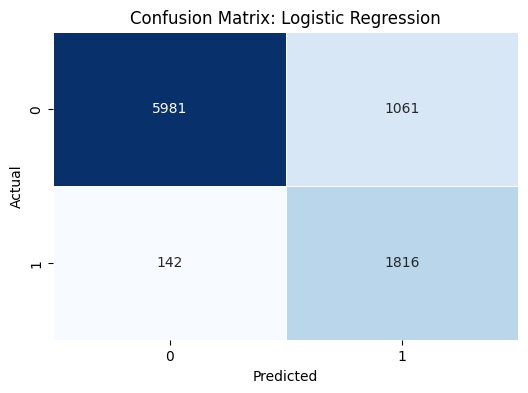

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7042
           1       0.63      0.93      0.75      1958

    accuracy                           0.87      9000
   macro avg       0.80      0.89      0.83      9000
weighted avg       0.90      0.87      0.87      9000

Training and evaluating: Decision Tree Classifier
------------------------------


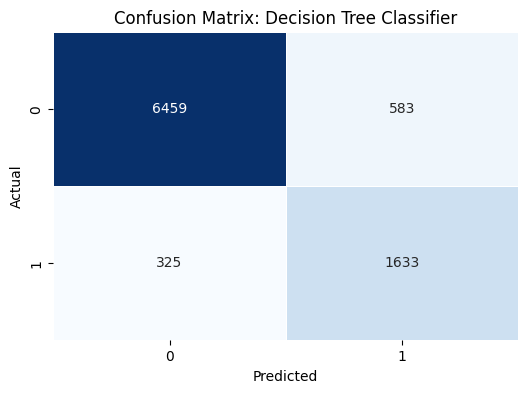

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7042
           1       0.74      0.83      0.78      1958

    accuracy                           0.90      9000
   macro avg       0.84      0.88      0.86      9000
weighted avg       0.91      0.90      0.90      9000

Training and evaluating: K-Nearest Neighbors
------------------------------


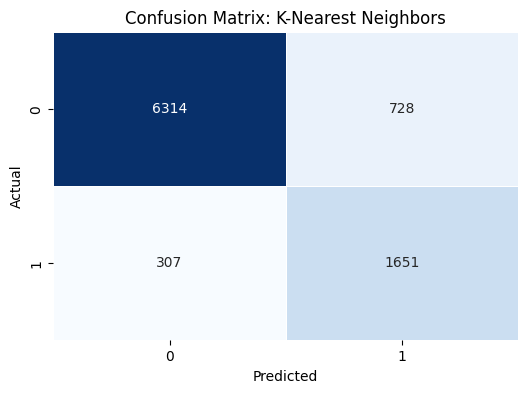

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7042
           1       0.69      0.84      0.76      1958

    accuracy                           0.89      9000
   macro avg       0.82      0.87      0.84      9000
weighted avg       0.90      0.89      0.89      9000

Training and evaluating: Random Forest
------------------------------


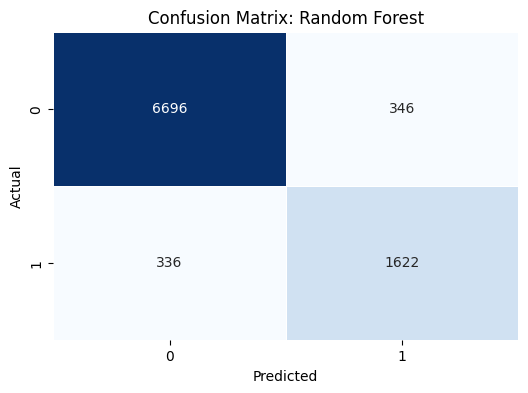

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7042
           1       0.82      0.83      0.83      1958

    accuracy                           0.92      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.92      0.92      0.92      9000

Training and evaluating: Gradient Boosting
------------------------------


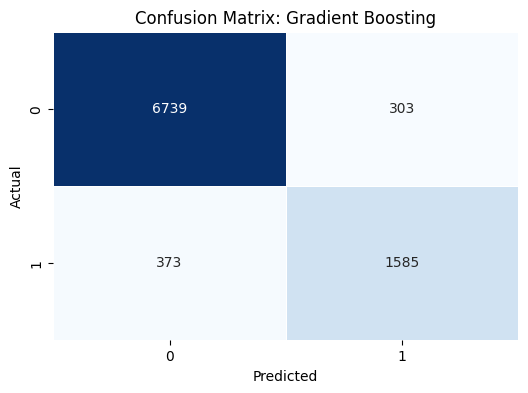

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7042
           1       0.84      0.81      0.82      1958

    accuracy                           0.92      9000
   macro avg       0.89      0.88      0.89      9000
weighted avg       0.92      0.92      0.92      9000

Training and evaluating: Support Vector Machine
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


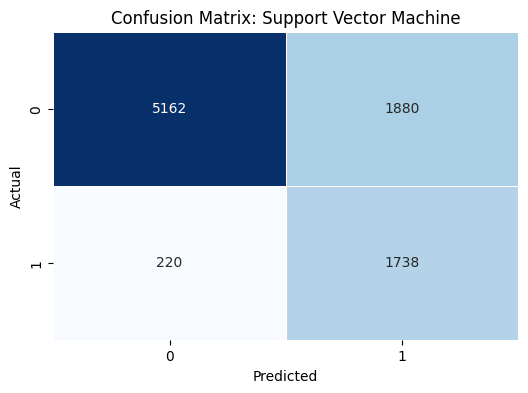

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7042
           1       0.48      0.89      0.62      1958

    accuracy                           0.77      9000
   macro avg       0.72      0.81      0.73      9000
weighted avg       0.85      0.77      0.79      9000

Training and evaluating: XGBoost
------------------------------


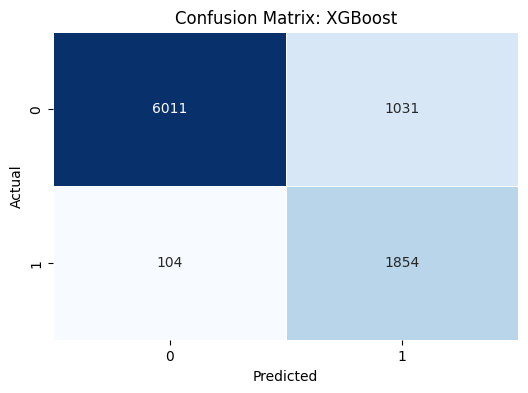

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7042
           1       0.64      0.95      0.77      1958

    accuracy                           0.87      9000
   macro avg       0.81      0.90      0.84      9000
weighted avg       0.91      0.87      0.88      9000



In [ ]:
# Initialize results list
results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    print("-" * 30)

    # Fit the model
    model.fit(X_resampled_scaled, y_resampled)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test, y_pred_prob) * 100, 2) if y_pred_prob is not None else "N/A"

    # Display Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Append results
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%" if roc != "N/A" else "N/A",
    })


Training and evaluating: Neural Network
------------------------------
Epoch 1/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8382 - loss: 0.3452 - val_accuracy: 0.9141 - val_loss: 0.2299
Epoch 2/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8936 - loss: 0.2352 - val_accuracy: 0.9108 - val_loss: 0.2164
Epoch 3/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2277 - val_accuracy: 0.9182 - val_loss: 0.1996
Epoch 4/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8983 - loss: 0.2216 - val_accuracy: 0.9041 - val_loss: 0.2040
Epoch 5/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.2195 - val_accuracy: 0.8930 - val_loss: 0.2289
Epoch 6/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9018 - loss: 0.2173 - val_accuracy: 0.8935 - val_loss: 0.2214
Epoch 7/50
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9017 - loss: 0.2123 - val_accuracy: 0.8974 - val_loss: 0.2140
Epoch 8/50
1398/139

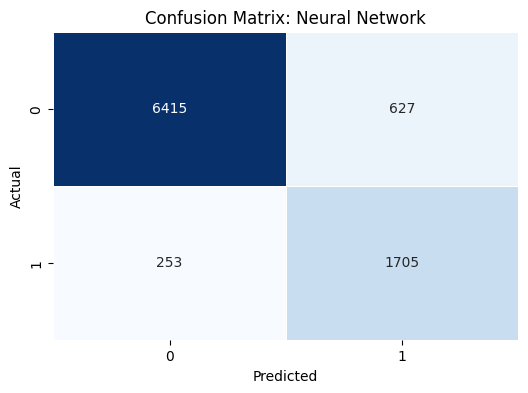

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7042
           1       0.73      0.87      0.79      1958

    accuracy                           0.90      9000
   macro avg       0.85      0.89      0.87      9000
weighted avg       0.91      0.90      0.91      9000



In [ ]:
from keras.layers import Input
from keras.callbacks import EarlyStopping
# Adding Neural Network
print(f"Training and evaluating: Neural Network")
print("-" * 30)

# Build the neural network
model_nn = Sequential([
    Input(shape=(X_resampled_scaled.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model_nn.fit(
    X_resampled_scaled,
    y_resampled,
    epochs=50,  # Increase epochs for early stopping to take effect
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Predictions
y_pred_prob_nn = model_nn.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Metrics
confusion_nn = confusion_matrix(y_test, y_pred_nn)
accuracy_nn = round(accuracy_score(y_test, y_pred_nn) * 100, 2)
precision_nn = round(precision_score(y_test, y_pred_nn) * 100, 2)
recall_nn = round(recall_score(y_test, y_pred_nn) * 100, 2)
f1_nn = round(f1_score(y_test, y_pred_nn) * 100, 2)
roc_nn = round(roc_auc_score(y_test, y_pred_prob_nn) * 100, 2)

# Display Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_nn, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix: Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_nn))

In [ ]:
# Append results
results.append({
    'Model': 'Neural Network',
    'Accuracy Score': f"{accuracy_nn}%",
    'Precision': f"{precision_nn}%",
    'Recall': f"{recall_nn}%",
    'F1 Score': f"{f1_nn}%",
    'ROC-AUC': f"{roc_nn}%"
})

# Display results as a DataFrame
results_df = pd.DataFrame(results)
display(results_df)

Model Accuracy Score Precision  Recall F1 Score ROC-AUC
0       Logistic Regression         86.63%    63.12%  92.75%   75.12%  95.54%
1  Decision Tree Classifier         89.91%    73.69%   83.4%   78.25%  96.16%
2       K-Nearest Neighbors          88.5%     69.4%  84.32%   76.14%  94.36%
3             Random Forest         92.42%    82.42%  82.84%   82.63%  97.33%
4         Gradient Boosting         92.49%    83.95%  80.95%   82.42%  97.45%
5    Support Vector Machine         76.67%    48.04%  88.76%   62.34%  88.02%
6                   XGBoost         87.39%    64.26%  94.69%   76.56%  97.41%
7            Neural Network         90.22%    73.11%  87.08%   79.49%  96.74%

**fine-tune your top-performing models** (Gradient Boosting, Random Forest, and Neural Network) and visualize performance metrics:

Light GBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

# Define the LightGBM model
lgbm = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Parallelize computations
)

# Fit the model and measure the time taken
start_time = time.time()
random_search.fit(X_resampled_scaled, y_resampled)
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

# Retrieve the best model
best_lgbm = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 27958, number of negative: 27958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4382
[LightGBM] [Info] Number of data points in the train set: 55916, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training completed in 406.68 seconds
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best ROC-AUC Score: 0.9895407070790423


In [ ]:
# Evaluate the best model on the test set
best_lgbm = random_search.best_estimator_

# Predictions
y_pred = best_lgbm.predict(X_test_scaled)
y_pred_prob = best_lgbm.predict_proba(X_test_scaled)[:, 1]

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"ROC-AUC: {roc_auc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 93.43%
Precision: 87.91%
Recall: 80.95%
F1 Score: 84.29%
ROC-AUC: 97.99%


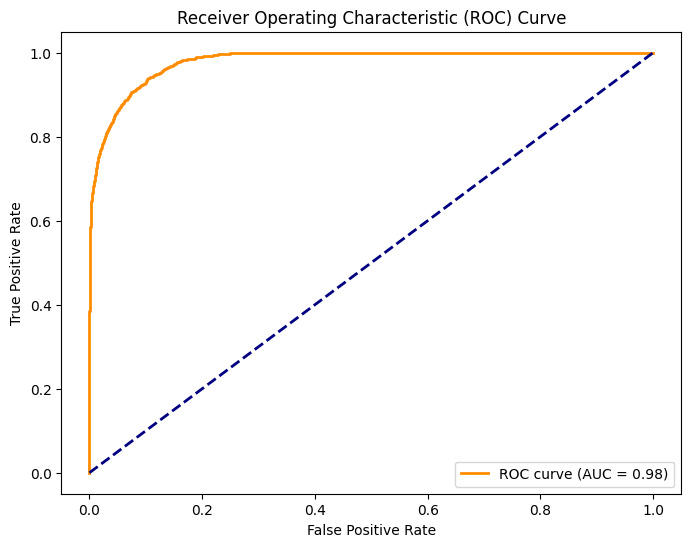

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


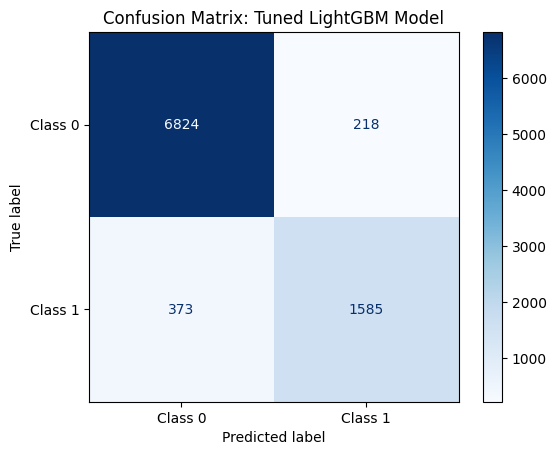

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Tuned LightGBM Model")
plt.show()


In [ ]:
# Extract feature names from the ColumnTransformer
feature_names = (
    transformer2.get_feature_names_out()  # Use this for ColumnTransformer
    if hasattr(transformer2, "get_feature_names_out") else X.columns
)
feature_names

array(['tnf4__person_education', 'tnf5__person_gender_male',
       'tnf5__person_home_ownership_OTHER',
       'tnf5__person_home_ownership_OWN',
       'tnf5__person_home_ownership_RENT', 'tnf5__loan_intent_EDUCATION',
       'tnf5__loan_intent_HOMEIMPROVEMENT', 'tnf5__loan_intent_MEDICAL',
       'tnf5__loan_intent_PERSONAL', 'tnf5__loan_intent_VENTURE',
       'tnf5__previous_loan_defaults_on_file_Yes', 'tnf6__age_new',
       'tnf6__person_income_new', 'tnf6__exp_new', 'tnf6__loan_amt_new',
       'tnf6__loan_int_rate', 'tnf6__loan_per_new',
       'remainder__cb_person_cred_hist_length', 'remainder__credit_score'],
      dtype=object)

In [ ]:
print(f"Number of transformed features: {len(feature_names)}")
print(f"Number of features in the model: {len(best_lgbm.feature_importances_)}")


Number of transformed features: 19
Number of features in the model: 19


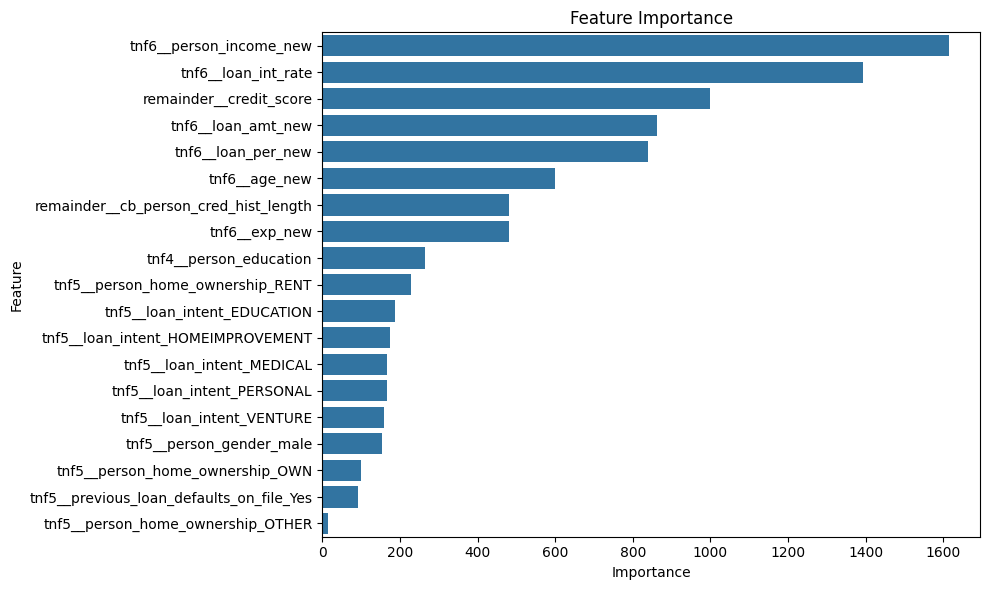

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Use transformed feature names
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**fine-tune your top-performing models** ( Neural Network) and visualize performance metrics:


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8216 - loss: 0.3593 - val_accuracy: 0.8977 - val_loss: 0.2428 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8934 - loss: 0.2371 - val_accuracy: 0.9084 - val_loss: 0.2062 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8966 - loss: 0.2275 - val_accuracy: 0.8976 - val_loss: 0.2036 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8996 - loss: 0.2198 - val_accuracy: 0.8985 - val_loss: 0.2140 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474

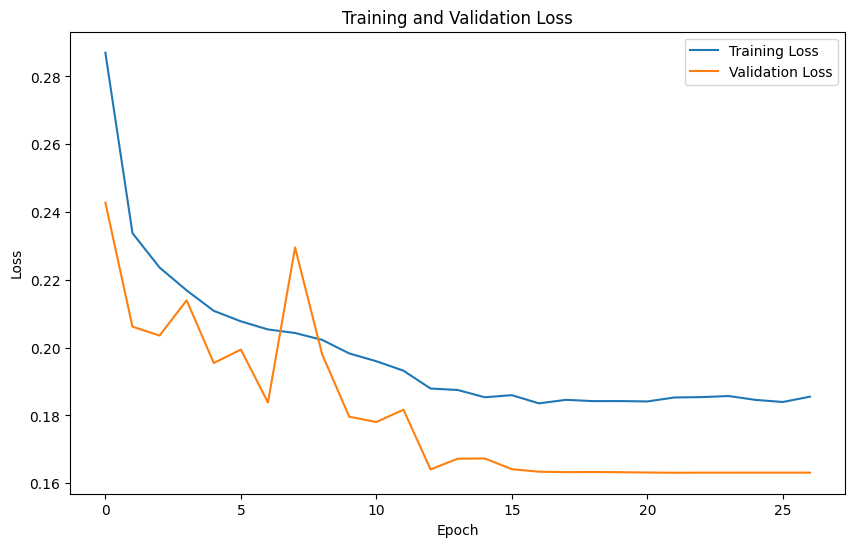

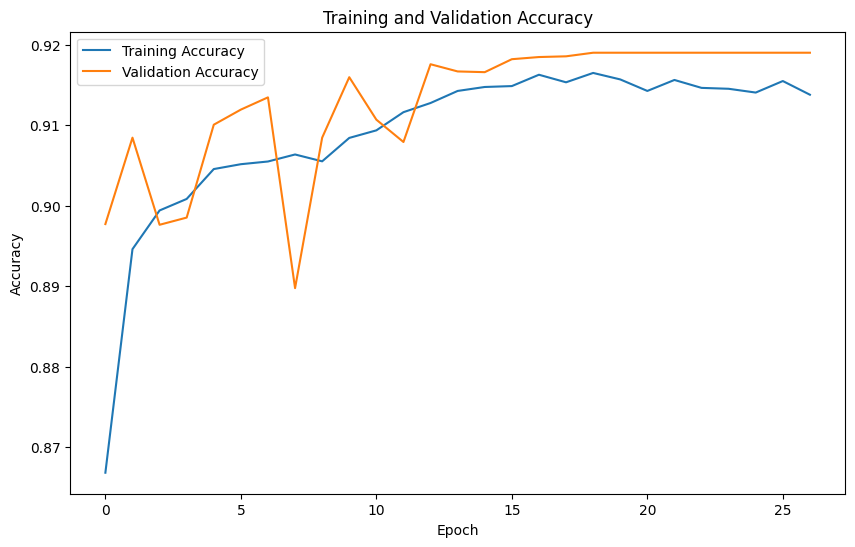

In [ ]:
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
import matplotlib.pyplot as plt

# Define a learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.5  # Reduce learning rate after 10 epochs
    return lr

lr_callback = LearningRateScheduler(lr_schedule, verbose=1)

# Define early stopping with more robust settings
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training if no improvement after 5 epochs
    restore_best_weights=True,
    verbose=1
)

# Rebuild the neural network with more neurons and layers for better tuning
model_nn = Sequential([
    Input(shape=(X_resampled_scaled.shape[1],)),  # Input layer
    Dense(128, activation='relu'),               # First hidden layer with 128 neurons
    Dropout(0.3),                                # Dropout to prevent overfitting
    Dense(64, activation='relu'),                # Second hidden layer with 64 neurons
    Dropout(0.3),                                # Dropout
    Dense(32, activation='relu'),                # Third hidden layer with 32 neurons
    Dropout(0.3),                                # Dropout
    Dense(1, activation='sigmoid')               # Output layer for binary classification
])

# Compile the model with Adam optimizer and binary cross-entropy loss
model_nn.compile(
    optimizer=Adam(learning_rate=0.001),  # Use a moderate initial learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with fine-tuning strategies
history = model_nn.fit(
    X_resampled_scaled,   # Resampled and scaled features
    y_resampled,          # Resampled target variable
    epochs=50,            # Train for up to 50 epochs
    batch_size=64,        # Use a moderate batch size for stable training
    validation_split=0.2, # Use 20% of the training data for validation
    callbacks=[early_stopping, lr_callback],  # Add early stopping and learning rate scheduler
    verbose=1             # Display training progress
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set Metrics:
Accuracy: 0.9194
Precision: 0.8137
Recall: 0.8166
F1-Score: 0.8152
ROC-AUC: 0.9710


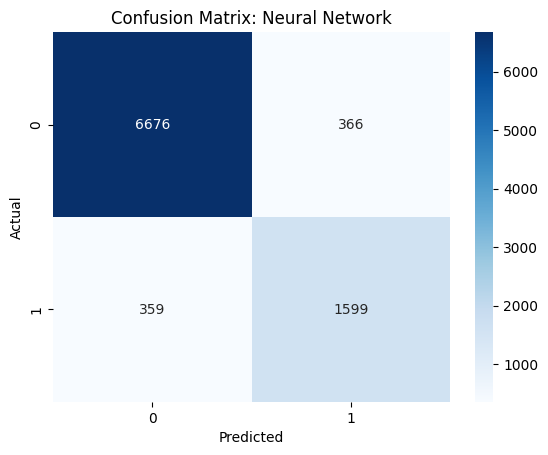

In [ ]:
# Evaluate the model on the test data
y_pred_prob_test = model_nn.predict(X_test_scaled).ravel()
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

# Metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob_test):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

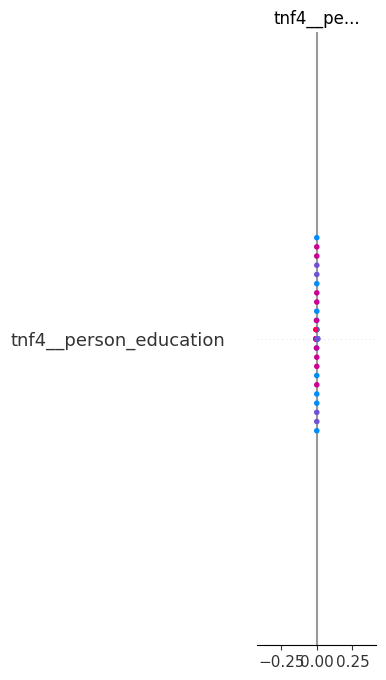

In [ ]:
import shap

# Extract feature names from the transformer
#feature_names = transformer2.get_feature_names_out()

# Preprocess test data using the same transformer
X_test_scaled = transformer2.transform(X_test)

# Convert to DataFrame for consistent feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Use KernelExplainer on a representative sample of the training data
explainer = shap.KernelExplainer(model_nn.predict, X_resampled_scaled[:100])  # Use a representative training sample

# Calculate SHAP values for a subset of the test data (50 samples for faster computation)
shap_values = explainer.shap_values(X_test_scaled_df[:50])  # Explain a small sample of the test data

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled_df[:50], feature_names=feature_names)


To determine which model performs best between LightGBM and the Neural Network, we need to compare their evaluation metrics on the test set.

**LightGBM Performance:**

1.   Accuracy: 93.43%
2.   Precision: 87.91%
3.   Recall: 80.95%
4.   F1-Score: 84.29%
5.   ROC-AUC: 97.99%

**Neural Network Performance:**

1. Accuracy: 91.94%
2. Precision: 81.37%
3. Recall: 81.66%
4. F1-Score: 81.52%
5. ROC-AUC: 97.10%

**Comparison:**

**Accuracy:**
* LightGBM (93.43%) outperforms the Neural Network (91.94%).
* Indicates that LightGBM makes fewer overall classification errors.

**Precision:**

* LightGBM (87.91%) outperforms the Neural Network (81.37%).
* LightGBM is better at avoiding false positives (cases predicted as positive
  but are actually negative).

**Recall:**

* Neural Network (81.66%) slightly outperforms LightGBM (80.95%).
* Neural Network is better at identifying true positives (cases that are
  positive and correctly classified).

**F1-Score:**

* LightGBM (84.29%) outperforms the Neural Network (81.52%).
* Indicates that LightGBM achieves a better balance between precision and
  recall.

**ROC-AUC:**

* LightGBM (97.99%) outperforms the Neural Network (97.10%).
* LightGBM has slightly better discriminatory power, meaning it can better
  distinguish between positive and negative classes.

**Conclusion:**

* LightGBM performs better overall based on most evaluation metrics, especially in terms of accuracy, precision, F1-Score, and ROC-AUC.
* The Neural Network has a slight edge in recall, but the difference is minimal.

**Recommendation:**
* Use LightGBM as the final model for deployment or further testing, especially
if precision and overall accuracy are critical for the business problem.

*  Consider the Neural Network if recall (i.e., minimizing false negatives) is  more important in your application.

